In [823]:
# import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [824]:
# Set pandas to display all columns
pd.set_option('display.max_columns', None)

In [825]:
# turn off scientific notation 
pd.set_option('display.float_format', '{:.6f}'.format)

# Read in data

In [453]:
data = pd.read_csv('model_data/full_model_data.csv', index_col=0)

In [454]:
data.head()

URN  not_sustained_rate  not_sustained_rate_overalldest  total_absence  \
1  137181            5.172414                        5.660377           11.1   
2  100049            6.250000                        6.748466           10.1   
3  100050            2.824859                        2.906977            7.9   
4  100051            5.464481                        5.988024           11.4   
5  100052            1.932367                        1.980198            8.2   

   persistent_absence                              urban_rural  \
1                38.1  (England/Wales) Urban major conurbation   
2                33.1  (England/Wales) Urban major conurbation   
3                24.8  (England/Wales) Urban major conurbation   
4                42.9  (England/Wales) Urban major conurbation   
5                24.0  (England/Wales) Urban major conurbation   

             denomination   FSM  White_British   EAL  perc_boys   region_name  \
1  No religious character  41.2           10.8  51.7  56.874466  Inner London   
2  No religious character  63.5           14.2  57.5  56.924644  Inner London   
3  No religious character  35.6           38.8  34.1   4.963971  Inner London   
4  No religious character  61.8            3.9  67.3  56.163114  Inner London   
5  No religious character  41.8           11.4  38.1  51.630023  Inner London   

              school_name  headcount  perm_excl_rate  susp_rate  \
1         The UCL Academy     1171.0         0.34159   14.51751   
2       Haverstock School      982.0         0.00000    7.43381   
3  Parliament Hill School     1249.0         0.08006    9.12730   
4      Regent High School     1079.0         0.09268    5.37535   
5        Hampstead School     1319.0         0.07582    3.26005   

   one_plus_susp_rate  KS4_headcount  KS2_history  Attainment_8  Progress_8  \
1             8.45431            168        105.1          47.4       -0.18   
2             4.98982            151        102.3          41.7       -0.32   
3             5.04404            174        107.1          59.1        0.61   
4             4.26321            173        103.5          43.8       -0.06   
5             2.65353            197        103.2          44.6       -0.04   

   selective  KS4_pass_rate POSTCODE  post16 school_sex                 type  \
1          0             27  NW3 3AQ       1      Mixed  Academy sponsor led   
2          0             26  NW3 2BQ       1      Mixed     Community school   
3          0             40  NW5 1RL       1      Girls     Community school   
4          0             21  NW1 1RX       1      Mixed     Community school   
5          0             10  NW2 3RT       1      Mixed     Community school   

          Ofsted_rating  sen_support      ehcp     LSOA11  IMD  \
1  Requires improvement    10.247652  3.245090  E01000963  8.0   
2                  Good    19.144603  2.851324  E01000902  2.0   
3                  Good    13.370697  1.281025  E01000912  4.0   
4                  Good    17.886932  3.614458  E01000952  2.0   
5                  Good     9.628506  2.880970  E01000871  7.0   

   pupil_teacher_ratio  assistant_teacher_ratio  absence_rate_non_excl  
1                 13.0                      0.2              10.803701  
2                  NaN                      NaN               9.832177  
3                 14.7                      0.1               7.769210  
4                 11.9                      0.2              11.246731  
5                 14.9                      0.2               8.103096

### Drop school types that are specialist or only KS4 & 5

In [455]:
data['type'] = data['type'].astype(str)
np.unique(data['type'])

array(['Academy converter', 'Academy sponsor led',
       'City technology college', 'Community school', 'Foundation school',
       'Free schools', 'Further education', 'Studio schools',
       'University technical college', 'Voluntary aided school',
       'Voluntary controlled school'], dtype=object)

In [456]:
types = ['Academy converter', 'Academy sponsor led',
         'Community school', 'Foundation school',
         'Free schools', 'Voluntary aided school',
         'Voluntary controlled school']

data = data.loc[data['type'].isin(types)]

np.unique(data['type'])

array(['Academy converter', 'Academy sponsor led', 'Community school',
       'Foundation school', 'Free schools', 'Voluntary aided school',
       'Voluntary controlled school'], dtype=object)

### Drop null values

In [457]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3069 entries, 1 to 3146
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   URN                             3069 non-null   int64  
 1   not_sustained_rate              3069 non-null   float64
 2   not_sustained_rate_overalldest  3069 non-null   float64
 3   total_absence                   3054 non-null   float64
 4   persistent_absence              3054 non-null   float64
 5   urban_rural                     3055 non-null   object 
 6   denomination                    3055 non-null   object 
 7   FSM                             3055 non-null   float64
 8   White_British                   3055 non-null   float64
 9   EAL                             3055 non-null   float64
 10  perc_boys                       3055 non-null   float64
 11  region_name                     3055 non-null   object 
 12  school_name                     3055 no

In [458]:
data = data.dropna(subset=['total_absence'])

In [459]:
data = data.dropna(subset=['Progress_8'])

In [460]:
data = data.dropna(subset=['Ofsted_rating'])

In [461]:
data = data.dropna(subset=['pupil_teacher_ratio'])

In [462]:
data['not_sustained_rate'].describe()

count    2972.000000
mean        5.354765
std         3.670508
min         0.000000
25%         2.720164
50%         4.591837
75%         7.272727
max        28.125000
Name: not_sustained_rate, dtype: float64

In [463]:
data['not_sustained_rate_overalldest'].describe()

count    2972.000000
mean        5.907684
std         4.422501
min         0.000000
25%         2.824859
50%         4.851427
75%         7.926829
max        40.540541
Name: not_sustained_rate_overalldest, dtype: float64

In [464]:
data.describe()

URN  not_sustained_rate  not_sustained_rate_overalldest  \
count    2972.000000         2972.000000                     2972.000000   
mean   133863.203567            5.354765                        5.907684   
std     12011.537035            3.670508                        4.422501   
min    100050.000000            0.000000                        0.000000   
25%    135760.750000            2.720164                        2.824859   
50%    137338.500000            4.591837                        4.851427   
75%    140412.750000            7.272727                        7.926829   
max    148866.000000           28.125000                       40.540541   

       total_absence  persistent_absence          FSM  White_British  \
count    2972.000000         2972.000000  2972.000000    2972.000000   
mean        9.096770           26.750976    24.482470      63.886137   
std         2.437697            8.591171    12.930734      28.961852   
min         3.100000            2.800000     1.300000       0.000000   
25%         7.500000           21.200000    14.700000      44.400000   
50%         8.900000           26.600000    22.500000      75.300000   
75%        10.400000           32.100000    32.725000      87.300000   
max        32.600000           97.800000    75.400000      99.300000   

               EAL    perc_boys    headcount  perm_excl_rate    susp_rate  \
count  2972.000000  2972.000000  2972.000000     2972.000000  2972.000000   
mean     17.662786    50.348293  1115.075034        0.243747    20.286441   
std      18.402224    16.637625   385.419425        0.326898    24.449683   
min       0.000000     0.000000    81.000000        0.000000     0.000000   
25%       4.500000    49.178838   847.000000        0.000000     6.619397   
50%      10.100000    50.977719  1082.000000        0.134005    13.096390   
75%      24.900000    53.044672  1359.000000        0.345252    24.544380   
max      92.700000   100.000000  2990.000000        3.024910   358.064520   

       one_plus_susp_rate  KS4_headcount  KS2_history  Attainment_8  \
count         2972.000000    2972.000000  2972.000000   2972.000000   
mean             7.579353     185.130552   104.437248     47.261137   
std              5.256525      61.606266     2.745410      9.261298   
min              0.000000      17.000000    92.100000     18.800000   
25%              3.917765     145.000000   102.800000     41.300000   
50%              6.508540     180.000000   104.200000     46.100000   
75%              9.902157     224.250000   105.500000     51.500000   
max             37.366550     451.000000   117.400000     87.600000   

        Progress_8    selective  KS4_pass_rate       post16  sen_support  \
count  2972.000000  2972.000000    2972.000000  2972.000000  2972.000000   
mean     -0.001413     0.053499      24.690108     0.625841    12.866762   
std       0.505607     0.225065      18.675961     0.483986     5.493081   
min      -3.380000     0.000000       0.000000     0.000000     0.403226   
25%      -0.330000     0.000000      11.000000     0.000000     9.227085   
50%      -0.010000     0.000000      20.000000     1.000000    12.608697   
75%       0.330000     0.000000      33.000000     1.000000    16.039934   
max       2.370000     1.000000     100.000000     1.000000    48.316252   

              ehcp         IMD  pupil_teacher_ratio  assistant_teacher_ratio  \
count  2972.000000  2972.00000          2972.000000              2972.000000   
mean      2.529875     5.66319            16.897241                 0.230585   
std       1.680185     2.81924             2.295918                 0.120709   
min       0.000000     1.00000             5.300000                 0.000000   
25%       1.427036     3.00000            15.600000                 0.100000   
50%       2.238032     6.00000            16.800000                 0.200000   
75%       3.227958     8.00000            18.000000                 0.300000   
max      18.468468    10

In [465]:
data.loc[data['assistant_teacher_ratio'] == 1].shape[0]

1

In [466]:
data.loc[data['not_sustained_rate'] == 0].shape[0]

95

In [467]:
data.loc[data['not_sustained_rate'] >= (100/7)].shape[0]

79

In [468]:
data.loc[data['not_sustained_rate_overalldest'] >= (100/7)].shape[0]

157

In [469]:
data.loc[data['susp_rate'] == 0].shape[0]

26

In [470]:
data.loc[data['susp_rate'] > 200].shape[0]

8

# Shape of the Data

In [471]:
performance_indicators = data[['not_sustained_rate', 'not_sustained_rate_overalldest', 'total_absence', 'absence_rate_non_excl', 'persistent_absence', 
                               'perm_excl_rate', 'susp_rate', 'one_plus_susp_rate', 
                               'KS2_history', 'Attainment_8', 'Progress_8', 'KS4_pass_rate',
                              'selective', 'Ofsted_rating']]

In [472]:
#sns.pairplot(performance_indicators);

In [473]:
#sns.pairplot(performance_indicators, hue='Ofsted_rating', palette='RdYlGn_r');

In [474]:
#sns.pairplot(performance_indicators, hue='selective');

### School size

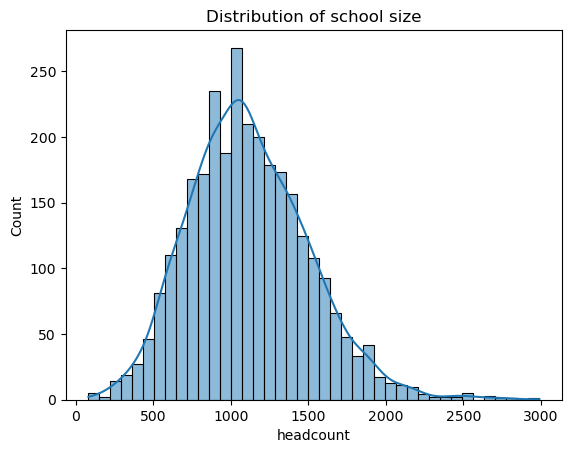

In [475]:
sns.histplot(data['headcount'], kde=True )
plt.title('Distribution of school size');

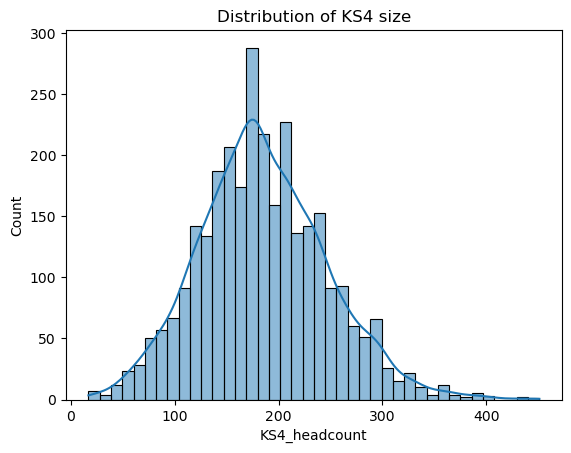

In [476]:
sns.histplot(data['KS4_headcount'], kde=True )
plt.title('Distribution of KS4 size');

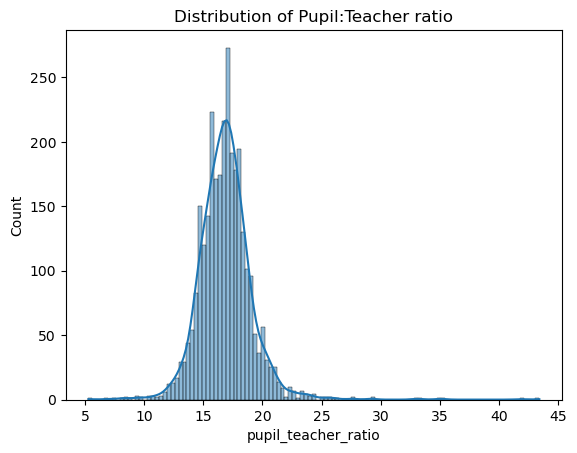

In [477]:
sns.histplot(data['pupil_teacher_ratio'], kde=True )
plt.title('Distribution of Pupil:Teacher ratio');

### School sex

In [478]:
data['school_sex'].unique()

array(['Mixed', 'Girls', 'Boys'], dtype=object)

In [479]:
data['single_sex_binary'] = data['school_sex']

In [480]:
data['single_sex_binary'].replace('Girls', 1, inplace=True)
data['single_sex_binary'].replace('Boys', 1, inplace=True)
data['single_sex_binary'].replace('Mixed', 0, inplace=True)

### Performance indicators

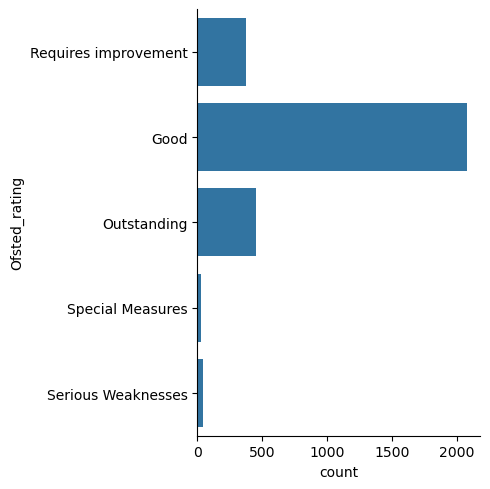

In [481]:
sns.catplot(data['Ofsted_rating'], kind='count');

#### Ofsted rating

In [482]:
data['Ofsted_rating'] = data['Ofsted_rating'].astype(str)
np.unique(data['Ofsted_rating'])

array(['Good', 'Outstanding', 'Requires improvement',
       'Serious Weaknesses', 'Special Measures'], dtype=object)

In [483]:
data['Ofsted_rating'].replace('Serious Weaknesses', 'Inadequate', inplace=True)
data['Ofsted_rating'].replace('Special Measures', 'Inadequate', inplace=True)

In [484]:
# convert to category type
from pandas.api.types import CategoricalDtype

ofsted_cats = CategoricalDtype(categories=['Outstanding', 'Good', 'Requires improvement', 'Inadequate'], ordered=True)
data['Ofsted_rating'] = data['Ofsted_rating'].astype(ofsted_cats)

In [485]:
data.groupby('Ofsted_rating').size()

/var/folders/fp/_jk7rzqj00756q1bhvwhswcw0000gp/T/ipykernel_47200/3787143538.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('Ofsted_rating').size()


Ofsted_rating
Outstanding              450
Good                    2077
Requires improvement     374
Inadequate                71
dtype: int64

#### Attainment

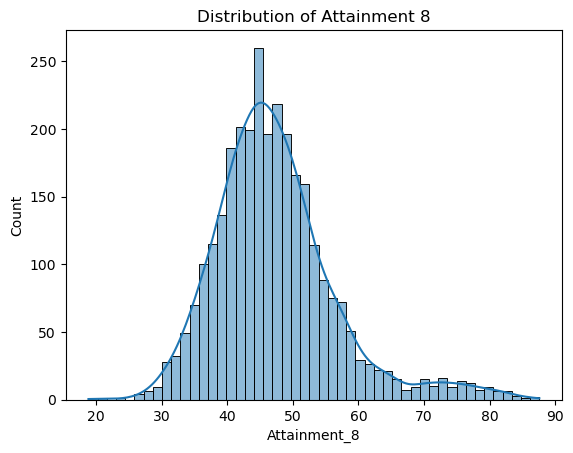

In [486]:
sns.histplot(data['Attainment_8'], kde=True )
plt.title('Distribution of Attainment 8');

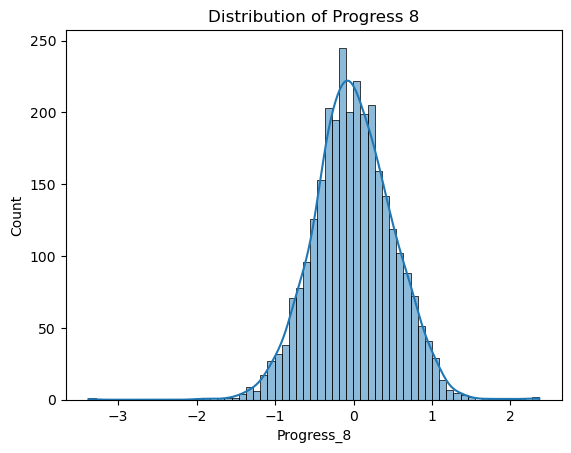

In [487]:
sns.histplot(data['Progress_8'], kde=True )
plt.title('Distribution of Progress 8');

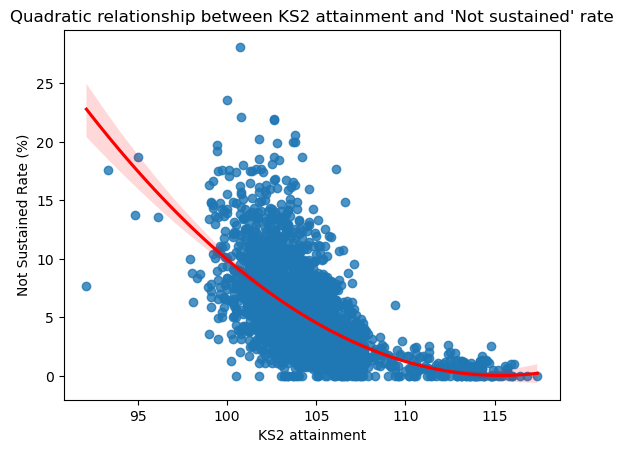

In [488]:
sns.regplot(data=data, x='KS2_history', y='not_sustained_rate',
           order=2, line_kws={"color": "red"})

plt.xlabel("KS2 attainment")  
plt.ylabel("Not Sustained Rate (%)")

plt.title("Quadratic relationship between KS2 attainment and 'Not sustained' rate");

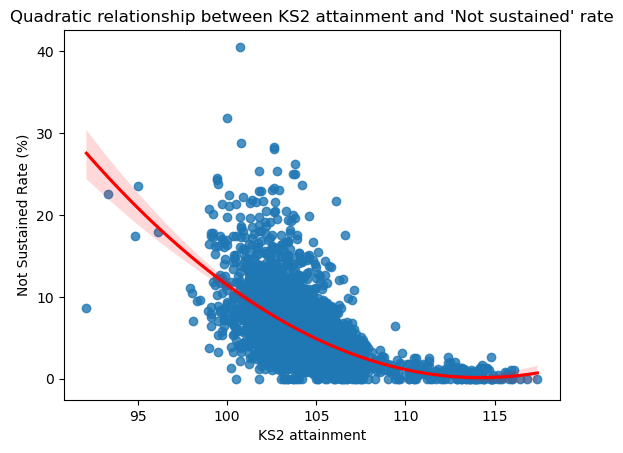

In [489]:
sns.regplot(data=data, x='KS2_history', y='not_sustained_rate_overalldest',
           order=2, line_kws={"color": "red"})

plt.xlabel("KS2 attainment")  
plt.ylabel("Not Sustained Rate (%)")

plt.title("Quadratic relationship between KS2 attainment and 'Not sustained' rate");

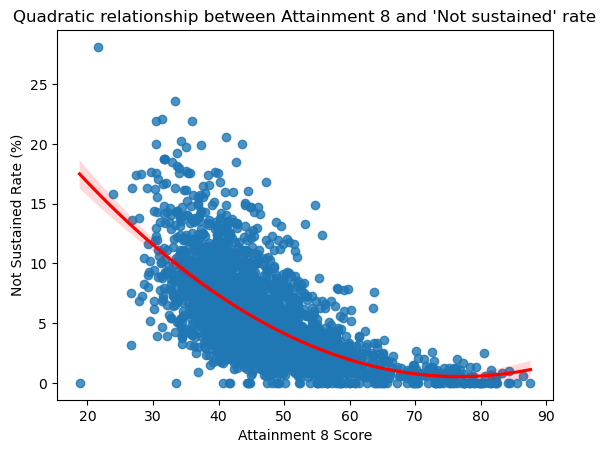

In [490]:
sns.regplot(data=data, x='Attainment_8', y='not_sustained_rate',
           order=2, line_kws={"color": "red"})

plt.xlabel("Attainment 8 Score")  
plt.ylabel("Not Sustained Rate (%)")

plt.title("Quadratic relationship between Attainment 8 and 'Not sustained' rate");

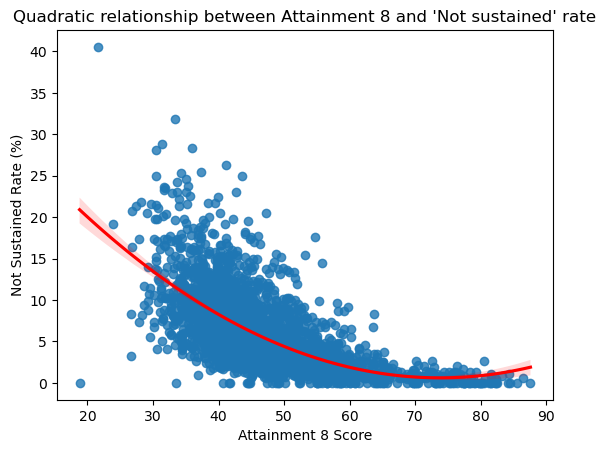

In [491]:
sns.regplot(data=data, x='Attainment_8', y='not_sustained_rate_overalldest',
           order=2, line_kws={"color": "red"})

plt.xlabel("Attainment 8 Score")  
plt.ylabel("Not Sustained Rate (%)")

plt.title("Quadratic relationship between Attainment 8 and 'Not sustained' rate");

### Other school characteristics

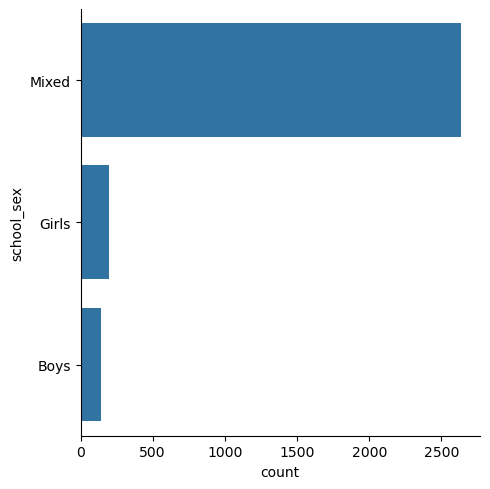

In [492]:
sns.catplot(data['school_sex'], kind='count');

In [493]:
data.groupby('single_sex_binary').size()

single_sex_binary
0    2635
1     337
dtype: int64

In [494]:
data.groupby('post16').size()

post16
0    1112
1    1860
dtype: int64

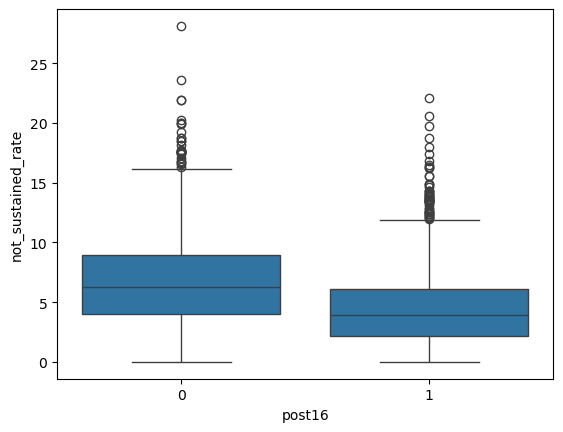

In [495]:
sns.boxplot(data=data, x='post16', y='not_sustained_rate');

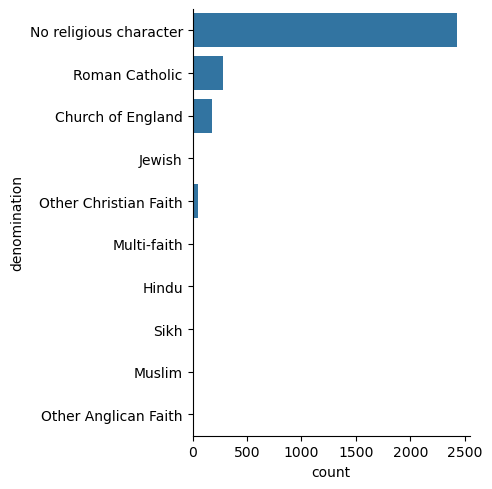

In [496]:
sns.catplot(data['denomination'], kind='count');

In [497]:
denomination_mean_neet = data.groupby('denomination')['not_sustained_rate'].mean().sort_values().index

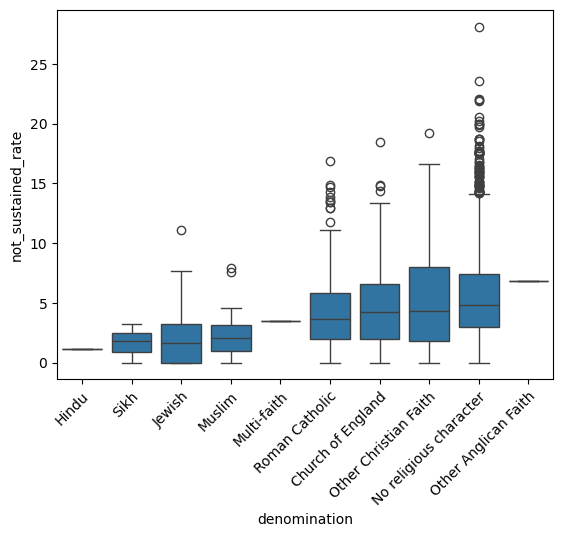

In [498]:
sns.boxplot(data=data, x='denomination', y='not_sustained_rate', order=denomination_mean_neet)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor');

In [499]:
data['denomination'].replace('Church of England', 'Christian', inplace=True)
data['denomination'].replace('Hindu', 'Other faith', inplace=True)
data['denomination'].replace('Jewish', 'Other faith', inplace=True)
data['denomination'].replace('Multi-faith', 'No faith', inplace=True)
data['denomination'].replace('Muslim', 'Other faith', inplace=True)
data['denomination'].replace('No religious character', 'No faith', inplace=True)
data['denomination'].replace('Other Anglican Faith', 'Christian', inplace=True)
data['denomination'].replace('Other Christian Faith', 'Christian', inplace=True)
data['denomination'].replace('Roman Catholic', 'Christian', inplace=True)
data['denomination'].replace('Sikh', 'Other faith', inplace=True)

In [500]:
data.groupby('denomination').size()

denomination
Christian       515
No faith       2425
Other faith      32
dtype: int64

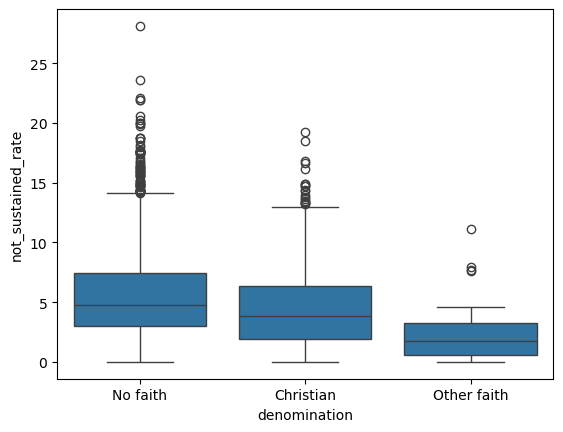

In [501]:
sns.boxplot(data=data, x='denomination', y='not_sustained_rate');

In [502]:
data['faith_binary'] = data['denomination']

In [503]:
data['faith_binary'].replace('No faith', 0, inplace=True)
data['faith_binary'].replace('Christian', 1, inplace=True)
data['faith_binary'].replace('Other faith', 1, inplace=True)

In [504]:
data.groupby('faith_binary').size()

faith_binary
0    2425
1     547
dtype: int64

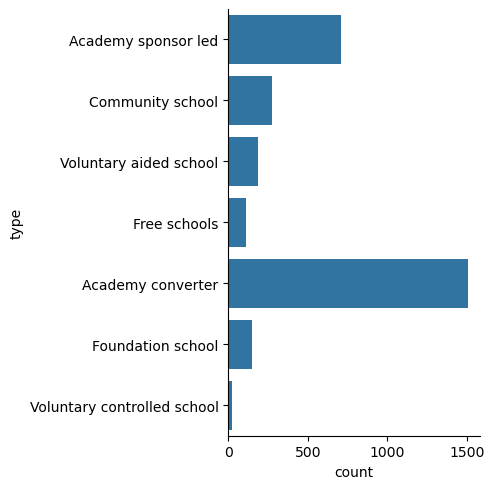

In [505]:
sns.catplot(data['type'], kind='count');

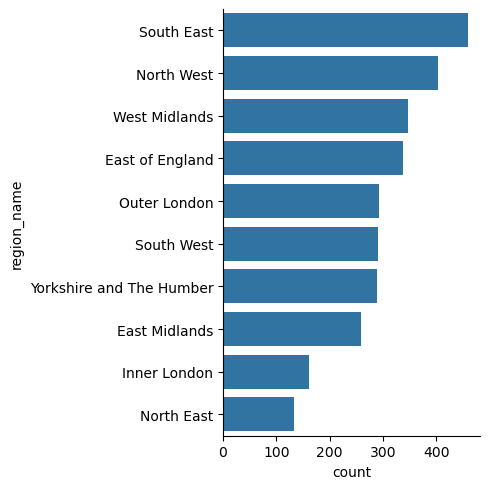

In [506]:
sns.catplot(data['region_name'], 
            kind = 'count', 
            order = data['region_name'].value_counts().index);

In [507]:
region_mean_neet = data.groupby('region_name')['not_sustained_rate'].mean().sort_values().index

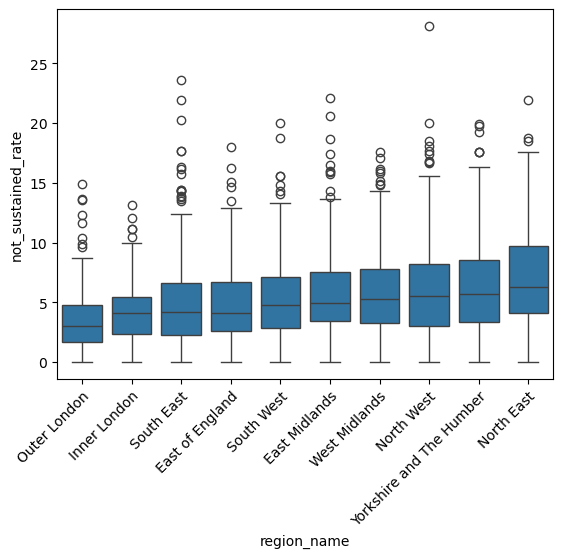

In [508]:
sns.boxplot(data=data, x='region_name', y='not_sustained_rate', order=region_mean_neet)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor');

In [509]:
# new column for region
data['region_new'] = data['region_name']

data['region_new'].replace('Outer London', 'London', inplace=True)
data['region_new'].replace('Inner London', 'London', inplace=True)

data['region_new'].replace('South East', 'South', inplace=True)
data['region_new'].replace('South West', 'South', inplace=True)
data['region_new'].replace('East of England', 'South', inplace=True)

data['region_new'].replace('East Midlands', 'Midlands', inplace=True)
data['region_new'].replace('West Midlands', 'Midlands', inplace=True)

data['region_new'].replace('Yorkshire and The Humber', 'North', inplace=True)
data['region_new'].replace('North West', 'North', inplace=True)
data['region_new'].replace('North East', 'North', inplace=True)

In [510]:
data.groupby('region_new').size()

region_new
London       453
Midlands     606
North        826
South       1087
dtype: int64

In [511]:
ordered_regions = data.groupby('region_new')['not_sustained_rate'].median().sort_values().index

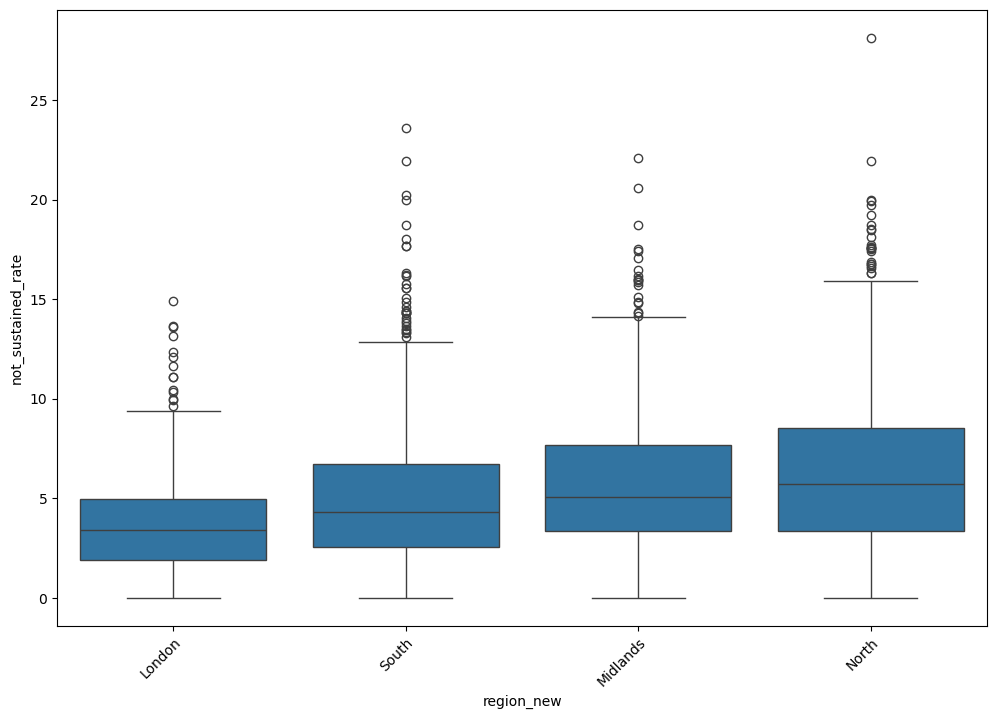

In [512]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='region_new', y='not_sustained_rate', order=ordered_regions)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor');

Reduced collinearity with IMD - variation in IMD across regions reduced. 

In [513]:
data.groupby('IMD').size()

IMD
1.0     228
2.0     281
3.0     315
4.0     316
5.0     288
6.0     297
7.0     304
8.0     306
9.0     336
10.0    301
dtype: int64

In [514]:
region_means = data.groupby('region_name')['IMD'].mean()
print(region_means)

region_name
East Midlands               5.907336
East of England             6.426036
Inner London                4.043478
North East                  5.022388
North West                  5.032178
Outer London                5.736301
South East                  6.764706
South West                  6.065517
West Midlands               4.985591
Yorkshire and The Humber    5.218750
Name: IMD, dtype: float64


In [515]:
new_region_means = data.groupby('region_new')['IMD'].mean()
print(new_region_means)

region_new
London      5.134658
Midlands    5.379538
North       5.095642
South       6.472861
Name: IMD, dtype: float64


In [516]:
data['urban_rural'] = data['urban_rural'].astype(str)
np.unique(data['urban_rural'])

array(['(England/Wales) Rural hamlet and isolated dwellings',
       '(England/Wales) Rural hamlet and isolated dwellings in a sparse setting',
       '(England/Wales) Rural town and fringe',
       '(England/Wales) Rural town and fringe in a sparse setting',
       '(England/Wales) Rural village',
       '(England/Wales) Rural village in a sparse setting',
       '(England/Wales) Urban city and town',
       '(England/Wales) Urban city and town in a sparse setting',
       '(England/Wales) Urban major conurbation',
       '(England/Wales) Urban minor conurbation'], dtype=object)

In [517]:
data['urban_rural'].replace('(England/Wales) Urban major conurbation', 'Urban major conurbation', inplace=True)
data['urban_rural'].replace('(England/Wales) Urban minor conurbation', 'Urban minor conurbation', inplace=True)
data['urban_rural'].replace('(England/Wales) Urban city and town', 'Urban city and town', inplace=True)
data['urban_rural'].replace('(England/Wales) Urban city and town in a sparse setting', 'Urban city and town in a sparse setting', inplace=True)
data['urban_rural'].replace('(England/Wales) Rural town and fringe', 'Rural town and fringe', inplace=True)
data['urban_rural'].replace('(England/Wales) Rural town and fringe in a sparse setting', 'Rural town and fringe in a sparse setting', inplace=True)
data['urban_rural'].replace('(England/Wales) Rural village', 'Rural village', inplace=True)
data['urban_rural'].replace('(England/Wales) Rural village in a sparse setting', 'Rural village in a sparse setting', inplace=True)
data['urban_rural'].replace('(England/Wales) Rural hamlet and isolated dwellings', 'Rural hamlet and isolated dwellings', inplace=True)
data['urban_rural'].replace('(England/Wales) Rural hamlet and isolated dwellings in a sparse setting', 'Rural hamlet and isolated dwellings in a sparse setting', inplace=True)

In [518]:
urban_rural_cats = CategoricalDtype(categories=['Urban major conurbation', 
                                                'Urban minor conurbation', 
                                                'Urban city and town', 
                                                'Urban city and town in a sparse setting', 
                                                'Rural town and fringe',
                                                'Rural town and fringe in a sparse setting',
                                                'Rural village',
                                                'Rural village in a sparse setting',
                                                'Rural hamlet and isolated dwellings',
                                                'Rural hamlet and isolated dwellings in a sparse setting'
                                               ], 
                                    ordered=True)
data['urban_rural'] = data['urban_rural'].astype(urban_rural_cats)

In [519]:
data.groupby('urban_rural').size()

/var/folders/fp/_jk7rzqj00756q1bhvwhswcw0000gp/T/ipykernel_47200/1274345496.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('urban_rural').size()


urban_rural
Urban major conurbation                                    1054
Urban minor conurbation                                     105
Urban city and town                                        1381
Urban city and town in a sparse setting                       8
Rural town and fringe                                       289
Rural town and fringe in a sparse setting                    29
Rural village                                                54
Rural village in a sparse setting                             6
Rural hamlet and isolated dwellings                          43
Rural hamlet and isolated dwellings in a sparse setting       3
dtype: int64

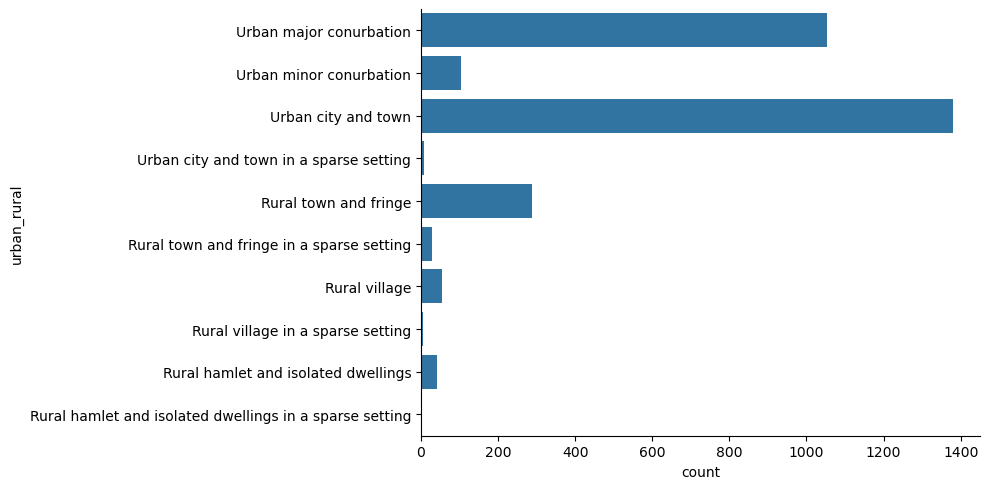

In [520]:
g = sns.catplot(data['urban_rural'], kind='count', height=5, aspect=2);

In [521]:
urban_rural_mean_neet = data.groupby('urban_rural')['not_sustained_rate'].mean().sort_values().index

/var/folders/fp/_jk7rzqj00756q1bhvwhswcw0000gp/T/ipykernel_47200/3792850642.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  urban_rural_mean_neet = data.groupby('urban_rural')['not_sustained_rate'].mean().sort_values().index


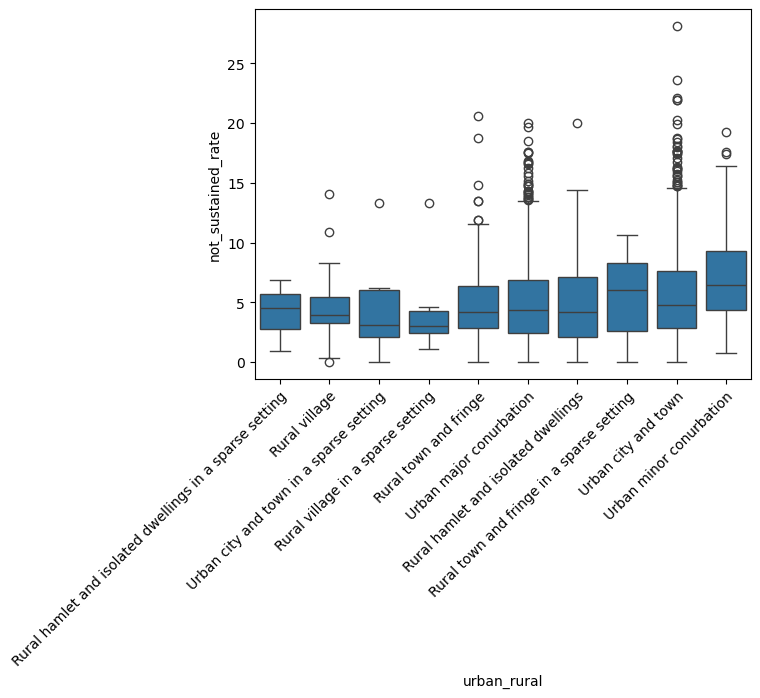

In [522]:
sns.boxplot(data=data, x='urban_rural', y='not_sustained_rate', order=urban_rural_mean_neet)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor');

In [523]:
# new column for binary urban status
data['urban_binary'] = data['urban_rural']

In [524]:
# replace labels with numbers
data['urban_binary'].replace('Urban major conurbation', 1, inplace=True)
data['urban_binary'].replace('Urban minor conurbation', 1, inplace=True)
data['urban_binary'].replace('Urban city and town', 1, inplace=True)
data['urban_binary'].replace('Urban city and town in a sparse setting', 1, inplace=True)
data['urban_binary'].replace('Rural town and fringe', 0, inplace=True)
data['urban_binary'].replace('Rural town and fringe in a sparse setting', 0, inplace=True)
data['urban_binary'].replace('Rural village', 0, inplace=True)
data['urban_binary'].replace('Rural village in a sparse setting', 0, inplace=True)
data['urban_binary'].replace('Rural hamlet and isolated dwellings', 0, inplace=True)
data['urban_binary'].replace('Rural hamlet and isolated dwellings in a sparse setting', 0, inplace=True)

In [525]:
data.groupby('urban_binary').size()

/var/folders/fp/_jk7rzqj00756q1bhvwhswcw0000gp/T/ipykernel_47200/419234468.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('urban_binary').size()


urban_binary
1    2548
0     424
dtype: int64

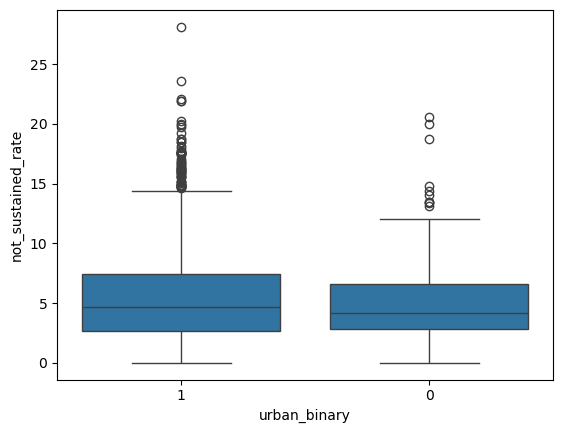

In [526]:
sns.boxplot(data=data, x='urban_binary', y='not_sustained_rate');

### Pupil characteristics

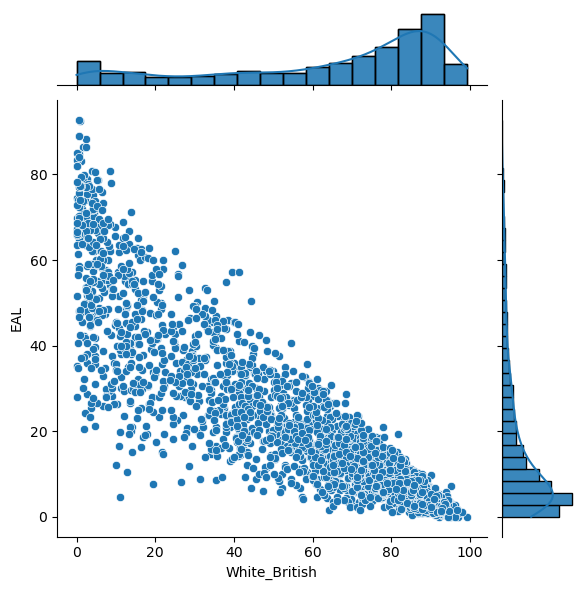

In [527]:
g = sns.jointplot(data=data, x='White_British', y='EAL')
g.plot_marginals(sns.histplot, kde=True);

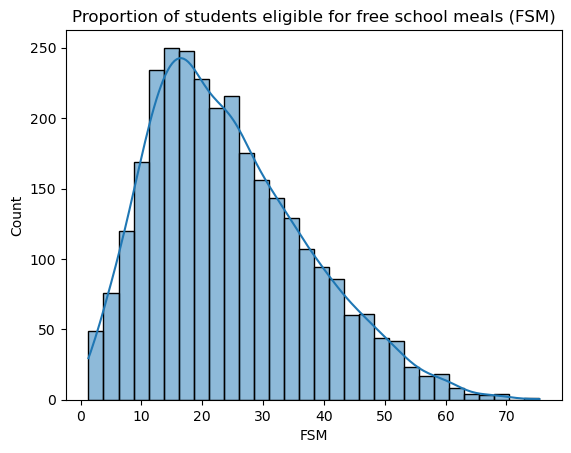

In [528]:
sns.histplot(data['FSM'], kde=True )
plt.title('Proportion of students eligible for free school meals (FSM)');

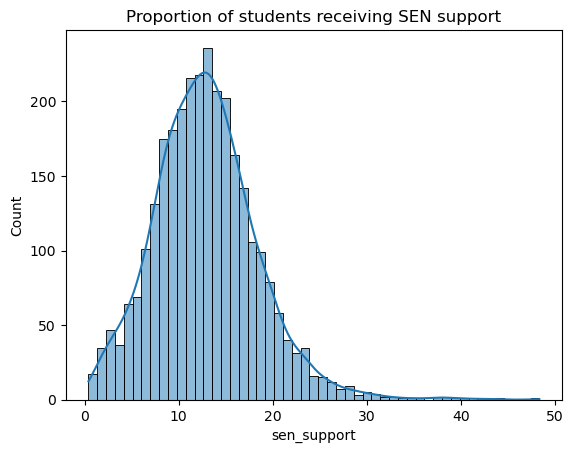

In [529]:
sns.histplot(data['sen_support'], kde=True )
plt.title('Proportion of students receiving SEN support');

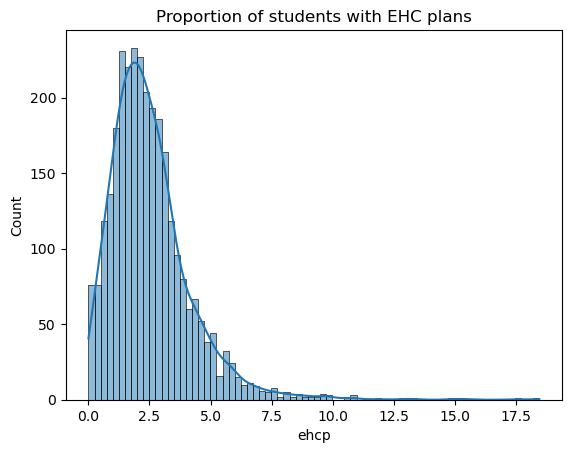

In [530]:
sns.histplot(data['ehcp'], kde=True )
plt.title('Proportion of students with EHC plans');

# Correlations

In [531]:
from copy import copy
from scipy.stats import kendalltau

In [532]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2972 entries, 1 to 3146
Data columns (total 39 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   URN                             2972 non-null   int64   
 1   not_sustained_rate              2972 non-null   float64 
 2   not_sustained_rate_overalldest  2972 non-null   float64 
 3   total_absence                   2972 non-null   float64 
 4   persistent_absence              2972 non-null   float64 
 5   urban_rural                     2972 non-null   category
 6   denomination                    2972 non-null   object  
 7   FSM                             2972 non-null   float64 
 8   White_British                   2972 non-null   float64 
 9   EAL                             2972 non-null   float64 
 10  perc_boys                       2972 non-null   float64 
 11  region_name                     2972 non-null   object  
 12  school_name              

In [533]:
data['Ofsted_num'] = data['Ofsted_rating']
data['Ofsted_num'].replace('Outstanding', 4, inplace=True)
data['Ofsted_num'].replace('Good', 3, inplace=True)
data['Ofsted_num'].replace('Requires improvement', 2, inplace=True)
data['Ofsted_num'].replace('Inadequate', 1, inplace=True)

In [534]:
# convert to category 
data['denomination'] = pd.Categorical(data['denomination'])
data['school_sex'] = pd.Categorical(data['school_sex'])
data['type'] = pd.Categorical(data['type'])
data['region_new'] = pd.Categorical(data['region_new'])

# convert to int
data['urban_binary'] = data['urban_binary'].astype(int)

In [535]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2972 entries, 1 to 3146
Data columns (total 40 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   URN                             2972 non-null   int64   
 1   not_sustained_rate              2972 non-null   float64 
 2   not_sustained_rate_overalldest  2972 non-null   float64 
 3   total_absence                   2972 non-null   float64 
 4   persistent_absence              2972 non-null   float64 
 5   urban_rural                     2972 non-null   category
 6   denomination                    2972 non-null   category
 7   FSM                             2972 non-null   float64 
 8   White_British                   2972 non-null   float64 
 9   EAL                             2972 non-null   float64 
 10  perc_boys                       2972 non-null   float64 
 11  region_name                     2972 non-null   object  
 12  school_name              

In [536]:
vars_for_corr = data[['not_sustained_rate', 'not_sustained_rate_overalldest',
                      'absence_rate_non_excl', 'persistent_absence', 
                      'perm_excl_rate', 'susp_rate', 'one_plus_susp_rate', 
                      'FSM', 'White_British', 'EAL', 'perc_boys', 'sen_support', 'ehcp', 
                      'headcount', 'KS4_headcount', 
                      'pupil_teacher_ratio', 'assistant_teacher_ratio', 
                      'Ofsted_num',
                      'KS2_history', 'KS4_pass_rate', 'Attainment_8', 'Progress_8', 
                      'selective', 'post16',
                      'IMD', 'urban_binary', 'single_sex_binary', 'faith_binary']]

In [537]:
vars_for_corr.columns

Index(['not_sustained_rate', 'not_sustained_rate_overalldest',
       'absence_rate_non_excl', 'persistent_absence', 'perm_excl_rate',
       'susp_rate', 'one_plus_susp_rate', 'FSM', 'White_British', 'EAL',
       'perc_boys', 'sen_support', 'ehcp', 'headcount', 'KS4_headcount',
       'pupil_teacher_ratio', 'assistant_teacher_ratio', 'Ofsted_num',
       'KS2_history', 'KS4_pass_rate', 'Attainment_8', 'Progress_8',
       'selective', 'post16', 'IMD', 'urban_binary', 'single_sex_binary',
       'faith_binary'],
      dtype='object')

In [538]:
corr_names = {
    'not_sustained_rate': 'Not sustained %',
    'not_sustained_rate_overalldest' : 'Not sustained % of known destinations',
    'absence_rate_non_excl': 'Absence %', 
    'persistent_absence': 'Persistent absence %',
    'perm_excl_rate': 'Permanent exclusion %', 
    'susp_rate': 'Suspension %', 
    'one_plus_susp_rate': 'One-plus suspension %', 
    'FSM': 'FSM %',
    'White_British': 'White British %', 
    'EAL': 'EAL %', 
    'perc_boys': 'Boys %', 
    'sen_support': 'SEN support %', 
    'ehcp': 'EHCP %', 
    'headcount': 'School headcount',
    'KS4_headcount': 'KS4 headcount', 
    'pupil_teacher_ratio': 'Pupil:Teacher ratio', 
    'assistant_teacher_ratio': 'Assistant:Teacher ratio',
    'Ofsted_num': 'Ofsted rating',
    'KS2_history': 'KS2 history', 
    'KS4_pass_rate': 'KS4 pass %', 
    'Attainment_8': 'A8', 
    'Progress_8': 'P8',
    'selective': 'Selective schools', 
    'post16': 'Post-16', 
    'IMD': 'IMD of LSOA', 
    'urban_binary': 'Urban schools', 
    'single_sex_binary': 'Single sex schools',
    'faith_binary': 'Faith schools'
}

In [539]:
vars_for_corr = vars_for_corr.rename(columns=corr_names)

In [540]:
# save variables for correlation matrix
corr = vars_for_corr.corr(method='kendall')

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
np.fill_diagonal(mask, False)

##### Positive correlations

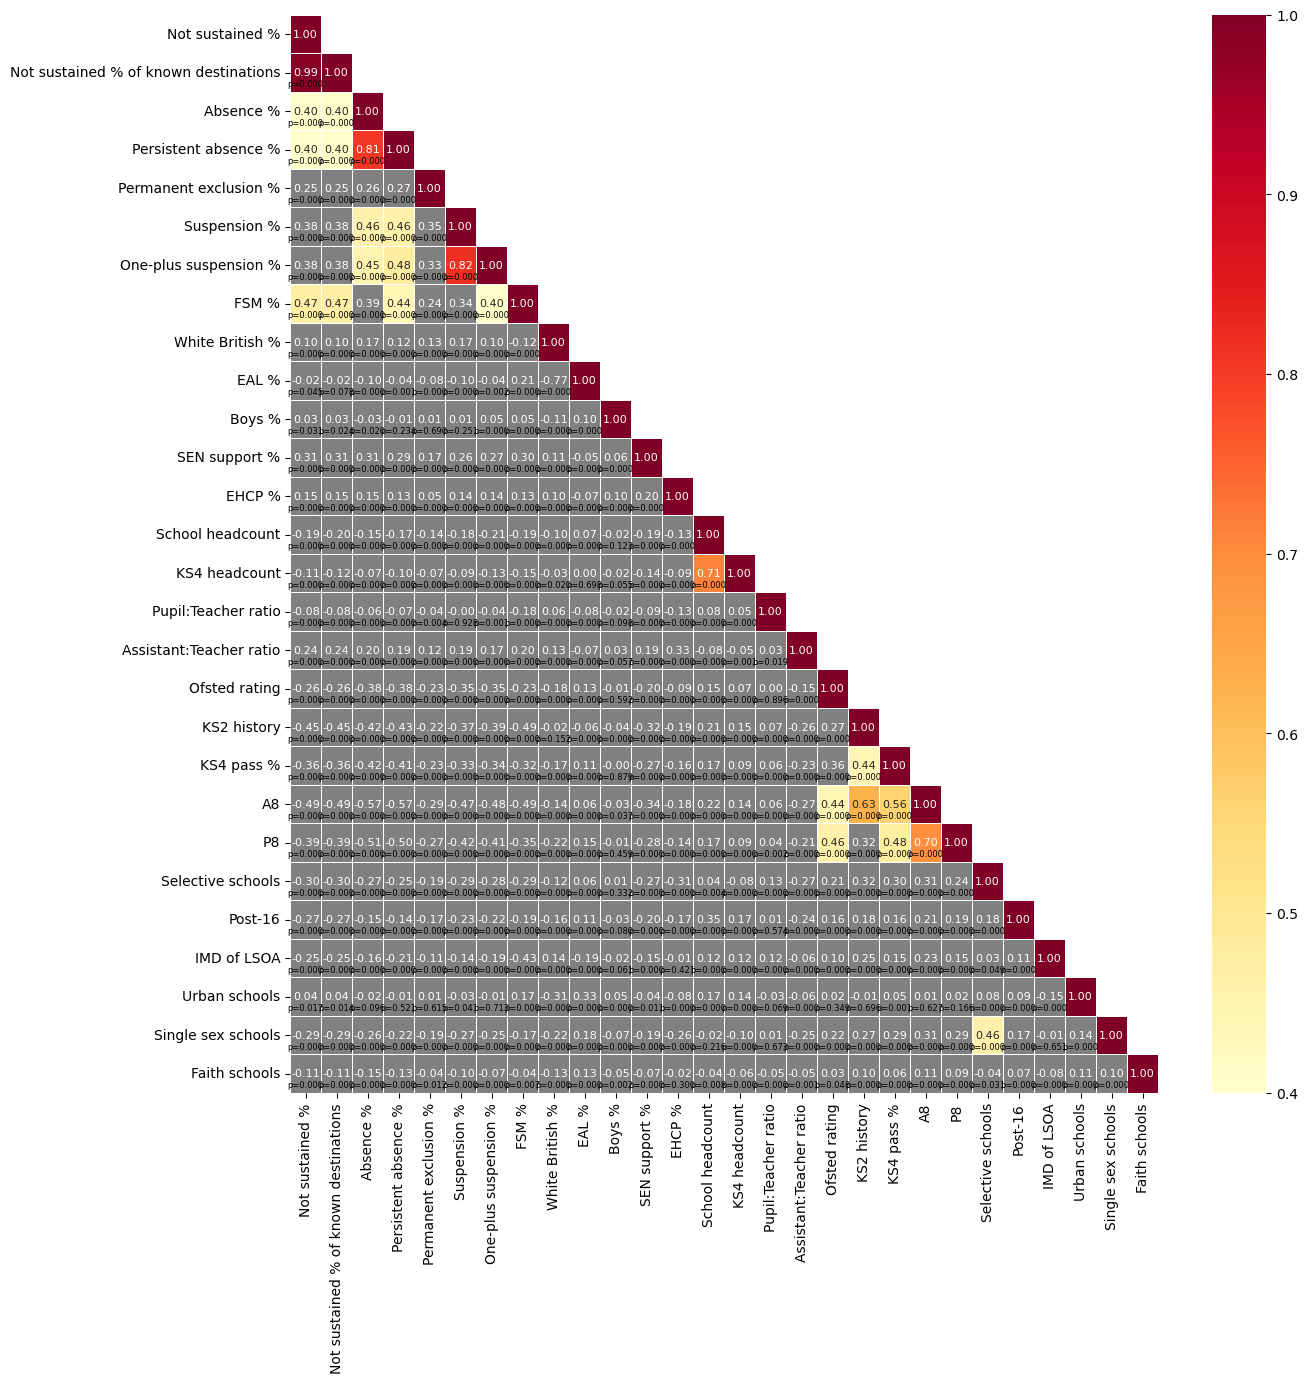

In [541]:
# set colour map for pos 
my_cmap = copy(plt.cm.YlOrRd)
my_cmap.set_over("grey")
my_cmap.set_under("grey")

# positive correlations
f, ax = plt.subplots(figsize=(14,14)) 

g = sns.heatmap(corr,
    vmin=0.4,
    vmax=1,
    cmap=my_cmap,
    linewidths=0.5,
    #linecolor="grey",
    annot = True,
    annot_kws={"fontsize": 8},
    fmt = '.2f',
    ax=ax,
    mask=mask)

# calculate p-values
p_values = np.full((corr.shape[0], corr.shape[1]), np.nan)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[1]):
        x = vars_for_corr.iloc[:, i]
        y = vars_for_corr.iloc[:, j]
        p_values[i, j] = kendalltau(x, y)[1]

p_values = pd.DataFrame(p_values, columns=corr.columns, index=corr.index)

max_corr = np.max(corr.max())
min_corr = np.min(corr.min())

for i in range (p_values.shape[0]):
    for j in range(p_values.shape[1]):
        p_value = p_values.iloc[i, j]
        if not np.isnan(p_value):
            correlation_value = corr.iloc[i, j]
            text_color = 'black' if p_value >= 0.001 else 'black'
            ax.text(i+0.5, j+0.8, f'p={p_value:.3f}',
                    horizontalalignment = 'center',
                    verticalalignment = 'center',
                    fontsize = 6,
                    color = text_color)


## Negative correlations

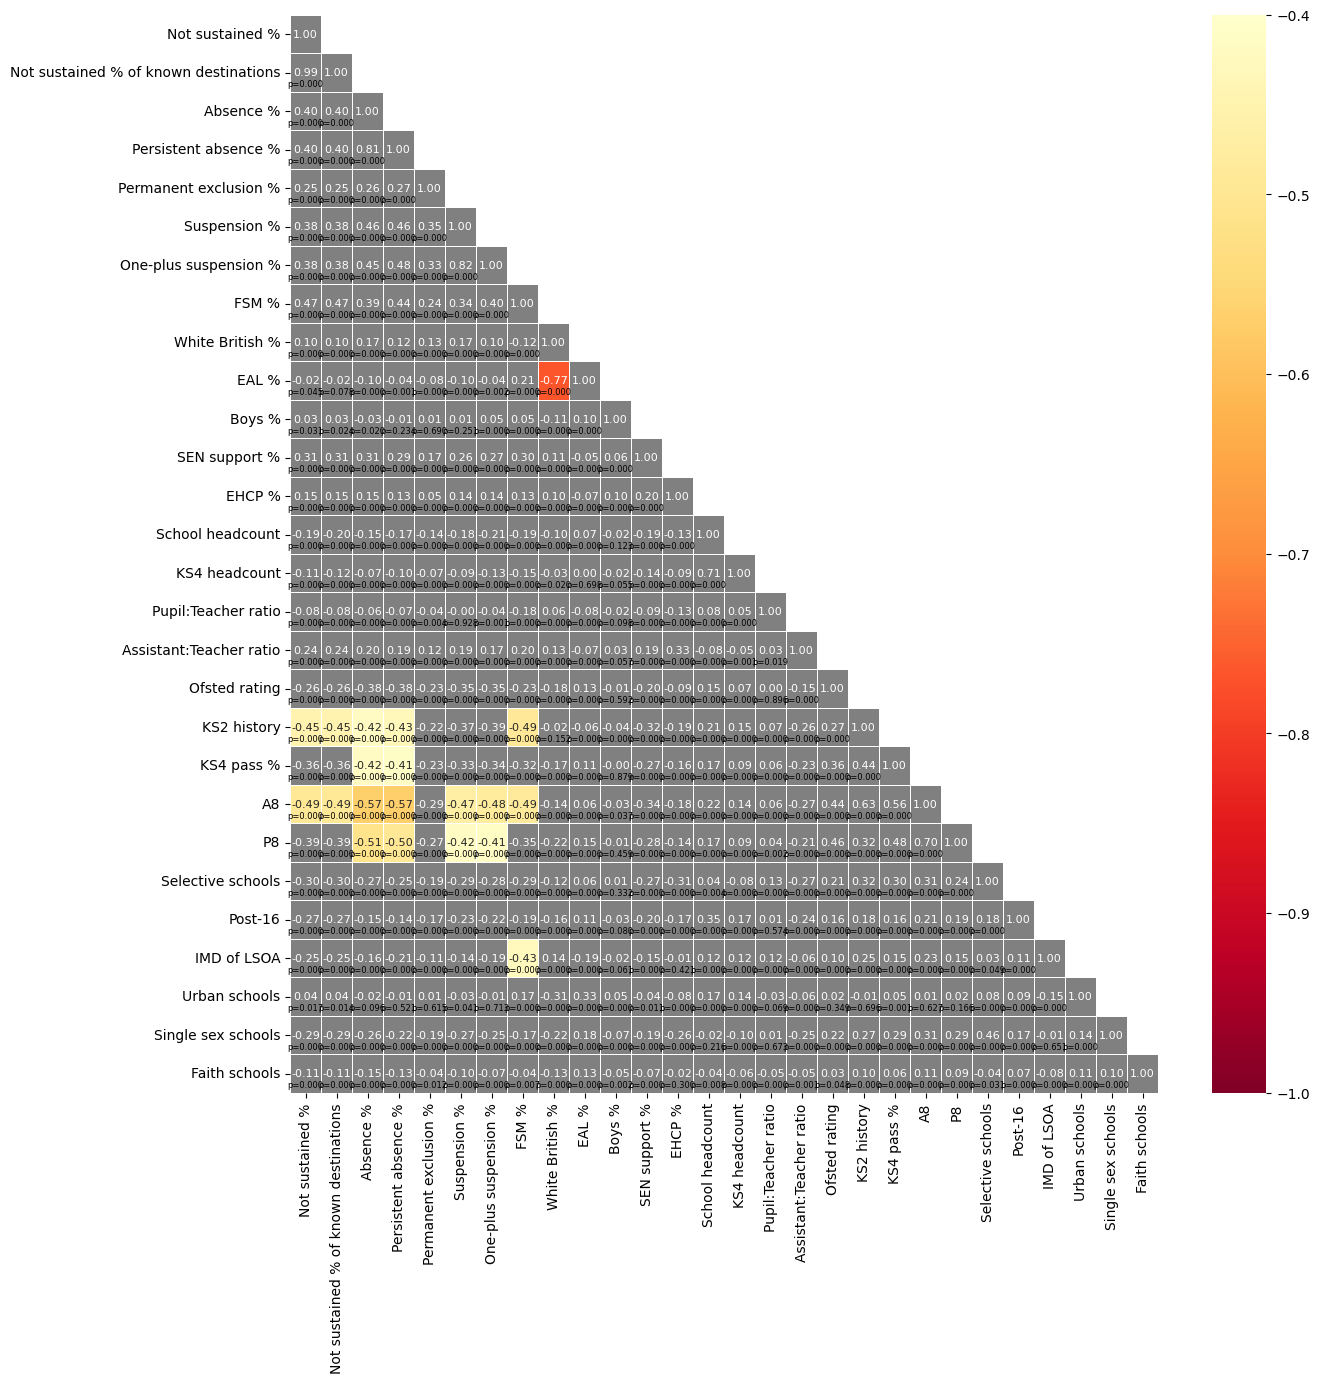

In [542]:
# set colour map for neg 
my_cmap_r = copy(plt.cm.YlOrRd_r)
my_cmap_r.set_over("grey")
my_cmap_r.set_under("grey")

# negative correlations
f, ax = plt.subplots(figsize=(14,14)) 

g = sns.heatmap(corr,
    vmin=-1,
    vmax=-0.4,
    cmap=my_cmap_r,
    linewidths=0.5,
    #linecolor="grey",
    annot = True,
    annot_kws={"fontsize": 8},
    fmt = '.2f',
    ax=ax,
    mask=mask)

# calculate p-values
p_values = np.full((corr.shape[0], corr.shape[1]), np.nan)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[1]):
        x = vars_for_corr.iloc[:, i]
        y = vars_for_corr.iloc[:, j]
        p_values[i, j] = kendalltau(x, y)[1]

p_values = pd.DataFrame(p_values, columns=corr.columns, index=corr.index)

max_corr = np.max(corr.max())
min_corr = np.min(corr.min())

for i in range (p_values.shape[0]):
    for j in range(p_values.shape[1]):
        p_value = p_values.iloc[i, j]
        if not np.isnan(p_value):
            correlation_value = corr.iloc[i, j]
            text_color = 'black' if p_value >= 0.001 else 'black'
            ax.text(i+0.5, j+0.8, f'p={p_value:.3f}',
                    horizontalalignment = 'center',
                    verticalalignment = 'center',
                    fontsize = 6,
                    color = text_color)

# Regression Models

In [543]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import PowerTransformer, OrdinalEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf

In [544]:
ord_transformer = OrdinalEncoder()

In [545]:
data[['Ofsted_rating']] = ord_transformer.fit_transform(data[['Ofsted_rating']])

In [546]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2972 entries, 1 to 3146
Data columns (total 40 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   URN                             2972 non-null   int64   
 1   not_sustained_rate              2972 non-null   float64 
 2   not_sustained_rate_overalldest  2972 non-null   float64 
 3   total_absence                   2972 non-null   float64 
 4   persistent_absence              2972 non-null   float64 
 5   urban_rural                     2972 non-null   category
 6   denomination                    2972 non-null   category
 7   FSM                             2972 non-null   float64 
 8   White_British                   2972 non-null   float64 
 9   EAL                             2972 non-null   float64 
 10  perc_boys                       2972 non-null   float64 
 11  region_name                     2972 non-null   object  
 12  school_name              

### Specify variables

In [547]:
predictors = data[[
'headcount',
'pupil_teacher_ratio',
'assistant_teacher_ratio',
'susp_rate',
'Progress_8',
'post16',
'Ofsted_rating',
'faith_binary',
'single_sex_binary',
]]

In [548]:
controls = data[[
'Attainment_8',
'absence_rate_non_excl',
'selective', 
'perc_boys',
'FSM',
'sen_support',
'White_British',
'KS2_history',
'IMD',
'urban_binary' 
]]

In [549]:
predictors_controls = data[[
'headcount',
'pupil_teacher_ratio',
'assistant_teacher_ratio',
'susp_rate',
'Progress_8',
'post16',
'Ofsted_rating',
'faith_binary',
'single_sex_binary',

# controls
'Attainment_8',
'absence_rate_non_excl',
'selective', 
'perc_boys',
'FSM',
'sen_support',
'White_British',
'KS2_history',
'IMD',
'urban_binary' 
]]

# Model 1 - OLS 

### individual effects

In [575]:
# extract R-squared for each predictor model
individual_r2 = {}

for p in predictors_controls:
    x = data[p]
    y = data['not_sustained_rate']

    model = sm.OLS(y, x).fit()

    individual_r2[p] = model.rsquared
    

In [576]:
# round to 3 dec
individual_r2 = {predictor: round(r2, 3) for predictor, r2 in individual_r2.items()}
individual_r2

{'headcount': 0.528,
 'pupil_teacher_ratio': 0.661,
 'assistant_teacher_ratio': 0.643,
 'susp_rate': 0.535,
 'Progress_8': 0.089,
 'post16': 0.293,
 'Ofsted_rating': 0.188,
 'faith_binary': 0.086,
 'single_sex_binary': 0.013,
 'Attainment_8': 0.55,
 'absence_rate_non_excl': 0.769,
 'selective': 0.001,
 'perc_boys': 0.637,
 'FSM': 0.8,
 'sen_support': 0.734,
 'White_British': 0.613,
 'KS2_history': 0.666,
 'IMD': 0.422,
 'urban_binary': 0.601}

### predictors

In [577]:
x = sm.add_constant(predictors)

In [578]:
y = data['not_sustained_rate']

In [579]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     not_sustained_rate   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     225.9
Date:                Fri, 28 Feb 2025   Prob (F-statistic):               0.00
Time:                        12:40:07   Log-Likelihood:                -7304.6
No. Observations:                2972   AIC:                         1.463e+04
Df Residuals:                    2962   BIC:                         1.469e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       8.2141      0.425     19.337      0.000       7.381       9.047
headcount                  -0.0010      0.000     -6.516      0.000      -0.001      -0.001
pupil_teacher_ratio        -0.1347      0.023     -5.861      0.000      -0.180      -0.090
assistant_teacher_ratio     2.4224      0.463      5.234      0.000       1.515       3.330
susp_rate                   0.0391      0.002     16.044      0.000       0.034       0.044
Progress_8                 -2.1030      0.125    -16.827      0.000      -2.348      -1.858
post16                     -0.8826      0.123     -7.167      0.000      -1.124      -0.641
Ofsted_rating              -0.0504      0.047     -1.077      0.282      -0.142       0.041
faith_binary               -0.4653      0.136     -3.410      0.001      -0.733      -0.198
single_sex_binary          -1.2354      0.183     -6.745      0.000      -1.595      -0.876
==============================================================================
Omnibus:                      419.202   Durbin-Watson:                   1.710
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              862.683
Skew:                           0.854   Prob(JB):                    4.68e-188
Kurtosis:                       5.012   Cond. No.                     1.14e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### predictors - overall dest

In [580]:
x = sm.add_constant(predictors)

In [581]:
y = data['not_sustained_rate_overalldest']

In [582]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     not_sustained_rate_overalldest   R-squared:                       0.393
Model:                                        OLS   Adj. R-squared:                  0.391
Method:                             Least Squares   F-statistic:                     213.2
Date:                            Fri, 28 Feb 2025   Prob (F-statistic):          2.62e-313
Time:                                    12:40:08   Log-Likelihood:                -7893.0
No. Observations:                            2972   AIC:                         1.581e+04
Df Residuals:                                2962   BIC:                         1.587e+04
Df Model:                                       9                                         
Covariance Type:                        nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       9.2657      0.518     17.894      0.000       8.250      10.281
headcount                  -0.0012      0.000     -6.520      0.000      -0.002      -0.001
pupil_teacher_ratio        -0.1601      0.028     -5.718      0.000      -0.215      -0.105
assistant_teacher_ratio     2.7863      0.564      4.939      0.000       1.680       3.892
susp_rate                   0.0488      0.003     16.407      0.000       0.043       0.055
Progress_8                 -2.4652      0.152    -16.183      0.000      -2.764      -2.167
post16                     -1.0164      0.150     -6.772      0.000      -1.311      -0.722
Ofsted_rating              -0.0515      0.057     -0.903      0.366      -0.163       0.060
faith_binary               -0.5323      0.166     -3.200      0.001      -0.859      -0.206
single_sex_binary          -1.2726      0.223     -5.700      0.000      -1.710      -0.835
==============================================================================
Omnibus:                      719.060   Durbin-Watson:                   1.707
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2351.480
Skew:                           1.203   Prob(JB):                         0.00
Kurtosis:                       6.633   Cond. No.                     1.14e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### predictors and controls

In [583]:
x = sm.add_constant(predictors_controls)

In [584]:
y = data['not_sustained_rate']

In [585]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     not_sustained_rate   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     200.3
Date:                Fri, 28 Feb 2025   Prob (F-statistic):               0.00
Time:                        12:40:08   Log-Likelihood:                -6850.3
No. Observations:                2972   AIC:                         1.374e+04
Df Residuals:                    2952   BIC:                         1.386e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      84.6346     10.177      8.317      0.000      64.680     104.589
headcount                  -0.0003      0.000     -1.770      0.077      -0.001    2.75e-05
pupil_teacher_ratio        -0.0101      0.020     -0.494      0.622      -0.050       0.030
assistant_teacher_ratio    -0.0952      0.413     -0.231      0.817      -0.904       0.714
susp_rate                   0.0155      0.002      6.739      0.000       0.011       0.020
Progress_8                 -3.8124      0.616     -6.190      0.000      -5.020      -2.605
post16                     -0.7750      0.108     -7.206      0.000      -0.986      -0.564
Ofsted_rating              -0.0180      0.040     -0.445      0.656      -0.097       0.061
faith_binary               -0.2395      0.123     -1.952      0.051      -0.480       0.001
single_sex_binary          -0.5466      0.177     -3.092      0.002      -0.893      -0.200
Attainment_8                0.3366      0.060      5.626      0.000       0.219       0.454
absence_rate_non_excl       0.1132      0.032      3.532      0.000       0.050       0.176
selective                   0.8411      0.346      2.430      0.015       0.163       1.520
perc_boys                   0.0058      0.003      2.056      0.040       0.000       0.011
FSM                         0.1003      0.007     15.409      0.000       0.088       0.113
sen_support                 0.0239      0.010      2.351      0.019       0.004       0.044
White_British               0.0208      0.002      9.725      0.000       0.017       0.025
KS2_history                -0.9571      0.123     -7.791      0.000      -1.198      -0.716
IMD                        -0.0667      0.020     -3.291      0.001      -0.107      -0.027
urban_binary                0.5597      0.143      3.908      0.000       0.279       0.840
==============================================================================
Omnibus:                      385.218   Durbin-Watson:                   1.827
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              944.292
Skew:                           0.737   Prob(JB):                    8.90e-206
Kurtosis:                       5.335   Cond. No.                     2.71e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.71e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [586]:
vif_values = pd.DataFrame()
vif_values['predictor'] = x.columns

vif_values['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

vif_values = vif_values.sort_values(by='VIF')
vif_values

predictor           VIF
7             Ofsted_rating      1.039184
13                perc_boys      1.087237
2       pupil_teacher_ratio      1.098516
8              faith_binary      1.134846
3   assistant_teacher_ratio      1.243817
19             urban_binary      1.258882
6                    post16      1.359158
1                 headcount      1.556779
15              sen_support      1.568536
9         single_sex_binary      1.576635
4                 susp_rate      1.581988
18                      IMD      1.639590
16            White_British      1.924669
11    absence_rate_non_excl      2.641287
12                selective      3.043762
14                      FSM      3.553699
5                Progress_8     48.642715
17              KS2_history     57.058512
10             Attainment_8    154.004165
0                     const  51968.785043

### predictors and controls - drop high VIF

In [587]:
predictors_controls_low_vif = predictors_controls.drop(columns=[ 'Attainment_8']).copy()

In [588]:
x = sm.add_constant(predictors_controls_low_vif)

In [589]:
y = data['not_sustained_rate']

In [590]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     not_sustained_rate   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     207.5
Date:                Fri, 28 Feb 2025   Prob (F-statistic):               0.00
Time:                        12:40:10   Log-Likelihood:                -6866.2
No. Observations:                2972   AIC:                         1.377e+04
Df Residuals:                    2953   BIC:                         1.388e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      30.7427      3.455      8.899      0.000      23.969      37.516
headcount                  -0.0003      0.000     -1.750      0.080      -0.001    3.06e-05
pupil_teacher_ratio        -0.0151      0.020     -0.737      0.461      -0.055       0.025
assistant_teacher_ratio    -0.0186      0.414     -0.045      0.964      -0.831       0.794
susp_rate                   0.0161      0.002      6.990      0.000       0.012       0.021
Progress_8                 -0.4320      0.136     -3.174      0.002      -0.699      -0.165
post16                     -0.7818      0.108     -7.232      0.000      -0.994      -0.570
Ofsted_rating              -0.0155      0.041     -0.380      0.704      -0.095       0.064
faith_binary               -0.2382      0.123     -1.931      0.054      -0.480       0.004
single_sex_binary          -0.6022      0.177     -3.394      0.001      -0.950      -0.254
absence_rate_non_excl       0.1051      0.032      3.265      0.001       0.042       0.168
selective                   1.6308      0.318      5.128      0.000       1.007       2.254
perc_boys                   0.0060      0.003      2.148      0.032       0.001       0.012
FSM                         0.1037      0.007     15.912      0.000       0.091       0.116
sen_support                 0.0254      0.010      2.479      0.013       0.005       0.045
White_British               0.0202      0.002      9.415      0.000       0.016       0.024
KS2_history                -0.2891      0.032     -9.122      0.000      -0.351      -0.227
IMD                        -0.0585      0.020     -2.878      0.004      -0.098      -0.019
urban_binary                0.5667      0.144      3.937      0.000       0.284       0.849
==============================================================================
Omnibus:                      400.545   Durbin-Watson:                   1.811
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              998.030
Skew:                           0.759   Prob(JB):                    1.91e-217
Kurtosis:                       5.400   Cond. No.                     9.15e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [591]:
vif_values = pd.DataFrame()
vif_values['predictor'] = x.columns

vif_values['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

vif_values = vif_values.sort_values(by='VIF')
vif_values

predictor          VIF
7             Ofsted_rating     1.039053
12                perc_boys     1.086870
2       pupil_teacher_ratio     1.096413
8              faith_binary     1.134842
3   assistant_teacher_ratio     1.242461
18             urban_binary     1.258785
6                    post16     1.358986
1                 headcount     1.556773
14              sen_support     1.567564
9         single_sex_binary     1.571700
4                 susp_rate     1.578122
17                      IMD     1.631065
15            White_British     1.920147
5                Progress_8     2.351170
11                selective     2.543240
10    absence_rate_non_excl     2.635905
13                      FSM     3.523677
16              KS2_history     3.758086
0                     const  5927.236736

In [592]:
model.aic

13770.377957862918

### predictors and controls - overall dest

In [593]:
x = sm.add_constant(predictors_controls)

In [594]:
y = data['not_sustained_rate_overalldest']

In [595]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     not_sustained_rate_overalldest   R-squared:                       0.546
Model:                                        OLS   Adj. R-squared:                  0.543
Method:                             Least Squares   F-statistic:                     186.6
Date:                            Fri, 28 Feb 2025   Prob (F-statistic):               0.00
Time:                                    12:40:11   Log-Likelihood:                -7462.5
No. Observations:                            2972   AIC:                         1.497e+04
Df Residuals:                                2952   BIC:                         1.509e+04
Df Model:                                      19                                         
Covariance Type:                        nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     110.8597     12.505      8.866      0.000      86.341     135.378
headcount                  -0.0003      0.000     -1.805      0.071      -0.001    2.78e-05
pupil_teacher_ratio        -0.0133      0.025     -0.532      0.595      -0.062       0.036
assistant_teacher_ratio    -0.1413      0.507     -0.279      0.780      -1.135       0.853
susp_rate                   0.0206      0.003      7.313      0.000       0.015       0.026
Progress_8                 -5.2389      0.757     -6.923      0.000      -6.723      -3.755
post16                     -0.9063      0.132     -6.858      0.000      -1.165      -0.647
Ofsted_rating              -0.0176      0.050     -0.353      0.724      -0.115       0.080
faith_binary               -0.2439      0.151     -1.618      0.106      -0.540       0.052
single_sex_binary          -0.5504      0.217     -2.534      0.011      -0.976      -0.124
Attainment_8                0.4707      0.074      6.403      0.000       0.327       0.615
absence_rate_non_excl       0.1402      0.039      3.559      0.000       0.063       0.217
selective                   1.1559      0.425      2.718      0.007       0.322       1.990
perc_boys                   0.0062      0.003      1.790      0.074      -0.001       0.013
FSM                         0.1191      0.008     14.895      0.000       0.103       0.135
sen_support                 0.0313      0.013      2.498      0.013       0.007       0.056
White_British               0.0232      0.003      8.832      0.000       0.018       0.028
KS2_history                -1.2720      0.151     -8.427      0.000      -1.568      -0.976
IMD                        -0.0753      0.025     -3.021      0.003      -0.124      -0.026
urban_binary                0.6339      0.176      3.602      0.000       0.289       0.979
==============================================================================
Omnibus:                      722.939   Durbin-Watson:                   1.823
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3025.401
Skew:                           1.127   Prob(JB):                         0.00
Kurtosis:                       7.399   Cond. No.                     2.71e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.71e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [596]:
vif_values = pd.DataFrame()
vif_values['predictor'] = x.columns

vif_values['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

vif_values = vif_values.sort_values(by='VIF')
vif_values

predictor           VIF
7             Ofsted_rating      1.039184
13                perc_boys      1.087237
2       pupil_teacher_ratio      1.098516
8              faith_binary      1.134846
3   assistant_teacher_ratio      1.243817
19             urban_binary      1.258882
6                    post16      1.359158
1                 headcount      1.556779
15              sen_support      1.568536
9         single_sex_binary      1.576635
4                 susp_rate      1.581988
18                      IMD      1.639590
16            White_British      1.924669
11    absence_rate_non_excl      2.641287
12                selective      3.043762
14                      FSM      3.553699
5                Progress_8     48.642715
17              KS2_history     57.058512
10             Attainment_8    154.004165
0                     const  51968.785043

### predictors and controls - overall dest - drop high VIF

In [597]:
predictors_controls_low_vif = predictors_controls.drop(columns=['Attainment_8']).copy()

In [598]:
x = sm.add_constant(predictors_controls_low_vif)

In [599]:
y = data['not_sustained_rate_overalldest']

In [600]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     not_sustained_rate_overalldest   R-squared:                       0.539
Model:                                        OLS   Adj. R-squared:                  0.537
Method:                             Least Squares   F-statistic:                     192.1
Date:                            Fri, 28 Feb 2025   Prob (F-statistic):               0.00
Time:                                    12:40:12   Log-Likelihood:                -7483.0
No. Observations:                            2972   AIC:                         1.500e+04
Df Residuals:                                2953   BIC:                         1.512e+04
Df Model:                                      18                                         
Covariance Type:                        nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      35.5013      4.252      8.350      0.000      27.165      43.838
headcount                  -0.0003      0.000     -1.780      0.075      -0.001    3.23e-05
pupil_teacher_ratio        -0.0203      0.025     -0.808      0.419      -0.070       0.029
assistant_teacher_ratio    -0.0342      0.510     -0.067      0.947      -1.034       0.966
susp_rate                   0.0215      0.003      7.587      0.000       0.016       0.027
Progress_8                 -0.5121      0.168     -3.057      0.002      -0.841      -0.184
post16                     -0.9158      0.133     -6.884      0.000      -1.177      -0.655
Ofsted_rating              -0.0140      0.050     -0.280      0.780      -0.112       0.084
faith_binary               -0.2420      0.152     -1.594      0.111      -0.540       0.056
single_sex_binary          -0.6282      0.218     -2.877      0.004      -1.056      -0.200
absence_rate_non_excl       0.1288      0.040      3.252      0.001       0.051       0.207
selective                   2.2601      0.391      5.775      0.000       1.493       3.027
perc_boys                   0.0066      0.003      1.895      0.058      -0.000       0.013
FSM                         0.1238      0.008     15.445      0.000       0.108       0.140
sen_support                 0.0332      0.013      2.641      0.008       0.009       0.058
White_British               0.0224      0.003      8.474      0.000       0.017       0.028
KS2_history                -0.3379      0.039     -8.665      0.000      -0.414      -0.261
IMD                        -0.0638      0.025     -2.549      0.011      -0.113      -0.015
urban_binary                0.6438      0.177      3.634      0.000       0.296       0.991
==============================================================================
Omnibus:                      754.798   Durbin-Watson:                   1.804
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3276.862
Skew:                           1.167   Prob(JB):                         0.00
Kurtosis:                       7.584   Cond. No.                     9.15e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [601]:
vif_values = pd.DataFrame()
vif_values['predictor'] = x.columns

vif_values['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

vif_values = vif_values.sort_values(by='VIF')
vif_values

predictor          VIF
7             Ofsted_rating     1.039053
12                perc_boys     1.086870
2       pupil_teacher_ratio     1.096413
8              faith_binary     1.134842
3   assistant_teacher_ratio     1.242461
18             urban_binary     1.258785
6                    post16     1.358986
1                 headcount     1.556773
14              sen_support     1.567564
9         single_sex_binary     1.571700
4                 susp_rate     1.578122
17                      IMD     1.631065
15            White_British     1.920147
5                Progress_8     2.351170
11                selective     2.543240
10    absence_rate_non_excl     2.635905
13                      FSM     3.523677
16              KS2_history     3.758086
0                     const  5927.236736

In [602]:
model.aic

15004.074893996349

## Visualisations

#### Residuals

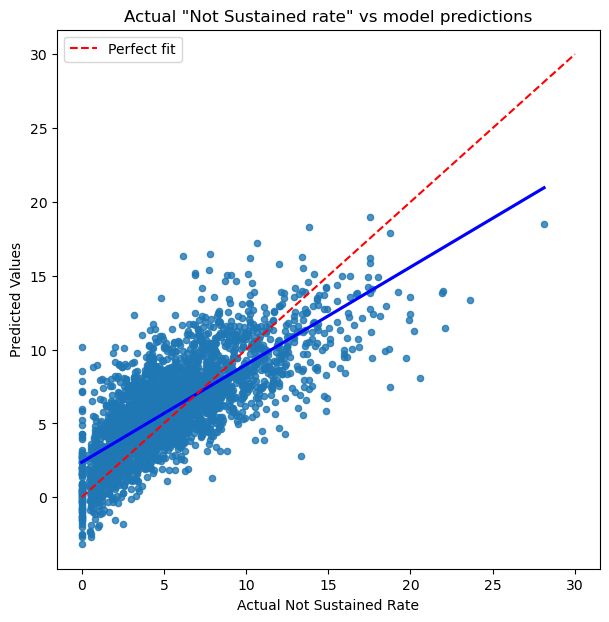

In [603]:
fig, ax = plt.subplots(figsize=(7,7))
sns.regplot(x=data['not_sustained_rate'], 
            y=model.fittedvalues, 
            ax=ax, 
            scatter_kws={'s': 20}, 
            line_kws={'color': 'blue'}, 
            ci=None
           )

plt.plot([0, 30], 
         [0, 30], 
         color='red', linestyle='--', label='Perfect fit')


plt.title('Actual "Not Sustained rate" vs model predictions')
plt.xlabel('Actual Not Sustained Rate')
plt.ylabel('Predicted Values')
plt.legend();

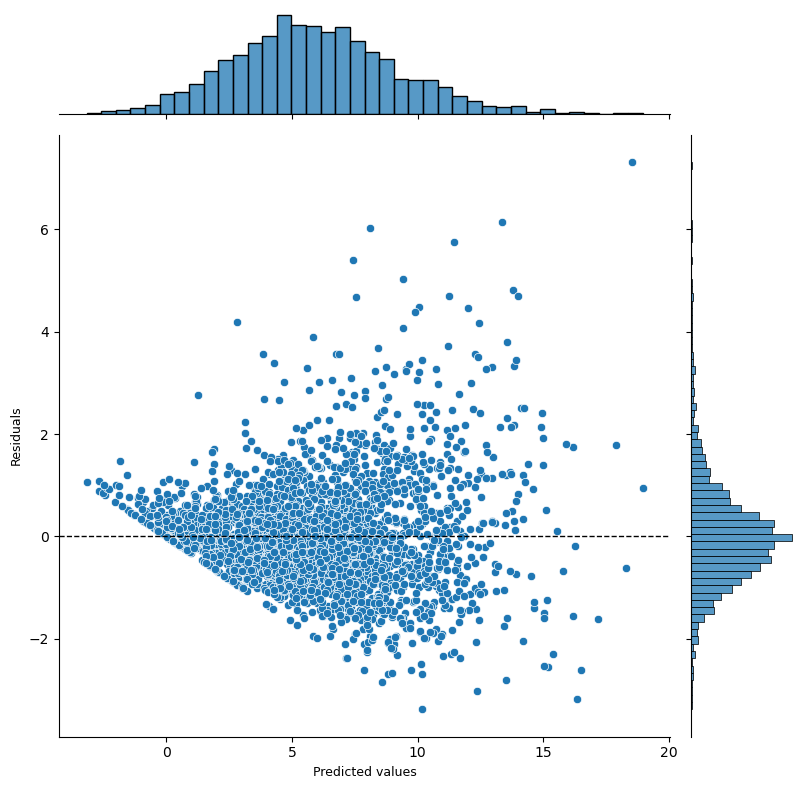

In [604]:
# create jointplot
g = sns.jointplot(x=model.fittedvalues, y=model.resid_pearson, kind='scatter', height=8)

# access the scatter plot part of the jointplot
ax = g.ax_joint

# add a horizontal line at y=0
ax.axhline(0, color='black', linestyle='--', linewidth=1)

g.set_axis_labels('Predicted values', 'Residuals', fontsize=9);

#### Correlation matrix

In [605]:
vars = x.columns.tolist()
vars = vars[1:]
vars

['headcount',
 'pupil_teacher_ratio',
 'assistant_teacher_ratio',
 'susp_rate',
 'Progress_8',
 'post16',
 'Ofsted_rating',
 'faith_binary',
 'single_sex_binary',
 'absence_rate_non_excl',
 'selective',
 'perc_boys',
 'FSM',
 'sen_support',
 'White_British',
 'KS2_history',
 'IMD',
 'urban_binary']

In [606]:
vars_for_corr = data[vars]


In [607]:
# save variables for correlation matrix
corr = vars_for_corr.corr(method='kendall')

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
np.fill_diagonal(mask, False)

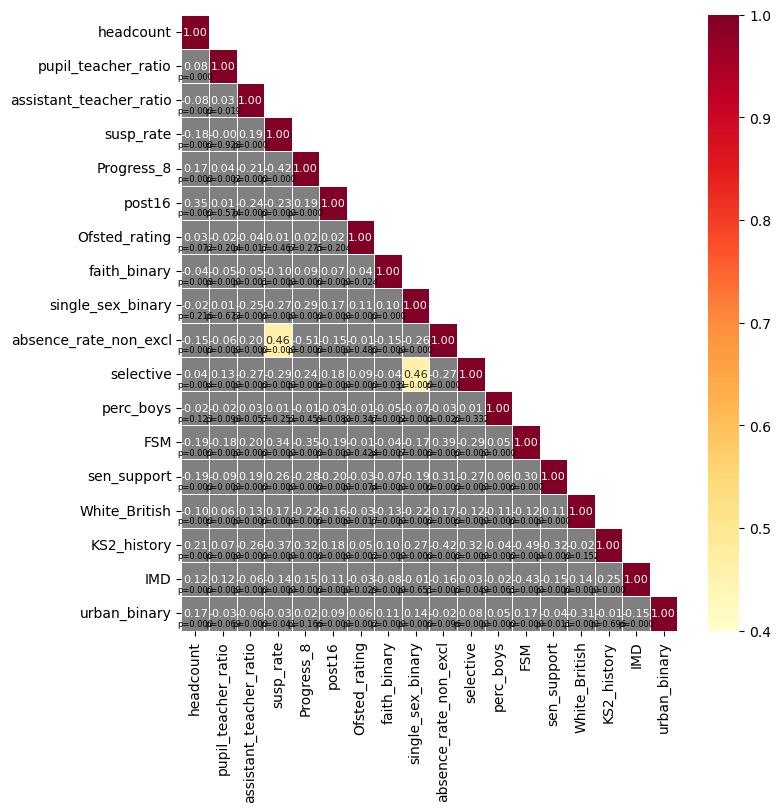

In [608]:
# set colour map for pos 
my_cmap = copy(plt.cm.YlOrRd)
my_cmap.set_over("grey")
my_cmap.set_under("grey")

# positive correlations
f, ax = plt.subplots(figsize=(8,8)) 

g = sns.heatmap(corr,
    vmin=0.4,
    vmax=1,
    cmap=my_cmap,
    linewidths=0.5,
    #linecolor="grey",
    annot = True,
    annot_kws={"fontsize": 8},
    fmt = '.2f',
    ax=ax,
    mask=mask)

# calculate p-values
p_values = np.full((corr.shape[0], corr.shape[1]), np.nan)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[1]):
        x = vars_for_corr.iloc[:, i]
        y = vars_for_corr.iloc[:, j]
        p_values[i, j] = kendalltau(x, y)[1]

p_values = pd.DataFrame(p_values, columns=corr.columns, index=corr.index)

max_corr = np.max(corr.max())
min_corr = np.min(corr.min())

for i in range (p_values.shape[0]):
    for j in range(p_values.shape[1]):
        p_value = p_values.iloc[i, j]
        if not np.isnan(p_value):
            correlation_value = corr.iloc[i, j]
            text_color = 'black' if p_value >= 0.001 else 'black'
            ax.text(i+0.5, j+0.8, f'p={p_value:.3f}',
                    horizontalalignment = 'center',
                    verticalalignment = 'center',
                    fontsize = 6,
                    color = text_color)


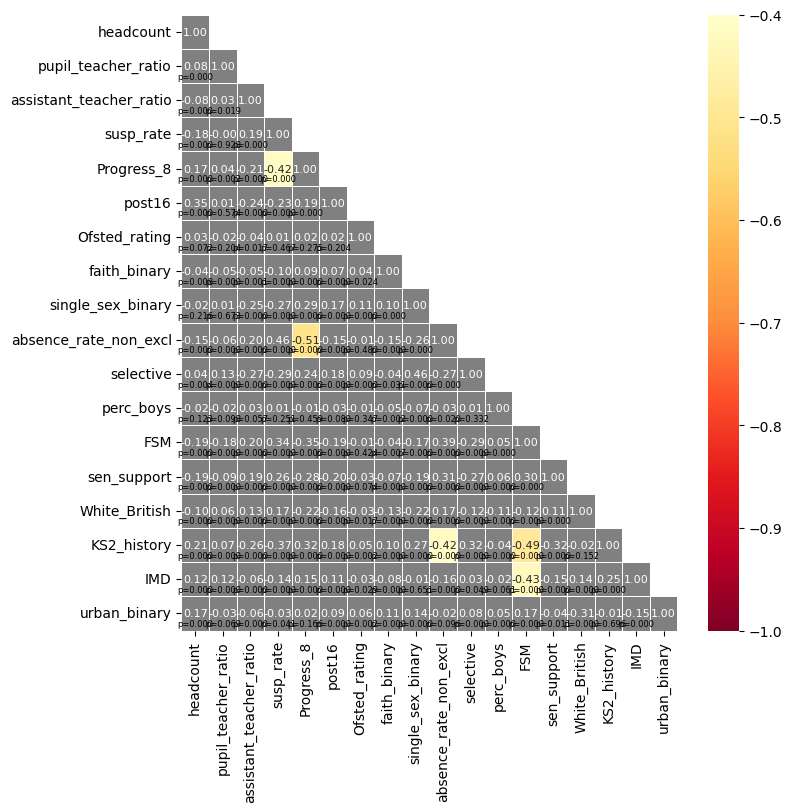

In [609]:
# set colour map for neg 
my_cmap_r = copy(plt.cm.YlOrRd_r)
my_cmap_r.set_over("grey")
my_cmap_r.set_under("grey")

# negative correlations
f, ax = plt.subplots(figsize=(8,8)) 

g = sns.heatmap(corr,
    vmin=-1,
    vmax=-0.4,
    cmap=my_cmap_r,
    linewidths=0.5,
    #linecolor="grey",
    annot = True,
    annot_kws={"fontsize": 8},
    fmt = '.2f',
    ax=ax,
    mask=mask)

# calculate p-values
p_values = np.full((corr.shape[0], corr.shape[1]), np.nan)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[1]):
        x = vars_for_corr.iloc[:, i]
        y = vars_for_corr.iloc[:, j]
        p_values[i, j] = kendalltau(x, y)[1]

p_values = pd.DataFrame(p_values, columns=corr.columns, index=corr.index)

max_corr = np.max(corr.max())
min_corr = np.min(corr.min())

for i in range (p_values.shape[0]):
    for j in range(p_values.shape[1]):
        p_value = p_values.iloc[i, j]
        if not np.isnan(p_value):
            correlation_value = corr.iloc[i, j]
            text_color = 'black' if p_value >= 0.001 else 'black'
            ax.text(i+0.5, j+0.8, f'p={p_value:.3f}',
                    horizontalalignment = 'center',
                    verticalalignment = 'center',
                    fontsize = 6,
                    color = text_color)

#### Coefficient plot

In [610]:
# extract coefficients and confidence intervals
coef = model.params
conf = model.conf_int()
sig = model.pvalues

# df for plotting
coef_df = pd.DataFrame({
    'Coefficient': coef,
    'Lower CI': conf[0],
    'Upper CI': conf[1],
    'p-value': sig
}).reset_index().rename(columns={'index': 'Predictor'})

coef_df = coef_df[coef_df['Predictor'] != 'const']

# sort values
coef_df = coef_df.sort_values(by='Coefficient')

# rename labels using dictionary
#coef_df['Predictor'] = coef_df['Predictor'].map(corr_names)
coef_df

Predictor  Coefficient  Lower CI  Upper CI       p-value
6                    post16    -0.915802 -1.176653 -0.654952  7.082862e-12
9         single_sex_binary    -0.628212 -1.056338 -0.200085  4.041855e-03
5                Progress_8    -0.512093 -0.840525 -0.183661  2.253887e-03
16              KS2_history    -0.337947 -0.414417 -0.261476  7.293812e-18
8              faith_binary    -0.242029 -0.539682  0.055625  1.109659e-01
17                      IMD    -0.063784 -0.112843 -0.014725  1.084509e-02
3   assistant_teacher_ratio    -0.034163 -1.034202  0.965876  9.465997e-01
2       pupil_teacher_ratio    -0.020342 -0.069733  0.029049  4.194133e-01
7             Ofsted_rating    -0.013987 -0.112076  0.084101  7.797989e-01
1                 headcount    -0.000318 -0.000669  0.000032  7.516487e-02
12                perc_boys     0.006560 -0.000226  0.013346  5.814242e-02
4                 susp_rate     0.021531  0.015967  0.027096  4.354606e-14
15            White_British     0.022394  0.017213  0.027576  3.675564e-17
14              sen_support     0.033245  0.008561  0.057929  8.313899e-03
13                      FSM     0.123837  0.108116  0.139559  8.214899e-52
10    absence_rate_non_excl     0.128828  0.051142  0.206515  1.160650e-03
18             urban_binary     0.643779  0.296415  0.991144  2.838853e-04
11                selective     2.260100  1.492733  3.027466  8.496886e-09

In [611]:
coef_df_sig = coef_df.loc[coef_df['p-value'] <0.05].copy()
coef_df_sig

Predictor  Coefficient  Lower CI  Upper CI       p-value
6                  post16    -0.915802 -1.176653 -0.654952  7.082862e-12
9       single_sex_binary    -0.628212 -1.056338 -0.200085  4.041855e-03
5              Progress_8    -0.512093 -0.840525 -0.183661  2.253887e-03
16            KS2_history    -0.337947 -0.414417 -0.261476  7.293812e-18
17                    IMD    -0.063784 -0.112843 -0.014725  1.084509e-02
4               susp_rate     0.021531  0.015967  0.027096  4.354606e-14
15          White_British     0.022394  0.017213  0.027576  3.675564e-17
14            sen_support     0.033245  0.008561  0.057929  8.313899e-03
13                    FSM     0.123837  0.108116  0.139559  8.214899e-52
10  absence_rate_non_excl     0.128828  0.051142  0.206515  1.160650e-03
18           urban_binary     0.643779  0.296415  0.991144  2.838853e-04
11              selective     2.260100  1.492733  3.027466  8.496886e-09

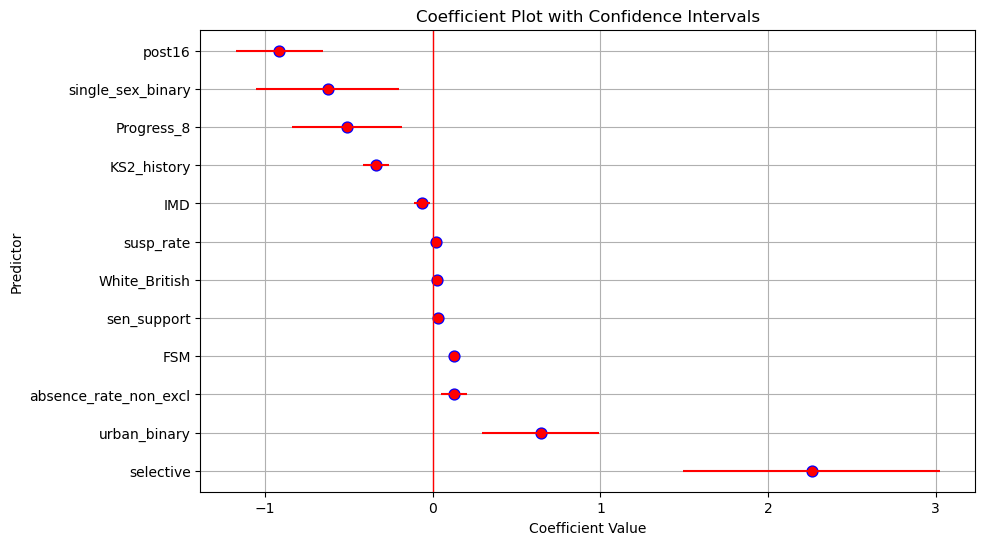

In [612]:
# rename labels using dictionary
#coef_df_sig['Predictor'] = coef_df_sig['Predictor'].map(corr_names)

# plot
plt.figure(figsize=(10, 6))
sns.pointplot(x='Coefficient', y='Predictor', data=coef_df_sig, linestyle='none', markers='o', color='blue')
plt.errorbar(coef_df_sig['Coefficient'], coef_df_sig['Predictor'], 
             xerr=[coef_df_sig['Coefficient'] - coef_df_sig['Lower CI'], coef_df_sig['Upper CI'] - coef_df_sig['Coefficient']], 
             fmt='o', color='red')

# add a vertical line at x=0
ax = plt.gca() # get current axis
ax.axvline(0, color='red', linestyle='-', linewidth=1)

plt.title('Coefficient Plot with Confidence Intervals')
plt.xlabel('Coefficient Value')
plt.ylabel('Predictor')
plt.grid(True)
plt.show()

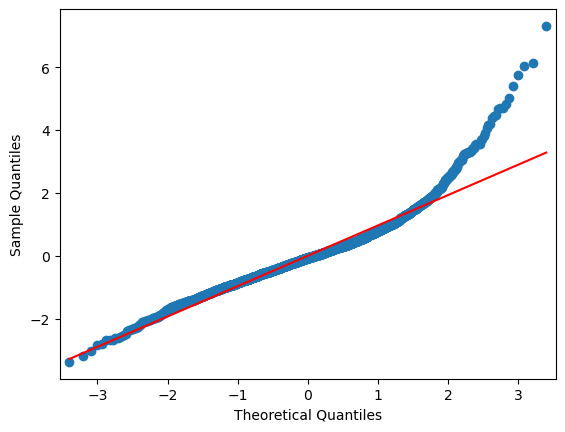

In [613]:
qqplot(model.resid_pearson, line='r');

# Model 2 - GLM

- used when residuals / data not normally distributed (NEET outcome)
- does not assume linear relationship
- capacity to handle a more comprehensive array of data types

in this case, response variable is always positive, does not meet the assumption that constant change in a predictor leads to a constant change in the response variable

Gamma distribution: skewed positive continuous distribution 

In [614]:
glm_data = data.drop(columns=['total_absence', 'persistent_absence', 'urban_rural',
                              'denomination', 'type',
                             'EAL', 'region_name', 'school_name', 'perm_excl_rate', 
                             'one_plus_susp_rate', 'KS4_headcount', 'KS4_pass_rate',
                             'POSTCODE', 'school_sex', 'ehcp', 'LSOA11', 'region_new'])

In [615]:
glm_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2972 entries, 1 to 3146
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   URN                             2972 non-null   int64   
 1   not_sustained_rate              2972 non-null   float64 
 2   not_sustained_rate_overalldest  2972 non-null   float64 
 3   FSM                             2972 non-null   float64 
 4   White_British                   2972 non-null   float64 
 5   perc_boys                       2972 non-null   float64 
 6   headcount                       2972 non-null   float64 
 7   susp_rate                       2972 non-null   float64 
 8   KS2_history                     2972 non-null   float64 
 9   Attainment_8                    2972 non-null   float64 
 10  Progress_8                      2972 non-null   float64 
 11  selective                       2972 non-null   int64   
 12  post16                   

In [616]:
glm_data['selective'].replace(0, 'Non-selective', inplace=True)
glm_data['selective'].replace(1, 'Selective', inplace=True)

In [617]:
glm_data['post16'].replace(0, 'No Post-16', inplace=True)
glm_data['post16'].replace(1, 'Post-16', inplace=True)

In [618]:
glm_data['single_sex_binary'].replace(0, 'Mixed', inplace=True)
glm_data['single_sex_binary'].replace(1, 'Single-sex', inplace=True)

In [619]:
glm_data['faith_binary'].replace(0, 'No faith', inplace=True)
glm_data['faith_binary'].replace(1, 'Faith', inplace=True)

In [620]:
glm_data['urban_binary'].replace(0, 'Rural', inplace=True)
glm_data['urban_binary'].replace(1, 'Urban', inplace=True)

In [621]:
glm_data.head()

URN  not_sustained_rate  not_sustained_rate_overalldest   FSM  \
1  137181            5.172414                        5.660377  41.2   
3  100050            2.824859                        2.906977  35.6   
4  100051            5.464481                        5.988024  61.8   
5  100052            1.932367                        1.980198  41.8   
6  100053            4.469274                        4.705882  34.3   

   White_British  perc_boys  headcount  susp_rate  KS2_history  Attainment_8  \
1           10.8  56.874466     1171.0   14.51751        105.1          47.4   
3           38.8   4.963971     1249.0    9.12730        107.1          59.1   
4            3.9  56.163114     1079.0    5.37535        103.5          43.8   
5           11.4  51.630023     1319.0    3.26005        103.2          44.6   
6           46.3  65.778160     1163.0    8.25451        106.0          50.3   

   Progress_8      selective   post16  Ofsted_rating  sen_support  IMD  \
1       -0.18  Non-selective  Post-16            3.0    10.247652  8.0   
3        0.61  Non-selective  Post-16            0.0    13.370697  4.0   
4       -0.06  Non-selective  Post-16            0.0    17.886932  2.0   
5       -0.04  Non-selective  Post-16            0.0     9.628506  7.0   
6       -0.17  Non-selective  Post-16            0.0    11.951849  5.0   

   pupil_teacher_ratio  assistant_teacher_ratio  absence_rate_non_excl  \
1                 13.0                      0.2              10.803701   
3                 14.7                      0.1               7.769210   
4                 11.9                      0.2              11.246731   
5                 14.9                      0.2               8.103096   
6                 12.2                      0.3               7.963311   

  single_sex_binary faith_binary urban_binary Ofsted_num  
1             Mixed     No faith        Urban          2  
3        Single-sex     No faith        Urban          3  
4             Mixed     No faith        Urban          3  
5             Mixed     No faith        Urban          3  
6             Mixed     No faith        Urban          3

In [622]:
# convert to category 
glm_data['selective'] = pd.Categorical(glm_data['selective'])
glm_data['single_sex_binary'] = pd.Categorical(glm_data['single_sex_binary'])
glm_data['faith_binary'] = pd.Categorical(glm_data['faith_binary'])
glm_data['post16'] = pd.Categorical(glm_data['post16'])
glm_data['urban_binary'] = pd.Categorical(glm_data['urban_binary'])

glm_data[['Ofsted_rating']] = ord_transformer.fit_transform(glm_data[['Ofsted_rating']])

In [623]:
glm_data.describe()

URN  not_sustained_rate  not_sustained_rate_overalldest  \
count    2972.000000         2972.000000                     2972.000000   
mean   133863.203567            5.354765                        5.907684   
std     12011.537035            3.670508                        4.422501   
min    100050.000000            0.000000                        0.000000   
25%    135760.750000            2.720164                        2.824859   
50%    137338.500000            4.591837                        4.851427   
75%    140412.750000            7.272727                        7.926829   
max    148866.000000           28.125000                       40.540541   

               FSM  White_British    perc_boys    headcount    susp_rate  \
count  2972.000000    2972.000000  2972.000000  2972.000000  2972.000000   
mean     24.482470      63.886137    50.348293  1115.075034    20.286441   
std      12.930734      28.961852    16.637625   385.419425    24.449683   
min       1.300000       0.000000     0.000000    81.000000     0.000000   
25%      14.700000      44.400000    49.178838   847.000000     6.619397   
50%      22.500000      75.300000    50.977719  1082.000000    13.096390   
75%      32.725000      87.300000    53.044672  1359.000000    24.544380   
max      75.400000      99.300000   100.000000  2990.000000   358.064520   

       KS2_history  Attainment_8   Progress_8  Ofsted_rating  sen_support  \
count  2972.000000   2972.000000  2972.000000    2972.000000  2972.000000   
mean    104.437248     47.261137    -0.001413       0.704240    12.866762   
std       2.745410      9.261298     0.505607       1.125427     5.493081   
min      92.100000     18.800000    -3.380000       0.000000     0.403226   
25%     102.800000     41.300000    -0.330000       0.000000     9.227085   
50%     104.200000     46.100000    -0.010000       0.000000    12.608697   
75%     105.500000     51.500000     0.330000       2.000000    16.039934   
max     117.400000     87.600000     2.370000       3.000000    48.316252   

              IMD  pupil_teacher_ratio  assistant_teacher_ratio  \
count  2972.00000          2972.000000              2972.000000   
mean      5.66319            16.897241                 0.230585   
std       2.81924             2.295918                 0.120709   
min       1.00000             5.300000                 0.000000   
25%       3.00000            15.600000                 0.100000   
50%       6.00000            16.800000                 0.200000   
75%       8.00000            18.000000                 0.300000   
max      10.00000            43.400000                 1.000000   

       absence_rate_non_excl  
count            2972.000000  
mean                8.819434  
std                 2.263271  
min                 3.034038  
25%                 7.330413  
50%                 8.653188  
75%                10.098754  
max                32.617429

In [624]:
columns_with_zeros = ['not_sustained_rate', 'White_British', 'perc_boys', 'susp_rate', 
                       'assistant_teacher_ratio', 'Ofsted_rating']

In [625]:
glm_data[columns_with_zeros] = glm_data[columns_with_zeros] + 1

In [626]:
glm_data['Progress_8'] = glm_data['Progress_8'] +4

### Predictors

In [627]:
model_glm = smf.glm(formula = ('not_sustained_rate ~ headcount + pupil_teacher_ratio + assistant_teacher_ratio +'
                               'susp_rate + Progress_8 + Ofsted_rating +'
                               'C(post16, Treatment(reference="Post-16")) +'
                               'C(faith_binary, Treatment(reference="No faith")) +'
                               'C(single_sex_binary, Treatment(reference="Mixed"))'
                              ), 
                    data=glm_data, 
                    family=sm.families.Gamma(link=sm.families.links.Log())).fit()

In [628]:
model_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:     not_sustained_rate   No. Observations:                 2972
Model:                            GLM   Df Residuals:                     2962
Model Family:                   Gamma   Df Model:                            9
Link Function:                    Log   Scale:                         0.20462
Method:                          IRLS   Log-Likelihood:                -6885.5
Date:                Fri, 28 Feb 2025   Deviance:                       608.16
Time:                        12:40:18   Pearson chi2:                     606.
No. Iterations:                    14   Pseudo R-squ. (CS):             0.5091
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                            3.1219      0.141     22.148      0.000       2.846       3.398
C(post16, Treatment(reference="Post-16"))[T.No Post-16]              0.1422      0.020      7.228      0.000       0.104       0.181
C(faith_binary, Treatment(reference="No faith"))[T.Faith]           -0.0912      0.022     -4.180      0.000      -0.134      -0.048
C(single_sex_binary, Treatment(reference="Mixed"))[T.Single-sex]    -0.3856      0.029    -13.175      0.000      -0.443      -0.328
headcount                                                           -0.0002   2.48e-05     -6.991      0.000      -0.000      -0.000
pupil_teacher_ratio                                                 -0.0233      0.004     -6.346      0.000      -0.030      -0.016
assistant_teacher_ratio                                              0.4867      0.074      6.581      0.000       0.342       0.632
susp_rate                                                            0.0048      0.000     12.368      0.000       0.004       0.006
Progress_8                                                          -0.3550      0.020    -17.779      0.000      -0.394      -0.316
Ofsted_rating                                                       -0.0196      0.007     -2.622      0.009      -0.034      -0.005
====================================================================================================================================
"""

In [629]:
aic_value = model_glm.aic
print(f"AIC: {aic_value}")

AIC: 13790.964016782822


The Log link function means that the model is predicting the logarithm of the not_sustained_rate as a linear function of the predictors. When interpreting the coefficients, we often exponentiate them to understand their multiplicative effect on the original (non-log-transformed) scale of the dependent variable. For example:

An exponentiated coefficient of -0.091155 for C(denomination, Treatment(reference="No faith"))[T.Faith] means that being a faith school is associated with a multiplicative change of exp(-0.091155)≈0.91, or roughly a 9% decrease in the not_sustained_rate compared to "No faith" schools.

#### Exp coefficients to get log ratios

In [630]:
coefficients = model_glm.params
exp_coefficients = np.exp(coefficients)
p_values = model_glm.pvalues.round(4)

coef_df = pd.DataFrame({
    'Original Coefficients': coefficients,
    'Log Ratios': exp_coefficients,
    'p-value': p_values
})
coef_df

Original Coefficients  \
Intercept                                                        3.121926   
C(post16, Treatment(reference="Post-16"))[T.No ...               0.142236   
C(faith_binary, Treatment(reference="No faith")...              -0.091155   
C(single_sex_binary, Treatment(reference="Mixed...              -0.385632   
headcount                                                       -0.000173   
pupil_teacher_ratio                                             -0.023300   
assistant_teacher_ratio                                          0.486720   
susp_rate                                                        0.004822   
Progress_8                                                      -0.355047   
Ofsted_rating                                                   -0.019606   

                                                    Log Ratios  p-value  
Intercept                                            22.690044   0.0000  
C(post16, Treatment(reference="Post-16"))[T.No ...    1.152849   0.0000  
C(faith_binary, Treatment(reference="No faith")...    0.912877   0.0000  
C(single_sex_binary, Treatment(reference="Mixed...    0.680021   0.0000  
headcount                                             0.999827   0.0000  
pupil_teacher_ratio                                   0.976969   0.0000  
assistant_teacher_ratio                               1.626971   0.0000  
susp_rate                                             1.004833   0.0000  
Progress_8                                            0.701140   0.0000  
Ofsted_rating                                         0.980585   0.0087

### Predictors and controls

In [631]:
control_glm = smf.glm(formula = ('not_sustained_rate ~ headcount + pupil_teacher_ratio + assistant_teacher_ratio +'
                               'susp_rate + Progress_8 + Ofsted_rating +'
                               'C(post16, Treatment(reference="Post-16")) +'
                               'C(faith_binary, Treatment(reference="No faith")) +'
                               'C(single_sex_binary, Treatment(reference="Mixed")) +'
                               # controls
                               'FSM + sen_support + perc_boys + White_British + Attainment_8 + ' 
                               'KS2_history + absence_rate_non_excl + IMD +' 
                               'C(selective, Treatment(reference="Non-selective")) + ' 
                               'C(urban_binary, Treatment(reference="Urban"))'), 
                    data=glm_data, 
                    family=sm.families.Gamma(link=sm.families.links.Log())).fit()

In [632]:
control_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:     not_sustained_rate   No. Observations:                 2972
Model:                            GLM   Df Residuals:                     2952
Model Family:                   Gamma   Df Model:                           19
Link Function:                    Log   Scale:                         0.13656
Method:                          IRLS   Log-Likelihood:                -6316.4
Date:                Fri, 28 Feb 2025   Deviance:                       419.16
Time:                        12:40:19   Pearson chi2:                     403.
No. Iterations:                    13   Pseudo R-squ. (CS):             0.7839
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                            9.9473      1.903      5.228      0.000       6.218      13.677
C(post16, Treatment(reference="Post-16"))[T.No Post-16]              0.1122      0.016      6.867      0.000       0.080       0.144
C(faith_binary, Treatment(reference="No faith"))[T.Faith]           -0.0795      0.019     -4.265      0.000      -0.116      -0.043
C(single_sex_binary, Treatment(reference="Mixed"))[T.Single-sex]    -0.1615      0.027     -6.014      0.000      -0.214      -0.109
C(selective, Treatment(reference="Non-selective"))[T.Selective]     -0.2137      0.053     -4.066      0.000      -0.317      -0.111
C(urban_binary, Treatment(reference="Urban"))[T.Rural]              -0.0856      0.022     -3.936      0.000      -0.128      -0.043
headcount                                                        -6.274e-05   2.19e-05     -2.859      0.004      -0.000   -1.97e-05
pupil_teacher_ratio                                                 -0.0031      0.003     -1.013      0.311      -0.009       0.003
assistant_teacher_ratio                                              0.0041      0.063      0.065      0.948      -0.119       0.127
susp_rate                                                            0.0012      0.000      3.356      0.001       0.000       0.002
Progress_8                                                          -0.2193      0.094     -2.345      0.019      -0.403      -0.036
Ofsted_rating                                                       -0.0096      0.006     -1.571      0.116      -0.022       0.002
FSM                                                                  0.0139      0.001     14.024      0.000       0.012       0.016
sen_support                                                          0.0025      0.002      1.587      0.113      -0.001       0.005
perc_boys                                                            0.0010      0.000      2.360      0.018       0.000       0.002
White_British                                                        0.0033      0.000     10.017      0.000       0.003       0.004
Attainment_8                                                         0.0120      0.009      1.322      0.186      -0.006       0.030
KS2_history                                                         -0.0808      0.019     -4.331      0.000      -0.117      -0.044
absence_rate_non_excl                                                0.0123      0.005      2.518      0.012       0.003       0.022
IMD                                                                 -0.0128      0.003     -4.146      0.000      -0.019      -0.007
========================

In [633]:
aic_value = control_glm.aic
print(f"AIC: {aic_value}")

AIC: 12672.76262989358


#### Exp coefficients to get log ratios

In [634]:
coefficients = control_glm.params
exp_coefficients = np.exp(coefficients)
p_values = control_glm.pvalues.round(4)

coef_df = pd.DataFrame({
    'Original Coefficients': coefficients,
    'Log Ratios': exp_coefficients,
    'p-value': p_values
})
coef_df

Original Coefficients  \
Intercept                                                        9.947303   
C(post16, Treatment(reference="Post-16"))[T.No ...               0.112154   
C(faith_binary, Treatment(reference="No faith")...              -0.079477   
C(single_sex_binary, Treatment(reference="Mixed...              -0.161455   
C(selective, Treatment(reference="Non-selective...              -0.213705   
C(urban_binary, Treatment(reference="Urban"))[T...              -0.085604   
headcount                                                       -0.000063   
pupil_teacher_ratio                                             -0.003136   
assistant_teacher_ratio                                          0.004058   
susp_rate                                                        0.001171   
Progress_8                                                      -0.219325   
Ofsted_rating                                                   -0.009645   
FSM                                                              0.013861   
sen_support                                                      0.002453   
perc_boys                                                        0.001003   
White_British                                                    0.003253   
Attainment_8                                                     0.012008   
KS2_history                                                     -0.080799   
absence_rate_non_excl                                            0.012259   
IMD                                                             -0.012768   

                                                      Log Ratios  p-value  
Intercept                                           20895.790466   0.0000  
C(post16, Treatment(reference="Post-16"))[T.No ...      1.118686   0.0000  
C(faith_binary, Treatment(reference="No faith")...      0.923600   0.0000  
C(single_sex_binary, Treatment(reference="Mixed...      0.850905   0.0000  
C(selective, Treatment(reference="Non-selective...      0.807587   0.0000  
C(urban_binary, Treatment(reference="Urban"))[T...      0.917958   0.0001  
headcount                                               0.999937   0.0043  
pupil_teacher_ratio                                     0.996869   0.3109  
assistant_teacher_ratio                                 1.004067   0.9483  
susp_rate                                               1.001171   0.0008  
Progress_8                                              0.803060   0.0190  
Ofsted_rating                                           0.990402   0.1163  
FSM                                                     1.013958   0.0000  
sen_support                                             1.002456   0.1125  
perc_boys                                               1.001003   0.0183  
White_British                                           1.003259   0.0000  
Attainment_8                                            1.012080   0.1862  
KS2_history                                             0.922379   0.0000  
absence_rate_non_excl                                   1.012334   0.0118  
IMD                                                     0.987313   0.0000

#### calculate VIFs

In [635]:
x = glm_data[['headcount',
'pupil_teacher_ratio',
'assistant_teacher_ratio',
'susp_rate',
'Progress_8',
'post16',
'Ofsted_rating',
'faith_binary',
'single_sex_binary',

# controls
'Attainment_8',
'absence_rate_non_excl',
'selective', 
'perc_boys',
'FSM',
'sen_support',
'White_British',
'KS2_history',
'IMD',
'urban_binary' ]]
x

headcount  pupil_teacher_ratio  assistant_teacher_ratio  susp_rate  \
1        1171.0                 13.0                      1.2   15.51751   
3        1249.0                 14.7                      1.1   10.12730   
4        1079.0                 11.9                      1.2    6.37535   
5        1319.0                 14.9                      1.2    4.26005   
6        1163.0                 12.2                      1.3    9.25451   
...         ...                  ...                      ...        ...   
3141      352.0                 16.1                      1.2    5.82955   
3142      370.0                 19.3                      1.2    6.67568   
3143      340.0                 17.3                      1.6    6.88235   
3144     1174.0                 12.7                      1.2    4.40716   
3146     1159.0                 16.6                      1.5   10.57722   

      Progress_8      post16  Ofsted_rating faith_binary single_sex_binary  \
1           3.82     Post-16            4.0     No faith             Mixed   
3           4.61     Post-16            1.0     No faith        Single-sex   
4           3.94     Post-16            1.0     No faith             Mixed   
5           3.96     Post-16            1.0     No faith             Mixed   
6           3.83     Post-16            1.0     No faith             Mixed   
...          ...         ...            ...          ...               ...   
3141        4.01     Post-16            1.0     No faith             Mixed   
3142        3.85     Post-16            1.0     No faith             Mixed   
3143        4.28  No Post-16            1.0        Faith             Mixed   
3144        4.43     Post-16            1.0     No faith             Mixed   
3146        3.73  No Post-16            1.0     No faith             Mixed   

      Attainment_8  absence_rate_non_excl      selective  perc_boys   FSM  \
1             47.4              10.803701  Non-selective  57.874466  41.2   
3             59.1               7.769210  Non-selective   5.963971  35.6   
4             43.8              11.246731  Non-selective  57.163114  61.8   
5             44.6               8.103096  Non-selective  52.630023  41.8   
6             50.3               7.963311  Non-selective  66.778160  34.3   
...            ...                    ...            ...        ...   ...   
3141          44.8               6.451853  Non-selective  49.863636  15.8   
3142          40.8               9.315132  Non-selective  51.270270  13.5   
3143          52.0               9.502841  Non-selective  52.176471  12.6   
3144          57.9               6.724354  Non-selective  50.659284   6.9   
3146          41.2               8.713654  Non-selective  51.819672  28.6   

      sen_support  White_British  KS2_history  IMD urban_binary  
1       10.247652           11.8        105.1  8.0        Urban  
3       13.370697           39.8        107.1  4.0        Urban  
4       17.886932            4.9        103.5  2.0        Urban  
5        9.628506           12.4        103.2  7.0        Urban  
6       11.951849           47.3        106.0  5.0        Urban  
...           ...            ...          ...  ...          ...  
3141    18.465909           93.9        103.2  4.0        Rural  
3142    14.864865           91.0        102.1  8.0        Rural  
3143     8.823529           91.9        105.4  9.0        Rural  
3144    16.269165           93.7        107.6  8.0        Rural  
3146    10.871441           97.6        102.6  4.0        Urban  

[2972 rows x 19 columns]

In [636]:
# get dummies for cat vars
x = pd.get_dummies(x, drop_first=True)
# convert bool to numberic
x = x.astype({col: 'int' for col in x.select_dtypes(include='bool').columns})

In [637]:
vif_values = pd.DataFrame()
vif_values['predictor'] = x.columns

vif_values['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

vif_values = vif_values.sort_values(by='VIF')
vif_values

predictor         VIF
16  single_sex_binary_Single-sex    1.766965
3                      susp_rate    2.775100
17           selective_Selective    3.040530
5                  Ofsted_rating    3.422923
14                post16_Post-16    3.631997
15         faith_binary_No faith    6.162837
13                           IMD    8.232024
18            urban_binary_Urban    8.822371
10                   sen_support   10.151450
8                      perc_boys   11.415771
11                 White_British   11.582843
0                      headcount   14.567754
9                            FSM   15.754989
7          absence_rate_non_excl   42.659001
1            pupil_teacher_ratio   60.618284
2        assistant_teacher_ratio  129.085021
4                     Progress_8  295.192671
6                   Attainment_8  350.773246
12                   KS2_history  599.029197

started by removing highest VIF factors that were non-significant (a8 and staffing ratios) then one a time removing highest VIF factor until all under 10

In [638]:
x_clean = x.drop(columns=[ 'Attainment_8', 'assistant_teacher_ratio', 'pupil_teacher_ratio', 
                          'KS2_history', 'Progress_8', 'absence_rate_non_excl', 'headcount'])

In [639]:
vif_values = pd.DataFrame()
vif_values['predictor'] = x_clean.columns

vif_values['VIF'] = [variance_inflation_factor(x_clean.values, i) for i in range(x_clean.shape[1])]

vif_values = vif_values.sort_values(by='VIF')
vif_values

predictor       VIF
9   single_sex_binary_Single-sex  1.561687
10           selective_Selective  1.563419
0                      susp_rate  2.366412
7                 post16_Post-16  2.846257
1                  Ofsted_rating  3.242757
8          faith_binary_No faith  5.678655
6                            IMD  6.540125
11            urban_binary_Urban  7.105439
5                  White_British  7.512551
3                            FSM  9.154098
2                      perc_boys  9.254213
4                    sen_support  9.471085

### Predictors and controls - drop high VIF

In [640]:
low_vif_glm = smf.glm(formula = ('not_sustained_rate ~ '
                               'susp_rate + Ofsted_rating +'
                               'C(post16, Treatment(reference="Post-16")) +'
                               'C(faith_binary, Treatment(reference="No faith")) +'
                               'C(single_sex_binary, Treatment(reference="Mixed")) +'
                               # controls
                               'FSM + sen_support + perc_boys + White_British + ' 
                               'IMD +' 
                               'C(selective, Treatment(reference="Non-selective")) + ' 
                               'C(urban_binary, Treatment(reference="Urban"))'), 
                    data=glm_data, 
                    family=sm.families.Gamma(link=sm.families.links.Log())).fit()

In [641]:
low_vif_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:     not_sustained_rate   No. Observations:                 2972
Model:                            GLM   Df Residuals:                     2959
Model Family:                   Gamma   Df Model:                           12
Link Function:                    Log   Scale:                         0.15151
Method:                          IRLS   Log-Likelihood:                -6435.1
Date:                Fri, 28 Feb 2025   Deviance:                       453.12
Time:                        12:40:21   Pearson chi2:                     448.
No. Iterations:                    13   Pseudo R-squ. (CS):             0.7289
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                            0.8723      0.049     17.645      0.000       0.775       0.969
C(post16, Treatment(reference="Post-16"))[T.No Post-16]              0.1234      0.016      7.828      0.000       0.093       0.154
C(faith_binary, Treatment(reference="No faith"))[T.Faith]           -0.0960      0.019     -5.013      0.000      -0.133      -0.058
C(single_sex_binary, Treatment(reference="Mixed"))[T.Single-sex]    -0.2007      0.027     -7.361      0.000      -0.254      -0.147
C(selective, Treatment(reference="Non-selective"))[T.Selective]     -0.5443      0.039    -14.029      0.000      -0.620      -0.468
C(urban_binary, Treatment(reference="Urban"))[T.Rural]              -0.0461      0.022     -2.090      0.037      -0.089      -0.003
susp_rate                                                            0.0024      0.000      6.924      0.000       0.002       0.003
Ofsted_rating                                                       -0.0150      0.006     -2.339      0.019      -0.028      -0.002
FSM                                                                  0.0216      0.001     24.461      0.000       0.020       0.023
sen_support                                                          0.0071      0.002      4.499      0.000       0.004       0.010
perc_boys                                                            0.0013      0.000      2.939      0.003       0.000       0.002
White_British                                                        0.0043      0.000     13.932      0.000       0.004       0.005
IMD                                                                 -0.0146      0.003     -4.549      0.000      -0.021      -0.008
====================================================================================================================================
"""

In [642]:
aic_value = low_vif_glm.aic
print(f"AIC: {aic_value}")

AIC: 12896.182811127948


#### Exp coefficients to get log ratios

In [643]:
coefficients = low_vif_glm.params
exp_coefficients = np.exp(coefficients)
p_values = low_vif_glm.pvalues.round(4)

coef_df = pd.DataFrame({
    'Original Coefficients': coefficients,
    'Log Ratios': exp_coefficients,
    'p-value': p_values
})
coef_df

Original Coefficients  \
Intercept                                                        0.872332   
C(post16, Treatment(reference="Post-16"))[T.No ...               0.123425   
C(faith_binary, Treatment(reference="No faith")...              -0.095968   
C(single_sex_binary, Treatment(reference="Mixed...              -0.200711   
C(selective, Treatment(reference="Non-selective...              -0.544332   
C(urban_binary, Treatment(reference="Urban"))[T...              -0.046113   
susp_rate                                                        0.002364   
Ofsted_rating                                                   -0.015047   
FSM                                                              0.021607   
sen_support                                                      0.007145   
perc_boys                                                        0.001296   
White_British                                                    0.004296   
IMD                                                             -0.014645   

                                                    Log Ratios  p-value  
Intercept                                             2.392483   0.0000  
C(post16, Treatment(reference="Post-16"))[T.No ...    1.131366   0.0000  
C(faith_binary, Treatment(reference="No faith")...    0.908493   0.0000  
C(single_sex_binary, Treatment(reference="Mixed...    0.818149   0.0000  
C(selective, Treatment(reference="Non-selective...    0.580229   0.0000  
C(urban_binary, Treatment(reference="Urban"))[T...    0.954934   0.0366  
susp_rate                                             1.002367   0.0000  
Ofsted_rating                                         0.985066   0.0194  
FSM                                                   1.021842   0.0000  
sen_support                                           1.007170   0.0000  
perc_boys                                             1.001297   0.0033  
White_British                                         1.004305   0.0000  
IMD                                                   0.985462   0.0000

## Visualisations

#### Residuals

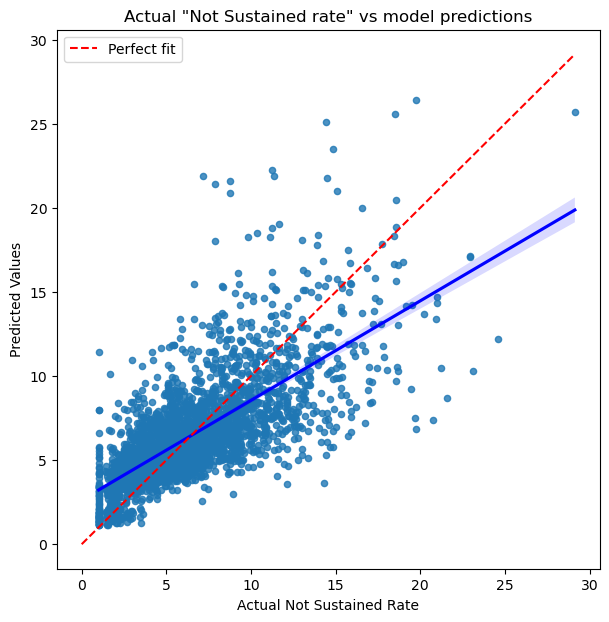

In [644]:
fig, ax = plt.subplots(figsize=(7,7))
sns.regplot(x=glm_data['not_sustained_rate'], 
            y=low_vif_glm.fittedvalues, 
            ax=ax, 
            scatter_kws={'s': 20}, 
            line_kws={'color': 'blue'}, 
            #ci=None
           )

plt.plot([0, glm_data['not_sustained_rate'].max()], 
         [0, glm_data['not_sustained_rate'].max()], 
         color='red', linestyle='--', label='Perfect fit')


plt.title('Actual "Not Sustained rate" vs model predictions')
plt.xlabel('Actual Not Sustained Rate')
plt.ylabel('Predicted Values')
plt.legend();

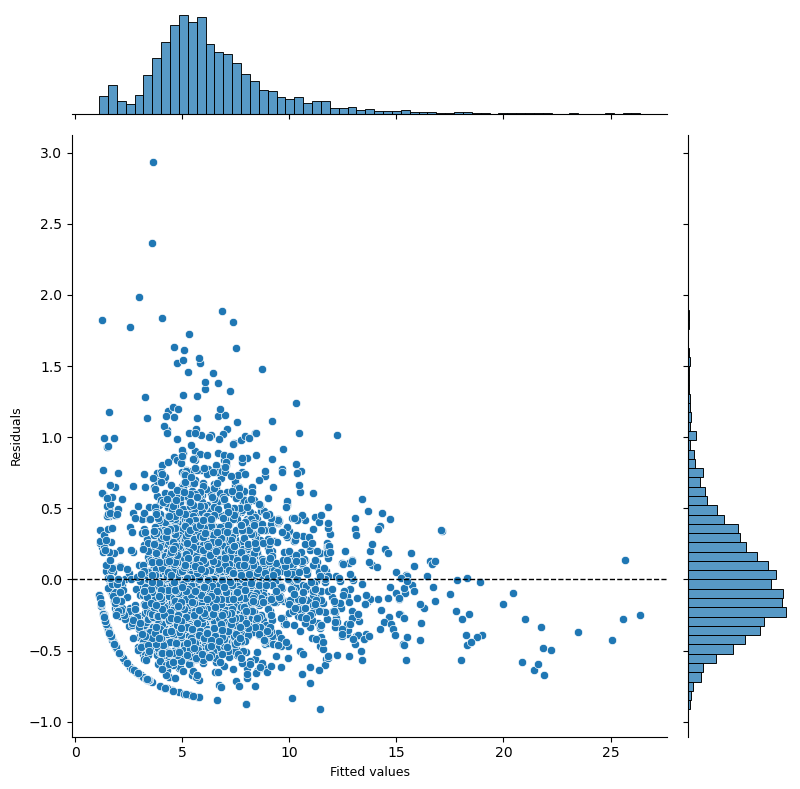

In [645]:
# create jointplot
g = sns.jointplot(x=low_vif_glm.fittedvalues, y=low_vif_glm.resid_pearson, kind='scatter', height=8)

# access the scatter plot part of the jointplot
ax = g.ax_joint

# add a horizontal line at y=0
ax.axhline(0, color='black', linestyle='--', linewidth=1)

g.set_axis_labels('Fitted values', 'Residuals', fontsize=9);

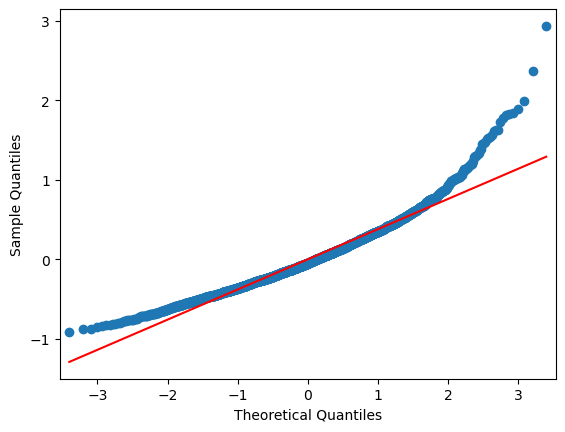

In [646]:
from statsmodels import graphics
graphics.gofplots.qqplot(residuals, line='r');

#### Coefficient Plot

In [719]:
reg_names = {
    'C(post16, Treatment(reference="Post-16"))[T.No Post-16]': 'No Post-16', 
    'C(faith_binary, Treatment(reference="No faith"))[T.Faith]': 'Faith', 
    'C(single_sex_binary, Treatment(reference="Mixed"))[T.Single-sex]': 'Single-sex', 
    'C(selective, Treatment(reference="Non-selective"))[T.Selective]': 'Selective',
    'C(urban_binary, Treatment(reference="Urban"))[T.Rural]': 'Rural', 
    'susp_rate': 'Suspension %', 
    'Ofsted_rating' : 'Ofsted rating',
    'FSM': 'FSM %', 
    'sen_support': 'SEN support %',
    'perc_boys' : 'Boys %',
    'White_British': 'White British %', 
    'IMD': 'IMD of LSOA',
    'Intercept' : 'Intercept'
}

In [720]:
# extract coefficients and confidence intervals
coef = low_vif_glm.params
conf = low_vif_glm.conf_int()

In [721]:
# df for plotting
coef_df = pd.DataFrame({
    'Coefficient': coef,
    'Lower CI': conf[0],
    'Upper CI': conf[1]
}).reset_index().rename(columns={'index': 'Predictor'})

In [722]:
# rename labels using dictionary
coef_df['Predictor'] = coef_df['Predictor'].map(reg_names)

In [723]:
coef_df

Predictor   Coefficient      Lower CI      Upper CI
0         Intercept  0.8723318335  0.7754329388  0.9692307281
1        No Post-16  0.1234253452  0.0925206486  0.1543300419
2             Faith -0.0959684533 -0.1334889042 -0.0584480024
3        Single-sex -0.2007106235 -0.2541514317 -0.1472698152
4         Selective -0.5443322170 -0.6203801940 -0.4682842400
5             Rural -0.0461129244 -0.0893616810 -0.0028641678
6      Suspension %  0.0023639476  0.0016947507  0.0030331446
7     Ofsted rating -0.0150467516 -0.0276567282 -0.0024367749
8             FSM %  0.0216066361  0.0198753814  0.0233378908
9     SEN support %  0.0071447133  0.0040324177  0.0102570090
10           Boys %  0.0012959568  0.0004316344  0.0021602792
11  White British %  0.0042956996  0.0036913578  0.0049000414
12      IMD of LSOA -0.0146446304 -0.0209549104 -0.0083343504

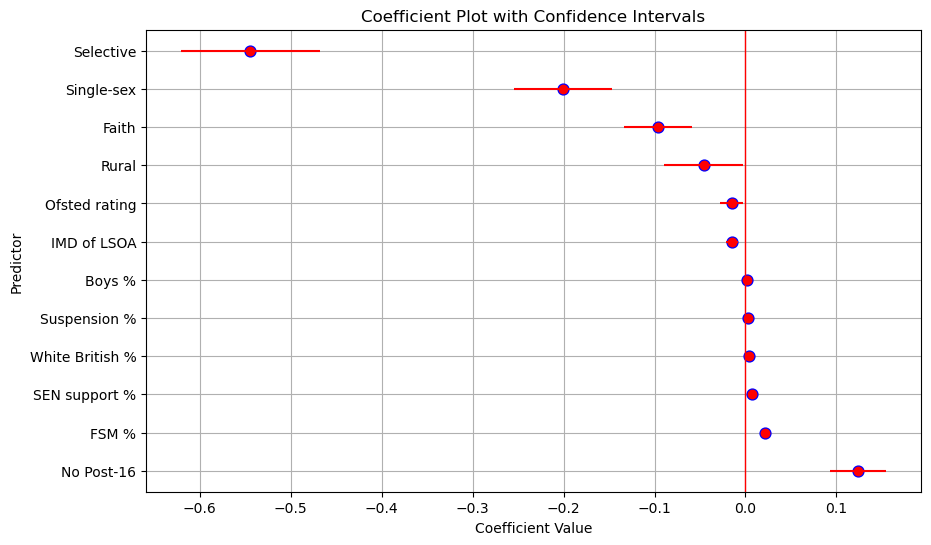

In [724]:
# drop intercept
coef_df = coef_df[coef_df['Predictor'] != 'Intercept']

# sort values
coef_df = coef_df.sort_values(by='Coefficient')


# plot
plt.figure(figsize=(10, 6))
sns.pointplot(x='Coefficient', y='Predictor', data=coef_df, linestyle='none', markers='o', color='blue')
plt.errorbar(coef_df['Coefficient'], coef_df['Predictor'], 
             xerr=[coef_df['Coefficient'] - coef_df['Lower CI'], coef_df['Upper CI'] - coef_df['Coefficient']], 
             fmt='o', color='red')

# add a vertical line at x=0
ax = plt.gca() # get current axis
ax.axvline(0, color='red', linestyle='-', linewidth=1)

plt.title('Coefficient Plot with Confidence Intervals')
plt.xlabel('Coefficient Value')
plt.ylabel('Predictor')
plt.grid(True)
plt.show()

# Model 3 - OLS (transformed variables)

## Data Transformation

In [653]:
from sklearn.preprocessing import PowerTransformer, OrdinalEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [654]:
# transformer to convert quadratic variables
# include bias=false as using linear regression which automatically includes an intercept
poly = Pipeline(steps=[
    ('encoder', PolynomialFeatures(include_bias=False))])

# transformer to convert categorical variables 
cat_transformer_onehot = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False, drop=None))])

# set order of values for ordinal variable
cat_transformer_ordinal = Pipeline(steps=[
    ('encoder', OrdinalEncoder(categories='auto'))])

# transformer to move towards normal distribution of numerical variables
num = Pipeline(steps=[
    ('encoder', PowerTransformer())])      

In [655]:
# classify columns for transformation
preprocessor  = ColumnTransformer(transformers = [
    ('cat_onehot', cat_transformer_onehot, 
     ['post16', 'faith_binary', 'single_sex_binary', 'urban_binary', 'selective'
     ]), 
    
    ('poly', poly, 
     ['KS2_history', 'Attainment_8', 'Progress_8', 'headcount'
     ]),
    
    ('cat_ordinal', cat_transformer_ordinal,
     ['Ofsted_rating', 'IMD'
     ]),
    
    ('num', num,
     ['pupil_teacher_ratio', 'assistant_teacher_ratio', 'susp_rate', 'FSM', 'sen_support', 'perc_boys', 'White_British', 'total_absence'
    ])
])

In [656]:
# transform the data
pipeline = Pipeline(steps=[("preprocessor", preprocessor)])
pipe_fit = pipeline.fit(data)

data_transformed = pd.DataFrame(
    pipe_fit.transform(data), 
    columns = pipe_fit.get_feature_names_out().tolist())

data_transformed.head()

/Users/gysd/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


cat_onehot__post16_0  cat_onehot__post16_1  cat_onehot__faith_binary_0  \
0                   0.0                   1.0                         1.0   
1                   0.0                   1.0                         1.0   
2                   0.0                   1.0                         1.0   
3                   0.0                   1.0                         1.0   
4                   0.0                   1.0                         1.0   

   cat_onehot__faith_binary_1  cat_onehot__single_sex_binary_0  \
0                         0.0                              1.0   
1                         0.0                              0.0   
2                         0.0                              1.0   
3                         0.0                              1.0   
4                         0.0                              1.0   

   cat_onehot__single_sex_binary_1  cat_onehot__urban_binary_0  \
0                              0.0                         0.0   
1                              1.0                         0.0   
2                              0.0                         0.0   
3                              0.0                         0.0   
4                              0.0                         0.0   

   cat_onehot__urban_binary_1  cat_onehot__selective_0  \
0                         1.0                      1.0   
1                         1.0                      1.0   
2                         1.0                      1.0   
3                         1.0                      1.0   
4                         1.0                      1.0   

   cat_onehot__selective_1  poly__KS2_history  poly__Attainment_8  \
0                      0.0              105.1                47.4   
1                      0.0              107.1                59.1   
2                      0.0              103.5                43.8   
3                      0.0              103.2                44.6   
4                      0.0              106.0                50.3   

   poly__Progress_8  poly__headcount  poly__KS2_history^2  \
0             -0.18           1171.0             11046.01   
1              0.61           1249.0             11470.41   
2             -0.06           1079.0             10712.25   
3             -0.04           1319.0             10650.24   
4             -0.17           1163.0             11236.00   

   poly__KS2_history Attainment_8  poly__KS2_history Progress_8  \
0                         4981.74                       -18.918   
1                         6329.61                        65.331   
2                         4533.30                        -6.210   
3                         4602.72                        -4.128   
4                         5331.80                       -18.020   

   poly__KS2_history headcount  poly__Attainment_8^2  \
0                     123072.1               2246.76   
1                     133767.9               3492.81   
2                     111676.5               1918.44   
3                     136120.8               1989.16   
4                     123278.0               2530.09   

   poly__Attainment_8 Progress_8  poly__Attainment_8 headcount  \
0                         -8.532                       55505.4   
1                         36.051                       73815.9   
2                         -2.628                       47260.2   
3                         -1.784                       58827.4   
4                         -8.551                       58498.9   

   poly__Progress_8^2  poly__Progress_8 headcount  poly__headcount^2  \
0              0.0324                     -210.78          1371241.0   
1              0.3721                      761.89          1560001.0   
2              0.0036                      -64.74          1164241.0   
3              0.0016                      -52.76          1739761.0   
4              0.0289                     -197.71          1352569.0   

   cat_ordinal__Ofsted_rating  cat_ordinal__I

In [657]:
y_transformer = PowerTransformer()
Not_Sustained_transformed = y_transformer.fit_transform(data[['not_sustained_rate']])
Not_Sustained_Overalldest_transformed = y_transformer.fit_transform(data[['not_sustained_rate_overalldest']])

In [658]:
Not_Sustained_transformed

array([[ 0.15070062],
       [-0.6138039 ],
       [ 0.23057934],
       ...,
       [-0.03013134],
       [-2.25155849],
       [ 1.15491314]])

In [659]:
Not_Sustained_Overalldest_transformed

array([[ 0.18355302],
       [-0.61493377],
       [ 0.26015904],
       ...,
       [-0.04274821],
       [-2.27498657],
       [ 1.11952251]])

In [660]:
data_transformed['Not_Sustained_transformed'] = Not_Sustained_transformed
data_transformed['Not_Sustained_overalldest_transformed'] = Not_Sustained_Overalldest_transformed

In [661]:
data_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2972 entries, 0 to 2971
Data columns (total 36 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   cat_onehot__post16_0                   2972 non-null   float64
 1   cat_onehot__post16_1                   2972 non-null   float64
 2   cat_onehot__faith_binary_0             2972 non-null   float64
 3   cat_onehot__faith_binary_1             2972 non-null   float64
 4   cat_onehot__single_sex_binary_0        2972 non-null   float64
 5   cat_onehot__single_sex_binary_1        2972 non-null   float64
 6   cat_onehot__urban_binary_0             2972 non-null   float64
 7   cat_onehot__urban_binary_1             2972 non-null   float64
 8   cat_onehot__selective_0                2972 non-null   float64
 9   cat_onehot__selective_1                2972 non-null   float64
 10  poly__KS2_history                      2972 non-null   float64
 11  poly

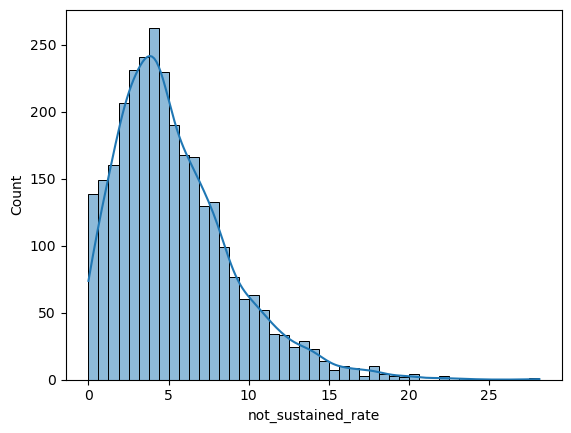

In [662]:
sns.histplot(data['not_sustained_rate'], kde=True );

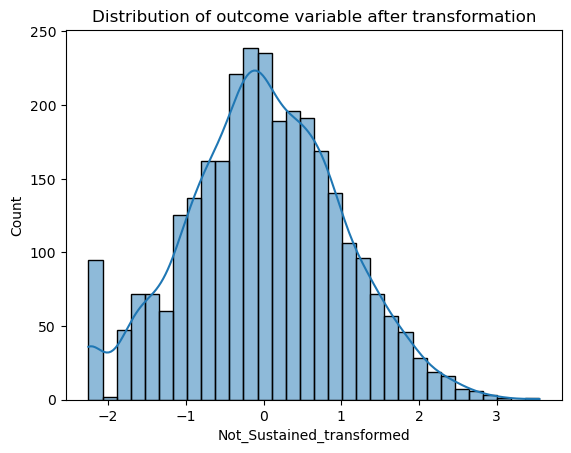

In [663]:
sns.histplot(data_transformed['Not_Sustained_transformed'], kde=True )
plt.title('Distribution of outcome variable after transformation');

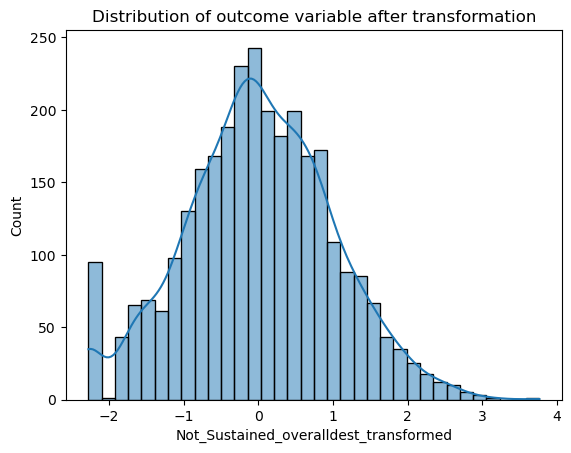

In [664]:
sns.histplot(data_transformed['Not_Sustained_overalldest_transformed'], kde=True )
plt.title('Distribution of outcome variable after transformation');

## Specify transformed variables

In [665]:
predictors = data_transformed[[
    'poly__headcount',
    'poly__headcount^2',
    'num__pupil_teacher_ratio',
    'num__assistant_teacher_ratio',
    'num__susp_rate',
    'poly__Progress_8',
    'poly__Progress_8^2',
    'cat_onehot__post16_0',
    'cat_onehot__faith_binary_1',
    'cat_onehot__single_sex_binary_1',
    'cat_ordinal__Ofsted_rating'
]]

In [666]:
predictors_controls = data_transformed[[
    'poly__headcount',
    'poly__headcount^2',
    'num__pupil_teacher_ratio',
    'num__assistant_teacher_ratio',
    'num__susp_rate',
    'poly__Progress_8',
    'poly__Progress_8^2',
    'cat_onehot__post16_0',
    'cat_onehot__faith_binary_1',
    'cat_onehot__single_sex_binary_1',
    'cat_ordinal__Ofsted_rating',

    # controls
    'num__FSM',
    'num__sen_support',
    'num__perc_boys',
    'num__White_British',
    'poly__Attainment_8',
    'poly__Attainment_8^2',
    'poly__KS2_history',
    'poly__KS2_history^2',
    'num__total_absence',
    'cat_ordinal__IMD',
    'cat_onehot__selective_1',
    'cat_onehot__urban_binary_0'
]]

## Predictors

In [667]:
x = sm.add_constant(predictors)

In [668]:
y = data_transformed['Not_Sustained_transformed']

In [669]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Not_Sustained_transformed   R-squared:                       0.454
Model:                                   OLS   Adj. R-squared:                  0.452
Method:                        Least Squares   F-statistic:                     224.2
Date:                       Fri, 28 Feb 2025   Prob (F-statistic):               0.00
Time:                               12:42:01   Log-Likelihood:                -3316.6
No. Observations:                       2972   AIC:                             6657.
Df Residuals:                           2960   BIC:                             6729.
Df Model:                                 11                                         
Covariance Type:                   nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.2373      0.099      2.396      0.017       0.043       0.431
poly__headcount                    -0.0002      0.000     -1.609      0.108      -0.001    5.36e-05
poly__headcount^2                2.458e-08   5.99e-08      0.411      0.681   -9.28e-08    1.42e-07
num__pupil_teacher_ratio           -0.0914      0.014     -6.594      0.000      -0.119      -0.064
num__assistant_teacher_ratio        0.0915      0.015      6.181      0.000       0.062       0.121
num__susp_rate                      0.2774      0.017     16.062      0.000       0.244       0.311
poly__Progress_8                   -0.5249      0.034    -15.336      0.000      -0.592      -0.458
poly__Progress_8^2                  0.0391      0.032      1.207      0.227      -0.024       0.103
cat_onehot__post16_0                0.2335      0.032      7.209      0.000       0.170       0.297
cat_onehot__faith_binary_1         -0.1474      0.036     -4.124      0.000      -0.217      -0.077
cat_onehot__single_sex_binary_1    -0.4535      0.049     -9.194      0.000      -0.550      -0.357
cat_ordinal__Ofsted_rating         -0.0245      0.013     -1.963      0.050      -0.049   -2.23e-05
==============================================================================
Omnibus:                       36.225   Durbin-Watson:                   1.733
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.646
Skew:                          -0.043   Prob(JB):                     4.11e-14
Kurtosis:                       3.700   Cond. No.                     1.25e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Predictors - overall dest

In [667]:
x = sm.add_constant(predictors)

In [670]:
y = data_transformed['Not_Sustained_overalldest_transformed']

In [671]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      OLS Regression Results                                     
=================================================================================================
Dep. Variable:     Not_Sustained_overalldest_transformed   R-squared:                       0.454
Model:                                               OLS   Adj. R-squared:                  0.452
Method:                                    Least Squares   F-statistic:                     223.7
Date:                                   Fri, 28 Feb 2025   Prob (F-statistic):               0.00
Time:                                           12:42:45   Log-Likelihood:                -3318.1
No. Observations:                                   2972   AIC:                             6660.
Df Residuals:                                       2960   BIC:                             6732.
Df Model:                                             11                                         
Covariance Type:                               nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.2394      0.099      2.416      0.016       0.045       0.434
poly__headcount                    -0.0002      0.000     -1.622      0.105      -0.001    5.17e-05
poly__headcount^2                2.543e-08   5.99e-08      0.424      0.671    -9.2e-08    1.43e-07
num__pupil_teacher_ratio           -0.0921      0.014     -6.641      0.000      -0.119      -0.065
num__assistant_teacher_ratio        0.0915      0.015      6.180      0.000       0.062       0.121
num__susp_rate                      0.2782      0.017     16.094      0.000       0.244       0.312
poly__Progress_8                   -0.5238      0.034    -15.295      0.000      -0.591      -0.457
poly__Progress_8^2                  0.0424      0.032      1.308      0.191      -0.021       0.106
cat_onehot__post16_0                0.2302      0.032      7.105      0.000       0.167       0.294
cat_onehot__faith_binary_1         -0.1483      0.036     -4.146      0.000      -0.218      -0.078
cat_onehot__single_sex_binary_1    -0.4541      0.049     -9.202      0.000      -0.551      -0.357
cat_ordinal__Ofsted_rating         -0.0252      0.013     -2.011      0.044      -0.050      -0.001
==============================================================================
Omnibus:                       41.270   Durbin-Watson:                   1.729
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.996
Skew:                          -0.035   Prob(JB):                     8.55e-17
Kurtosis:                       3.770   Cond. No.                     1.25e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Predictors and controls

In [672]:
x = sm.add_constant(predictors_controls)

In [673]:
y = data_transformed['Not_Sustained_transformed']

In [674]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Not_Sustained_transformed   R-squared:                       0.611
Model:                                   OLS   Adj. R-squared:                  0.608
Method:                        Least Squares   F-statistic:                     201.5
Date:                       Fri, 28 Feb 2025   Prob (F-statistic):               0.00
Time:                               12:43:23   Log-Likelihood:                -2813.3
No. Observations:                       2972   AIC:                             5675.
Df Residuals:                           2948   BIC:                             5819.
Df Model:                                 23                                         
Covariance Type:                   nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              34.0374     21.387      1.592      0.112      -7.897      75.972
poly__headcount                 -3.328e-05      0.000     -0.249      0.803      -0.000       0.000
poly__headcount^2                1.054e-08   5.16e-08      0.204      0.838   -9.06e-08    1.12e-07
num__pupil_teacher_ratio           -0.0038      0.012     -0.310      0.756      -0.028       0.020
num__assistant_teacher_ratio       -0.0053      0.013     -0.408      0.683      -0.031       0.020
num__susp_rate                      0.0541      0.017      3.159      0.002       0.021       0.088
poly__Progress_8                   -0.4626      0.175     -2.642      0.008      -0.806      -0.119
poly__Progress_8^2                 -0.0619      0.038     -1.638      0.101      -0.136       0.012
cat_onehot__post16_0                0.2089      0.028      7.493      0.000       0.154       0.264
cat_onehot__faith_binary_1         -0.1115      0.032     -3.517      0.000      -0.174      -0.049
cat_onehot__single_sex_binary_1    -0.2623      0.045     -5.801      0.000      -0.351      -0.174
cat_ordinal__Ofsted_rating         -0.0139      0.011     -1.297      0.195      -0.035       0.007
num__FSM                            0.3514      0.023     15.213      0.000       0.306       0.397
num__sen_support                    0.0284      0.015      1.935      0.053      -0.000       0.057
num__perc_boys                      0.0317      0.012      2.657      0.008       0.008       0.055
num__White_British                  0.1683      0.016     10.303      0.000       0.136       0.200
poly__Attainment_8                 -0.0303      0.027     -1.108      0.268      -0.084       0.023
poly__Attainment_8^2                0.0007      0.000      2.874      0.004       0.000       0.001
poly__KS2_history                  -0.4983      0.424     -1.175      0.240      -1.330       0.333
poly__KS2_history^2                 0.0017      0.002      0.792      0.428      -0.002       0.006
num__total_absence                  0.0534      0.021      2.569      0.010       0.013       0.094
cat_ordinal__IMD                   -0.0188      0.005     -3.583      0.000      -0.029      -0.009
cat_onehot__selective_1            -0.3448      0.117     -2.936      0.003      -0.575      -0.115
cat_onehot__urban_binary_0         -0.1611      0.037     -4.322      0.000      -0.234      -0.088
==============================================================================
Omnibus:                       74.641   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.397
Skew:                          -0.161   Prob(JB):                    

## Predictors and controls - overall dest

In [675]:
x = sm.add_constant(predictors_controls)

In [676]:
y = data_transformed['Not_Sustained_overalldest_transformed']

In [677]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      OLS Regression Results                                     
=================================================================================================
Dep. Variable:     Not_Sustained_overalldest_transformed   R-squared:                       0.612
Model:                                               OLS   Adj. R-squared:                  0.609
Method:                                    Least Squares   F-statistic:                     202.2
Date:                                   Fri, 28 Feb 2025   Prob (F-statistic):               0.00
Time:                                           12:43:28   Log-Likelihood:                -2810.3
No. Observations:                                   2972   AIC:                             5669.
Df Residuals:                                       2948   BIC:                             5812.
Df Model:                                             23                                         
Covariance Type:                               nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              36.1386     21.365      1.691      0.091      -5.753      78.030
poly__headcount                  -3.23e-05      0.000     -0.242      0.809      -0.000       0.000
poly__headcount^2                9.883e-09   5.15e-08      0.192      0.848   -9.11e-08    1.11e-07
num__pupil_teacher_ratio           -0.0037      0.012     -0.301      0.763      -0.028       0.020
num__assistant_teacher_ratio       -0.0058      0.013     -0.447      0.655      -0.031       0.020
num__susp_rate                      0.0542      0.017      3.167      0.002       0.021       0.088
poly__Progress_8                   -0.4922      0.175     -2.814      0.005      -0.835      -0.149
poly__Progress_8^2                 -0.0575      0.038     -1.522      0.128      -0.132       0.017
cat_onehot__post16_0                0.2066      0.028      7.418      0.000       0.152       0.261
cat_onehot__faith_binary_1         -0.1136      0.032     -3.587      0.000      -0.176      -0.052
cat_onehot__single_sex_binary_1    -0.2617      0.045     -5.793      0.000      -0.350      -0.173
cat_ordinal__Ofsted_rating         -0.0142      0.011     -1.327      0.185      -0.035       0.007
num__FSM                            0.3472      0.023     15.050      0.000       0.302       0.392
num__sen_support                    0.0290      0.015      1.972      0.049       0.000       0.058
num__perc_boys                      0.0311      0.012      2.612      0.009       0.008       0.055
num__White_British                  0.1612      0.016      9.880      0.000       0.129       0.193
poly__Attainment_8                 -0.0257      0.027     -0.940      0.347      -0.079       0.028
poly__Attainment_8^2                0.0006      0.000      2.789      0.005       0.000       0.001
poly__KS2_history                  -0.5354      0.423     -1.264      0.206      -1.366       0.295
poly__KS2_history^2                 0.0018      0.002      0.863      0.388      -0.002       0.006
num__total_absence                  0.0548      0.021      2.643      0.008       0.014       0.096
cat_ordinal__IMD                   -0.0189      0.005     -3.592      0.000      -0.029      -0.009
cat_onehot__selective_1            -0.3555      0.117     -3.031      0.002      -0.585      -0.125
cat_onehot__urban_binary_0         -0.1597      0.037     -4.288      0.000      -0.233      -0.087
==============================================================================
Omnibus:                       80.854   Durbin-Watson:                   1.864
Prob(Omnibus):  

In [681]:
vif_values = pd.DataFrame()
vif_values['predictor'] = x.columns

vif_values['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

vif_values = vif_values.sort_values(by='VIF')
vif_values

predictor                VIF
14                   num__perc_boys       1.0800546718
11       cat_ordinal__Ofsted_rating       1.1019562238
3          num__pupil_teacher_ratio       1.1235650438
9        cat_onehot__faith_binary_1       1.1451874073
23       cat_onehot__urban_binary_0       1.2884982666
4      num__assistant_teacher_ratio       1.2910865821
8              cat_onehot__post16_0       1.3804894619
10  cat_onehot__single_sex_binary_1       1.5585727636
13                 num__sen_support       1.6368726116
21                 cat_ordinal__IMD       1.6628812704
15               num__White_British       2.0219011587
7                poly__Progress_8^2       2.1165627129
5                    num__susp_rate       2.2221201822
20               num__total_absence       3.2720041211
12                         num__FSM       4.0444600090
22          cat_onehot__selective_1       5.2934801470
2                 poly__headcount^2      18.6485587997
1                   poly__headcount      20.1259848854
6                  poly__Progress_8      59.4166469550
17             poly__Attainment_8^2     380.2679811375
16               poly__Attainment_8     485.3521260138
18                poly__KS2_history   10266.6803037488
19              poly__KS2_history^2   11275.6264795683
0                             const 3468003.1459128805

## Predictors and controls - drop high VIF

In [697]:
predictors_controls_low_vif = predictors_controls.drop(columns=['poly__KS2_history^2', 'poly__KS2_history', 
                                                               'poly__Attainment_8^2', 'poly__Attainment_8',
                                                               'poly__headcount', 'poly__headcount^2']).copy()

In [734]:
x = sm.add_constant(predictors_controls_low_vif)

In [735]:
y = data_transformed['Not_Sustained_overalldest_transformed']

In [736]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      OLS Regression Results                                     
=================================================================================================
Dep. Variable:     Not_Sustained_overalldest_transformed   R-squared:                       0.591
Model:                                               OLS   Adj. R-squared:                  0.589
Method:                                    Least Squares   F-statistic:                     251.2
Date:                                   Fri, 28 Feb 2025   Prob (F-statistic):               0.00
Time:                                           13:52:14   Log-Likelihood:                -2888.1
No. Observations:                                   2972   AIC:                             5812.
Df Residuals:                                       2954   BIC:                             5920.
Df Model:                                             17                                         
Covariance Type:                               nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.1066      0.034      3.125      0.002       0.040       0.173
num__pupil_teacher_ratio           -0.0048      0.012     -0.391      0.696      -0.029       0.019
num__assistant_teacher_ratio        0.0149      0.013      1.131      0.258      -0.011       0.041
num__susp_rate                      0.0741      0.017      4.252      0.000       0.040       0.108
poly__Progress_8                   -0.1075      0.036     -2.968      0.003      -0.178      -0.036
poly__Progress_8^2                  0.0324      0.028      1.146      0.252      -0.023       0.088
cat_onehot__post16_0                0.2121      0.027      7.989      0.000       0.160       0.264
cat_onehot__faith_binary_1         -0.1252      0.032     -3.910      0.000      -0.188      -0.062
cat_onehot__single_sex_binary_1    -0.3096      0.045     -6.861      0.000      -0.398      -0.221
cat_ordinal__Ofsted_rating         -0.0148      0.011     -1.362      0.173      -0.036       0.006
num__FSM                            0.4196      0.022     18.906      0.000       0.376       0.463
num__sen_support                    0.0540      0.015      3.654      0.000       0.025       0.083
num__perc_boys                      0.0378      0.012      3.097      0.002       0.014       0.062
num__White_British                  0.1416      0.016      8.644      0.000       0.109       0.174
num__total_absence                  0.1084      0.021      5.245      0.000       0.068       0.149
cat_ordinal__IMD                   -0.0201      0.005     -3.745      0.000      -0.031      -0.010
cat_onehot__selective_1            -0.2588      0.068     -3.783      0.000      -0.393      -0.125
cat_onehot__urban_binary_0         -0.1294      0.037     -3.539      0.000      -0.201      -0.058
==============================================================================
Omnibus:                       71.078   Durbin-Watson:                   1.815
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.678
Skew:                          -0.087   Prob(JB):                     4.26e-34
Kurtosis:                       4.100   Cond. No.                         34.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [737]:
vif_values = pd.DataFrame()
vif_values['predictor'] = x.columns

vif_values['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

vif_values = vif_values.sort_values(by='VIF')
vif_values

predictor          VIF
12                   num__perc_boys 1.0742329921
9        cat_ordinal__Ofsted_rating 1.0761600863
1          num__pupil_teacher_ratio 1.0969987685
7        cat_onehot__faith_binary_1 1.1119117243
5                poly__Progress_8^2 1.1274616243
17       cat_onehot__urban_binary_0 1.1815060130
6              cat_onehot__post16_0 1.1925995114
2      num__assistant_teacher_ratio 1.2581476987
8   cat_onehot__single_sex_binary_1 1.4791818082
11                 num__sen_support 1.5808045940
15                 cat_ordinal__IMD 1.6457443916
16          cat_onehot__selective_1 1.7118860157
13               num__White_British 1.9381800847
3                    num__susp_rate 2.1963863013
4                  poly__Progress_8 2.4202718537
14               num__total_absence 3.0853316747
10                         num__FSM 3.5587755442
0                             const 8.3981695372

## Visualisations

### Residuals

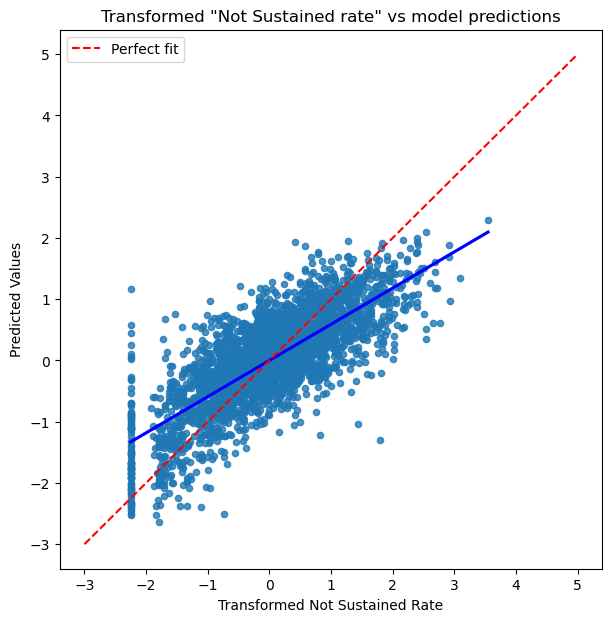

In [710]:
fig, ax = plt.subplots(figsize=(7,7))
sns.regplot(x=data_transformed['Not_Sustained_transformed'], 
            y=model.fittedvalues, 
            ax=ax, 
            scatter_kws={'s': 20}, 
            line_kws={'color': 'blue'}, 
            ci=None
           )

plt.plot([-3, 5], 
         [-3, 5], 
         color='red', linestyle='--', label='Perfect fit')


plt.title('Transformed "Not Sustained rate" vs model predictions')
plt.xlabel('Transformed Not Sustained Rate')
plt.ylabel('Predicted Values')
plt.legend();

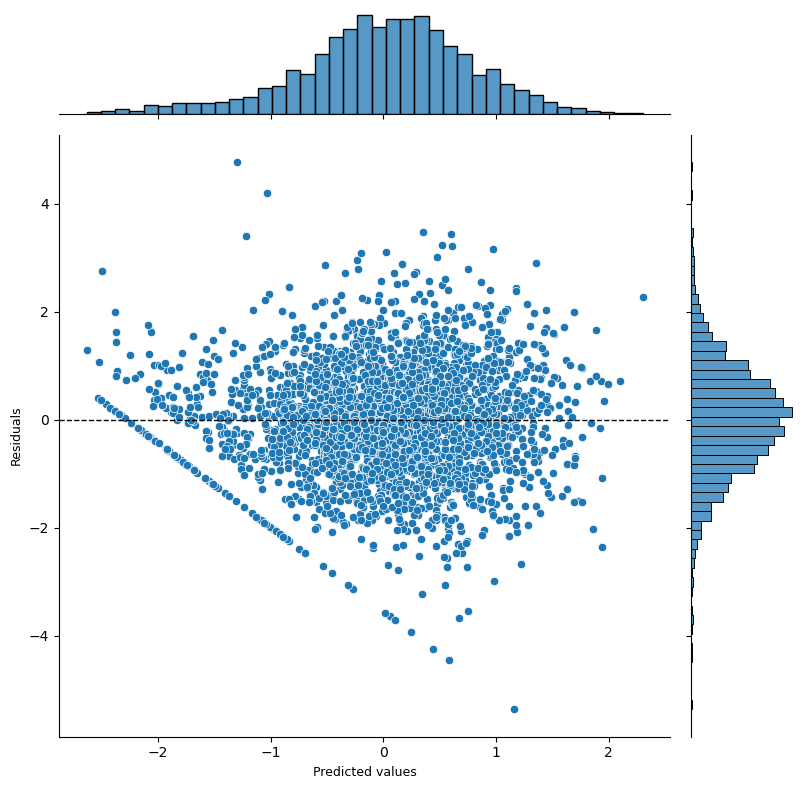

In [711]:
# create jointplot
g = sns.jointplot(x=model.fittedvalues, y=model.resid_pearson, kind='scatter', height=8)

# access the scatter plot part of the jointplot
ax = g.ax_joint

# add a horizontal line at y=0
ax.axhline(0, color='black', linestyle='--', linewidth=1)

g.set_axis_labels('Predicted values', 'Residuals', fontsize=9);

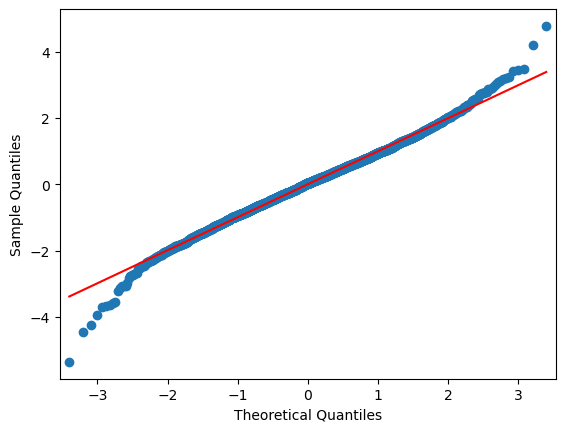

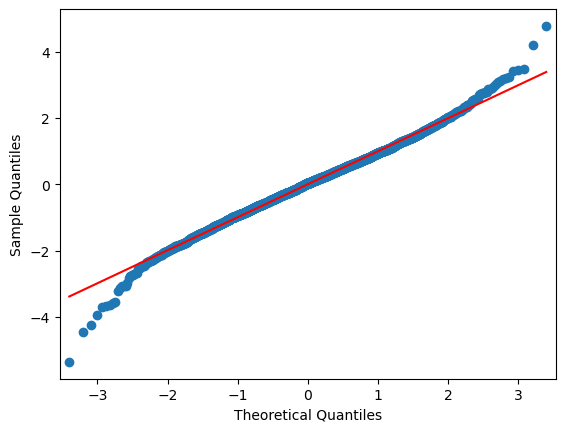

In [716]:
qqplot(model.resid_pearson, line='r')

### Correlation matrix

In [703]:
vars = x.columns.tolist()
vars = vars[1:]
vars

['num__pupil_teacher_ratio',
 'num__assistant_teacher_ratio',
 'num__susp_rate',
 'poly__Progress_8',
 'poly__Progress_8^2',
 'cat_onehot__post16_0',
 'cat_onehot__faith_binary_1',
 'cat_onehot__single_sex_binary_1',
 'cat_ordinal__Ofsted_rating',
 'num__FSM',
 'num__sen_support',
 'num__perc_boys',
 'num__White_British',
 'num__total_absence',
 'cat_ordinal__IMD',
 'cat_onehot__selective_1',
 'cat_onehot__urban_binary_0']

In [705]:
vars_for_corr = data_transformed[vars]

In [706]:
# save variables for correlation matrix
corr = vars_for_corr.corr(method='kendall')

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
np.fill_diagonal(mask, False)

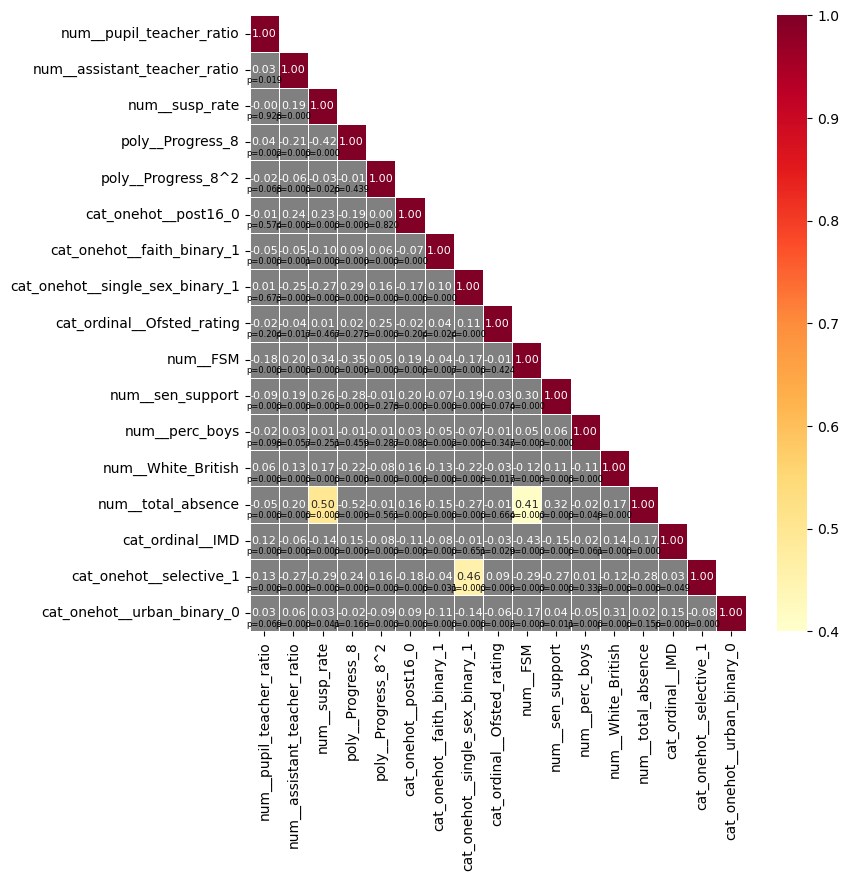

In [707]:
# set colour map for pos 
my_cmap = copy(plt.cm.YlOrRd)
my_cmap.set_over("grey")
my_cmap.set_under("grey")

# positive correlations
f, ax = plt.subplots(figsize=(8,8)) 

g = sns.heatmap(corr,
    vmin=0.4,
    vmax=1,
    cmap=my_cmap,
    linewidths=0.5,
    #linecolor="grey",
    annot = True,
    annot_kws={"fontsize": 8},
    fmt = '.2f',
    ax=ax,
    mask=mask)

# calculate p-values
p_values = np.full((corr.shape[0], corr.shape[1]), np.nan)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[1]):
        x = vars_for_corr.iloc[:, i]
        y = vars_for_corr.iloc[:, j]
        p_values[i, j] = kendalltau(x, y)[1]

p_values = pd.DataFrame(p_values, columns=corr.columns, index=corr.index)

max_corr = np.max(corr.max())
min_corr = np.min(corr.min())

for i in range (p_values.shape[0]):
    for j in range(p_values.shape[1]):
        p_value = p_values.iloc[i, j]
        if not np.isnan(p_value):
            correlation_value = corr.iloc[i, j]
            text_color = 'black' if p_value >= 0.001 else 'black'
            ax.text(i+0.5, j+0.8, f'p={p_value:.3f}',
                    horizontalalignment = 'center',
                    verticalalignment = 'center',
                    fontsize = 6,
                    color = text_color)


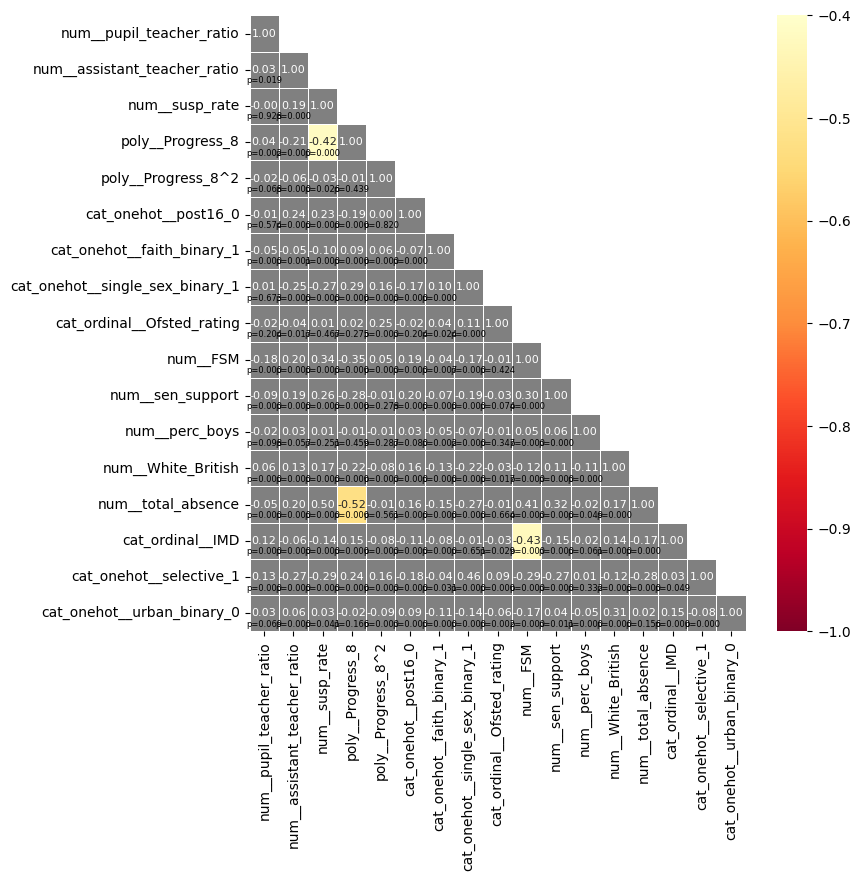

In [709]:
# set colour map for neg 
my_cmap_r = copy(plt.cm.YlOrRd_r)
my_cmap_r.set_over("grey")
my_cmap_r.set_under("grey")

# negative correlations
f, ax = plt.subplots(figsize=(8,8)) 

g = sns.heatmap(corr,
    vmin=-1,
    vmax=-0.4,
    cmap=my_cmap_r,
    linewidths=0.5,
    #linecolor="grey",
    annot = True,
    annot_kws={"fontsize": 8},
    fmt = '.2f',
    ax=ax,
    mask=mask)

# calculate p-values
p_values = np.full((corr.shape[0], corr.shape[1]), np.nan)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[1]):
        x = vars_for_corr.iloc[:, i]
        y = vars_for_corr.iloc[:, j]
        p_values[i, j] = kendalltau(x, y)[1]

p_values = pd.DataFrame(p_values, columns=corr.columns, index=corr.index)

max_corr = np.max(corr.max())
min_corr = np.min(corr.min())

for i in range (p_values.shape[0]):
    for j in range(p_values.shape[1]):
        p_value = p_values.iloc[i, j]
        if not np.isnan(p_value):
            correlation_value = corr.iloc[i, j]
            text_color = 'black' if p_value >= 0.001 else 'black'
            ax.text(i+0.5, j+0.8, f'p={p_value:.3f}',
                    horizontalalignment = 'center',
                    verticalalignment = 'center',
                    fontsize = 6,
                    color = text_color)

### Coefficient Plot

In [730]:
# extract coefficients and confidence intervals
coef = model.params
conf = model.conf_int()
sig = model.pvalues

# df for plotting
coef_df = pd.DataFrame({
    'Coefficient': coef,
    'Lower CI': conf[0],
    'Upper CI': conf[1],
    'p-value': sig
}).reset_index().rename(columns={'index': 'Predictor'})

coef_df = coef_df[coef_df['Predictor'] != 'const']

# sort values
coef_df = coef_df.sort_values(by='Coefficient')

# rename labels using dictionary
#coef_df['Predictor'] = coef_df['Predictor'].map(reg_names)
coef_df

Predictor   Coefficient      Lower CI      Upper CI  \
8   cat_onehot__single_sex_binary_1 -0.3096090719 -0.3980952063 -0.2211229374   
16          cat_onehot__selective_1 -0.2588161285 -0.3929454411 -0.1246868160   
17       cat_onehot__urban_binary_0 -0.1294021331 -0.2010998015 -0.0577044647   
7        cat_onehot__faith_binary_1 -0.1251568784 -0.1879273404 -0.0623864164   
4                  poly__Progress_8 -0.1074649556 -0.1784575536 -0.0364723576   
15                 cat_ordinal__IMD -0.0200503262 -0.0305492085 -0.0095514439   
9        cat_ordinal__Ofsted_rating -0.0147768054 -0.0360442396  0.0064906289   
1          num__pupil_teacher_ratio -0.0048199519 -0.0289814562  0.0193415524   
2      num__assistant_teacher_ratio  0.0149246659 -0.0109507127  0.0408000446   
5                poly__Progress_8^2  0.0324103328 -0.0230189214  0.0878395871   
12                   num__perc_boys  0.0377665496  0.0138570689  0.0616760302   
11                 num__sen_support  0.0540454152  0.0250412751  0.0830495553   
3                    num__susp_rate  0.0741394876  0.0399513642  0.1083276110   
14               num__total_absence  0.1083967648  0.0678765416  0.1489169880   
13               num__White_British  0.1415868027  0.1094710605  0.1737025449   
6              cat_onehot__post16_0  0.2121207129  0.1600602347  0.2641811911   
10                         num__FSM  0.4196030167  0.3760847892  0.4631212443   

        p-value  
8  0.0000000000  
16 0.0001577072  
17 0.0004080663  
7  0.0000945513  
4  0.0030204515  
15 0.0001841354  
9  0.1731885166  
1  0.6957135952  
2  0.2581673179  
5  0.2516850394  
12 0.0019722111  
11 0.0002630513  
3  0.0000218373  
14 0.0000001670  
13 0.0000000000  
6  0.0000000000  
10 0.0000000000

In [731]:
coef_df_sig = coef_df.loc[coef_df['p-value'] <0.05].copy()
coef_df_sig

Predictor   Coefficient      Lower CI      Upper CI  \
8   cat_onehot__single_sex_binary_1 -0.3096090719 -0.3980952063 -0.2211229374   
16          cat_onehot__selective_1 -0.2588161285 -0.3929454411 -0.1246868160   
17       cat_onehot__urban_binary_0 -0.1294021331 -0.2010998015 -0.0577044647   
7        cat_onehot__faith_binary_1 -0.1251568784 -0.1879273404 -0.0623864164   
4                  poly__Progress_8 -0.1074649556 -0.1784575536 -0.0364723576   
15                 cat_ordinal__IMD -0.0200503262 -0.0305492085 -0.0095514439   
12                   num__perc_boys  0.0377665496  0.0138570689  0.0616760302   
11                 num__sen_support  0.0540454152  0.0250412751  0.0830495553   
3                    num__susp_rate  0.0741394876  0.0399513642  0.1083276110   
14               num__total_absence  0.1083967648  0.0678765416  0.1489169880   
13               num__White_British  0.1415868027  0.1094710605  0.1737025449   
6              cat_onehot__post16_0  0.2121207129  0.1600602347  0.2641811911   
10                         num__FSM  0.4196030167  0.3760847892  0.4631212443   

        p-value  
8  0.0000000000  
16 0.0001577072  
17 0.0004080663  
7  0.0000945513  
4  0.0030204515  
15 0.0001841354  
12 0.0019722111  
11 0.0002630513  
3  0.0000218373  
14 0.0000001670  
13 0.0000000000  
6  0.0000000000  
10 0.0000000000

In [732]:
reg_names = {
    'cat_onehot__single_sex_binary_1': 'Single-sex',
    'cat_onehot__selective_1' : 'Selective',
    'cat_onehot__urban_binary_0' : 'Rural',
    'cat_onehot__faith_binary_1' : 'Faith',
    'poly__Progress_8' : 'Progress 8',
    'cat_ordinal__IMD' : 'IMD of LSOA',
    'num__perc_boys' : 'Boys %',
    'num__sen_support' : 'SEN support %',
    'num__susp_rate' : 'Suspensions %',
    'num__total_absence' : 'Absence %',
    'num__White_British' : 'White British %',
    'cat_onehot__post16_0' : 'No Post-16',
    'num__FSM' : 'FSM %'  
}

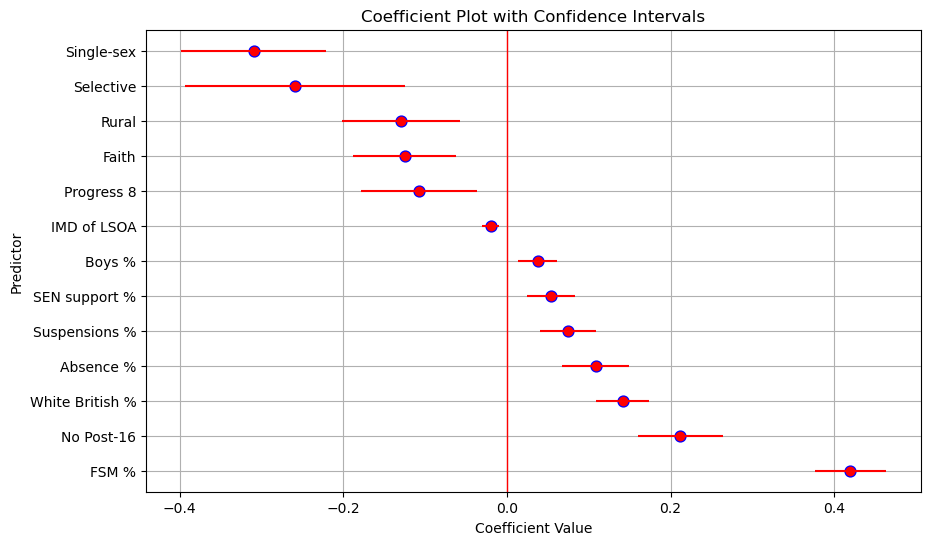

In [733]:
# rename labels using dictionary
coef_df_sig['Predictor'] = coef_df_sig['Predictor'].map(reg_names)

# plot
plt.figure(figsize=(10, 6))
sns.pointplot(x='Coefficient', y='Predictor', data=coef_df_sig, linestyle='none', markers='o', color='blue')
plt.errorbar(coef_df_sig['Coefficient'], coef_df_sig['Predictor'], 
             xerr=[coef_df_sig['Coefficient'] - coef_df_sig['Lower CI'], coef_df_sig['Upper CI'] - coef_df_sig['Coefficient']], 
             fmt='o', color='red')

# add a vertical line at x=0
ax = plt.gca() # get current axis
ax.axvline(0, color='red', linestyle='-', linewidth=1)

plt.title('Coefficient Plot with Confidence Intervals')
plt.xlabel('Coefficient Value')
plt.ylabel('Predictor')
plt.grid(True)
plt.show()

# Add predictions and residuals to dataframe

In [738]:
data['predictions'] = model.fittedvalues

In [739]:
data['residuals'] = model.resid_pearson

Residuals: positive values indicate true value is higher than the model predicts. Negative values that the true value is lower. 

In [740]:
data.describe()

URN  not_sustained_rate  not_sustained_rate_overalldest  \
count   2972.0000000000     2972.0000000000                 2972.0000000000   
mean  133863.2035666218        5.3547646125                    5.9076839230   
std    12011.5370350654        3.6705079204                    4.4225012985   
min   100050.0000000000        0.0000000000                    0.0000000000   
25%   135760.7500000000        2.7201641526                    2.8248587571   
50%   137338.5000000000        4.5918367347                    4.8514268903   
75%   140412.7500000000        7.2727272727                    7.9268292683   
max   148866.0000000000       28.1250000000                   40.5405405405   

        total_absence  persistent_absence             FSM   White_British  \
count 2972.0000000000     2972.0000000000 2972.0000000000 2972.0000000000   
mean     9.0967698520       26.7509757739   24.4824697174   63.8861372813   
std      2.4376968365        8.5911707663   12.9307337906   28.9618518391   
min      3.1000000000        2.8000000000    1.3000000000    0.0000000000   
25%      7.5000000000       21.2000000000   14.7000000000   44.4000000000   
50%      8.9000000000       26.6000000000   22.5000000000   75.3000000000   
75%     10.4000000000       32.1000000000   32.7250000000   87.3000000000   
max     32.6000000000       97.8000000000   75.4000000000   99.3000000000   

                  EAL       perc_boys       headcount  perm_excl_rate  \
count 2972.0000000000 2972.0000000000 2972.0000000000 2972.0000000000   
mean    17.6627860027   50.3482927904 1115.0750336474    0.2437471299   
std     18.4022244873   16.6376249714  385.4194252739    0.3268980765   
min      0.0000000000    0.0000000000   81.0000000000    0.0000000000   
25%      4.5000000000   49.1788376656  847.0000000000    0.0000000000   
50%     10.1000000000   50.9777193595 1082.0000000000    0.1340050000   
75%     24.9000000000   53.0446718379 1359.0000000000    0.3452525000   
max     92.7000000000  100.0000000000 2990.0000000000    3.0249100000   

            susp_rate  one_plus_susp_rate   KS4_headcount     KS2_history  \
count 2972.0000000000     2972.0000000000 2972.0000000000 2972.0000000000   
mean    20.2864411036        7.5793531124  185.1305518170  104.4372476447   
std     24.4496834730        5.2565254210   61.6062658438    2.7454099686   
min      0.0000000000        0.0000000000   17.0000000000   92.1000000000   
25%      6.6193975000        3.9177650000  145.0000000000  102.8000000000   
50%     13.0963900000        6.5085400000  180.0000000000  104.2000000000   
75%     24.5443800000        9.9021575000  224.2500000000  105.5000000000   
max    358.0645200000       37.3665500000  451.0000000000  117.4000000000   

         Attainment_8      Progress_8       selective   KS4_pass_rate  \
count 2972.0000000000 2972.0000000000 2972.0000000000 2972.0000000000   
mean    47.2611372813   -0.0014131898    0.0534993271   24.6901076716   
std      9.2612979455    0.5056068882    0.2250648637   18.6759608685   
min     18.8000000000   -3.3800000000    0.0000000000    0.0000000000   
25%     41.3000000000   -0.3300000000    0.0000000000   11.0000000000   
50%     46.1000000000   -0.0100000000    0.0000000000   20.0000000000   
75%     51.5000000000    0.3300000000    0.0000000000   33.0000000000   
max     87.6000000000    2.3700000000    1.0000000000  100.0000000000   

               post16   Ofsted_rating     sen_support            ehcp  \
count 2972.0000000000 2972.0000000000 2972.0000000000 2972.0000000000   
mean     0.6258411844    0.7042395693   12.8667621011    2.5298752690   
std      0.4839863767    1.1254269666    5.4930806739    1.6801851378   
min      0.0000000000    0.0000000000    0.4032258065    0.0000000000   
25%      0.0000000000    0.0000000000    9.2270845811    1.4270361433   
50%      1.0000000000    0.0000000000   12.6086970122    2.2380324211   
75%      1.0000000000    2.0000000000   16.0399342326    3.2279575594   
max      1.000000000

In [741]:
data.head()

URN  not_sustained_rate  not_sustained_rate_overalldest  total_absence  \
1  137181        5.1724137931                    5.6603773585  11.1000000000   
3  100050        2.8248587571                    2.9069767442   7.9000000000   
4  100051        5.4644808743                    5.9880239521  11.4000000000   
5  100052        1.9323671498                    1.9801980198   8.2000000000   
6  100053        4.4692737430                    4.7058823529   8.1000000000   

   persistent_absence              urban_rural denomination           FSM  \
1       38.1000000000  Urban major conurbation     No faith 41.2000000000   
3       24.8000000000  Urban major conurbation     No faith 35.6000000000   
4       42.9000000000  Urban major conurbation     No faith 61.8000000000   
5       24.0000000000  Urban major conurbation     No faith 41.8000000000   
6       24.7000000000  Urban major conurbation     No faith 34.3000000000   

   White_British           EAL     perc_boys   region_name  \
1  10.8000000000 51.7000000000 56.8744662681  Inner London   
3  38.8000000000 34.1000000000  4.9639711769  Inner London   
4   3.9000000000 67.3000000000 56.1631139944  Inner London   
5  11.4000000000 38.1000000000 51.6300227445  Inner London   
6  46.3000000000 23.6000000000 65.7781599312  Inner London   

              school_name       headcount  perm_excl_rate     susp_rate  \
1         The UCL Academy 1171.0000000000    0.3415900000 14.5175100000   
3  Parliament Hill School 1249.0000000000    0.0800600000  9.1273000000   
4      Regent High School 1079.0000000000    0.0926800000  5.3753500000   
5        Hampstead School 1319.0000000000    0.0758200000  3.2600500000   
6  Acland Burghley School 1163.0000000000    0.1719700000  8.2545100000   

   one_plus_susp_rate  KS4_headcount    KS2_history  Attainment_8  \
1        8.4543100000            168 105.1000000000 47.4000000000   
3        5.0440400000            174 107.1000000000 59.1000000000   
4        4.2632100000            173 103.5000000000 43.8000000000   
5        2.6535300000            197 103.2000000000 44.6000000000   
6        4.4712000000            178 106.0000000000 50.3000000000   

     Progress_8  selective  KS4_pass_rate POSTCODE  post16 school_sex  \
1 -0.1800000000          0             27  NW3 3AQ       1      Mixed   
3  0.6100000000          0             40  NW5 1RL       1      Girls   
4 -0.0600000000          0             21  NW1 1RX       1      Mixed   
5 -0.0400000000          0             10  NW2 3RT       1      Mixed   
6 -0.1700000000          0             34  NW5 1UJ       1      Mixed   

                  type  Ofsted_rating   sen_support         ehcp     LSOA11  \
1  Academy sponsor led   3.0000000000 10.2476515798 3.2450896670  E01000963   
3     Community school   0.0000000000 13.3706965572 1.2810248199  E01000912   
4     Community school   0.0000000000 17.8869323448 3.6144578313  E01000952   
5     Community school   0.0000000000  9.6285064443 2.8809704321  E01000871   
6     Community school   0.0000000000 11.9518486672 7.4806534824  E01000928   

           IMD  pupil_teacher_ratio  assistant_teacher_ratio  \
1 8.0000000000        13.0000000000             0.2000000000   
3 4.0000000000        14.7000000000             0.1000000000   
4 2.0000000000        11.9000000000             0.2000000000   
5 7.0000000000        14.9000000000             0.2000000000   
6 5.0000000000        12.2000000000             0.3000000000   

   absence_rate_non_excl  single_sex_binary  faith_binary region_new  \
1          10.8037012332                  0             0     London   
3           7.7692102819                  1             0     London   
4          11.2467314490                  0             0     London   
5           8.1030956030                  0             0     London   
6           7.9633105343                  0             0     London   

   urban_binary Ofsted_num   predictions     residuals  
1             1          2 -0.2469

In [321]:
#data.to_csv('predictions_residuals.csv', index=False)

### Visualise residuals

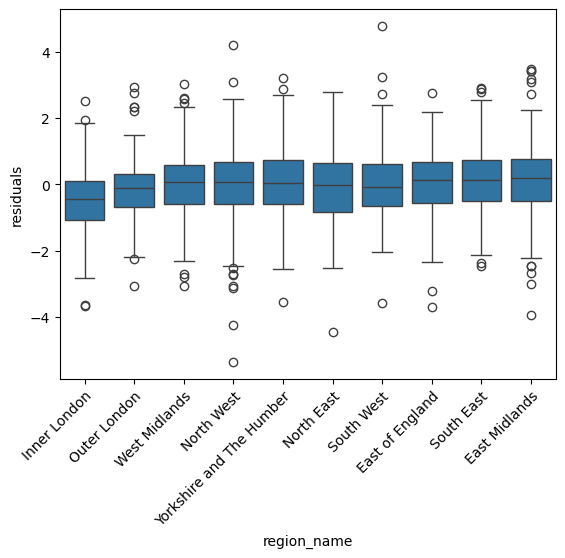

In [742]:
sns.boxplot(data=data, x='region_name', y='residuals')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor');

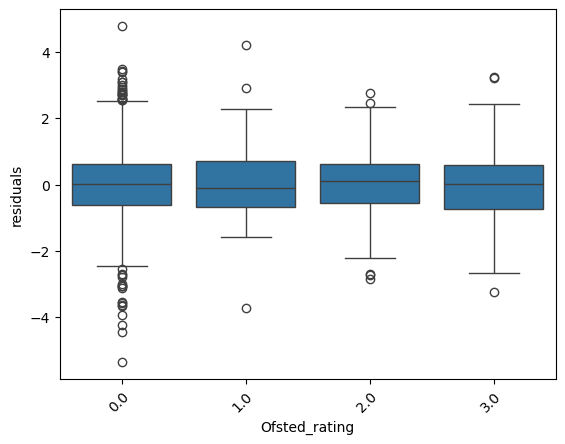

In [743]:
sns.boxplot(data=data, x='Ofsted_rating', y='residuals')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor');

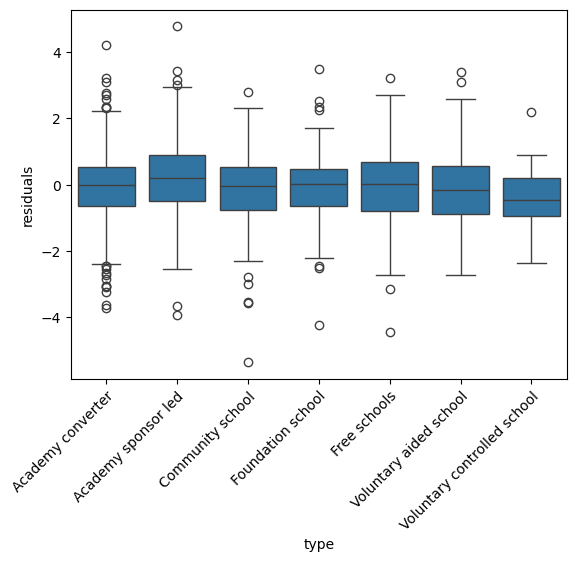

In [744]:
sns.boxplot(data=data, x='type', y='residuals')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor');

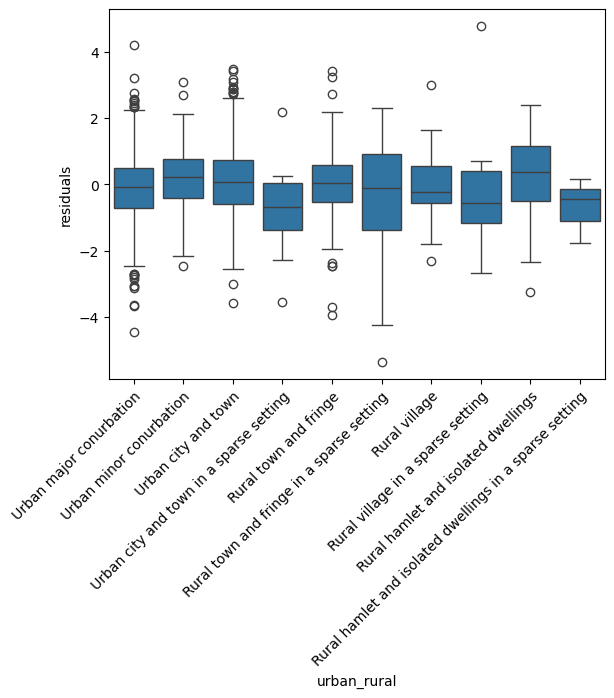

In [745]:
sns.boxplot(data=data, x='urban_rural', y='residuals')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor');

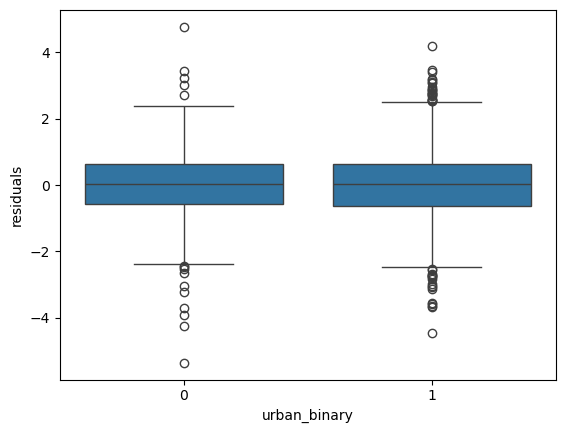

In [746]:
sns.boxplot(data=data, x='urban_binary', y='residuals');

# Mapping residuals

### By school

In [814]:
import geopandas as gpd
import contextily as ctx

In [815]:
coords = pd.read_csv('data_with_coordinates.csv', index_col=0)

In [816]:
coords = coords[['URN', 'Easting', 'Northing']].copy()

In [817]:
coords

URN           Easting          Northing
0     137181 526867.0000000000 184105.0000000000
1     100049 528159.0000000000 184498.0000000000
2     100050 528369.0000000000 186019.0000000000
3     100051 529555.0000000000 183356.0000000000
4     100052 524402.0000000000 185633.0000000000
...      ...               ...               ...
3141  137251 368104.0000000000 521037.0000000000
3142  137338 338127.0000000000 478474.0000000000
3143  136357 360707.0000000000 478609.0000000000
3144  141106 321416.0000000000 471354.0000000000
3145  135940 320952.0000000000 469650.0000000000

[3146 rows x 3 columns]

In [818]:
data_with_coords = data.merge(coords, how='left', on='URN')

In [819]:
data_with_coords['residuals'].describe()

count   2972.0000000000
mean       0.0000000000
std        0.9971349061
min       -5.3579893130
25%       -0.6289344375
50%        0.0312670348
75%        0.6305679857
max        4.7737637153
Name: residuals, dtype: float64

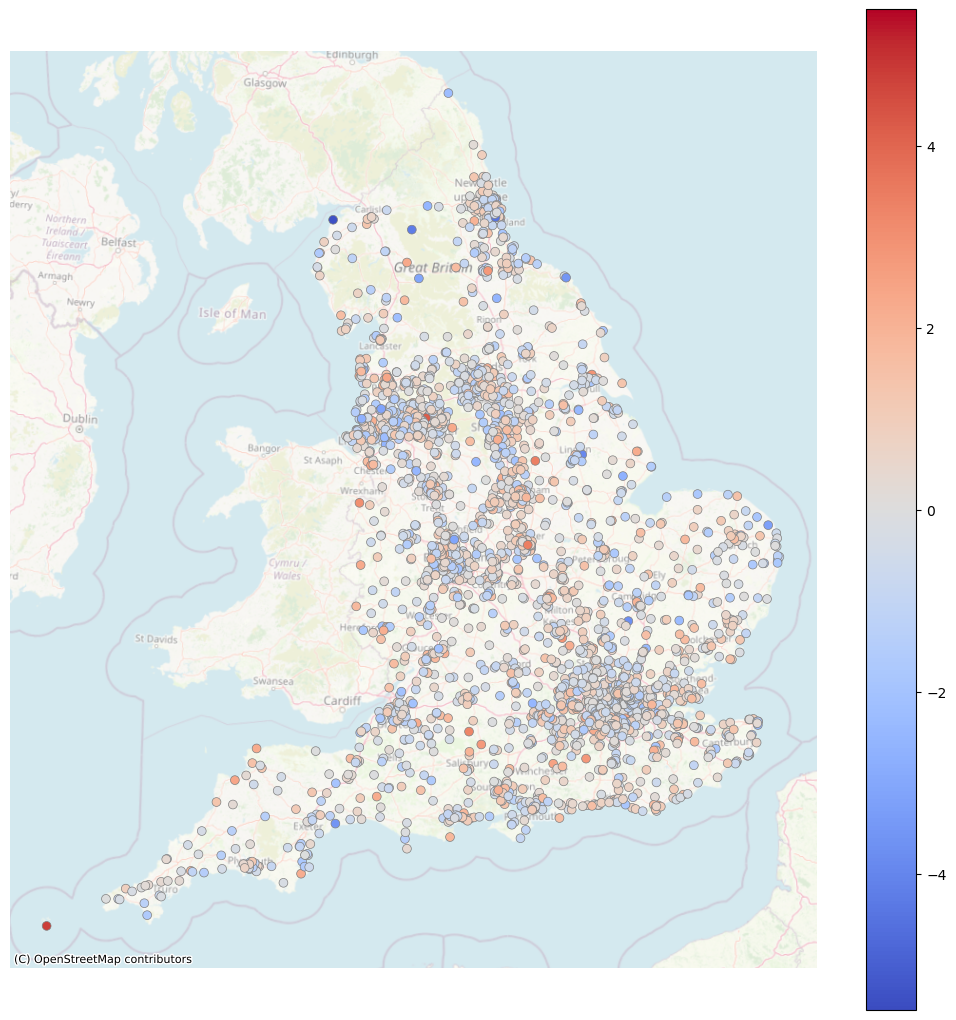

In [820]:
gdf = gpd.GeoDataFrame(
    data_with_coords,
    geometry = gpd.points_from_xy(data_with_coords['Easting'], data_with_coords['Northing']),
    crs = 'EPSG:27700'
)

fig, ax = plt.subplots(figsize=(13, 13))
gdf.plot(ax=ax, 
         column='residuals', 
         markersize=40, 
         cmap="coolwarm",
         edgecolor='grey',
         linewidth = 0.5,
         vmin=-5.5,
         vmax=5.5,
        legend=True)

ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik, alpha=0.5)

ax.set_axis_off()
plt.show();

### Groupby LA

In [760]:
la_code = pd.read_csv('model_data/la_code.csv', index_col=0)

In [761]:
la_code = la_code[['URN', 'la_name', 'district_administrative_name', 'district_administrative_code']]

In [762]:
la_code

URN                 la_name district_administrative_name  \
1      100000          City of London               City of London   
2      100001          City of London               City of London   
3      100002          City of London               City of London   
4      100003          City of London               City of London   
5      100005                  Camden                       Camden   
...       ...                     ...                          ...   
24438  149557               Wiltshire                    Wiltshire   
24439  149632  Kensington and Chelsea       Kensington and Chelsea   
24440  149633                Cornwall                     Cornwall   
24441  149635           Wolverhampton                Wolverhampton   
24442  149636                 Norfolk                    Breckland   

      district_administrative_code  
1                        E09000001  
2                        E09000001  
3                        E09000001  
4                        E09000001  
5                        E09000007  
...                            ...  
24438                    E06000054  
24439                    E09000020  
24440                    E06000052  
24441                    E08000031  
24442                    E07000143  

[24442 rows x 4 columns]

In [763]:
data_residuals = data[['URN', 'residuals']]

In [764]:
data_residuals

URN     residuals
1     137181 -0.2009127718
3     100050 -0.5737620810
4     100051 -0.9895432731
5     100052 -1.7380125815
6     100053 -0.5173268580
...      ...           ...
3141  137107 -3.0539348298
3142  137251  2.3080817148
3143  137338  0.5427043647
3144  136357 -2.1621048836
3146  135940  0.7441465806

[2972 rows x 2 columns]

In [765]:
data_la = data_residuals.merge(la_code, how='left', on='URN')

In [766]:
data_la.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2972 entries, 0 to 2971
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   URN                           2972 non-null   int64  
 1   residuals                     2972 non-null   float64
 2   la_name                       2972 non-null   object 
 3   district_administrative_name  2972 non-null   object 
 4   district_administrative_code  2972 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 116.2+ KB


In [767]:
la_residuals = data_la.groupby('district_administrative_code')['residuals'].mean()

In [768]:
la_residuals = pd.DataFrame(la_residuals)
la_residuals = la_residuals.reset_index()

In [769]:
la_residuals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   district_administrative_code  308 non-null    object 
 1   residuals                     308 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.9+ KB


la map source: 

In [770]:
map = gpd.read_file('infuse_dist_lyr_2011.shp')

<Axes: >

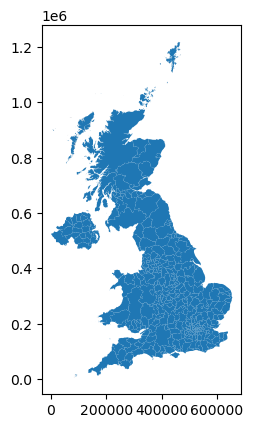

In [771]:
map.plot()

In [772]:

map[map['name'].str.contains('Cornwall')]

geo_code                 geo_label geo_labelw               label  \
51  E41000052  Cornwall,Isles of Scilly       None  E92000001E41000052   

                        name  \
51  Cornwall,Isles of Scilly   

                                             geometry  
51  MULTIPOLYGON (((185900.5 33613.7, 185894.609 3...

In [773]:
england = map[map['geo_code'].str.startswith('E')]

In [774]:
england

geo_code         geo_label geo_labelw               label  \
3    E07000138           Lincoln       None  E92000001E07000138   
4    E07000166     Richmondshire       None  E92000001E07000166   
5    E07000105           Ashford       None  E92000001E07000105   
8    E08000034          Kirklees       None  E92000001E08000034   
9    E07000126      South Ribble       None  E92000001E07000126   
..         ...               ...        ...                 ...   
398  E08000025        Birmingham       None  E92000001E08000025   
399  E07000049       East Dorset       None  E92000001E07000049   
400  E07000046          Torridge       None  E92000001E07000046   
401  E06000004  Stockton-on-Tees       None  E92000001E06000004   
403  E07000169             Selby       None  E92000001E07000169   

                 name                                           geometry  
3             Lincoln  POLYGON ((495362.339 373435.025, 495367.034 37...  
4       Richmondshire  POLYGON ((392540.053 507436.934, 392689 507651...  
5             Ashford  POLYGON ((585288.501 141699.702, 585334 141716...  
8            Kirklees  POLYGON ((423048.911 427817.21, 423068.08 4278...  
9        South Ribble  POLYGON ((343774.125 427166.469, 343873.812 42...  
..                ...                                                ...  
398        Birmingham  POLYGON ((408329.886 296917.67, 408330.059 296...  
399       East Dorset  POLYGON ((397287.219 107318.047, 397285.693 10...  
400          Torridge  MULTIPOLYGON (((240262.906 127104.094, 240265....  
401  Stockton-on-Tees  POLYGON ((438392.691 522207.088, 438392.094 52...  
403             Selby  POLYGON ((447309.814 444345.784, 447302.406 44...  

[324 rows x 6 columns]

update geo codes in 'england' to match current codes

In [775]:
update_codes = pd.read_csv('geo_code_replacements.csv')

In [776]:
update_codes.head()

geo_code                       name district_administrative_code
0  E07000097         East Hertfordshire                    E07000242
1  E08000020                  Gateshead                    E08000037
2  E41000052  Cornwall, Isles of Scilly                    E06000052
3  E07000050               North Dorset                    E06000059
4  E07000101                  Stevenage                    E07000243

In [777]:
code_dict = dict(zip(update_codes['geo_code'], update_codes['district_administrative_code']))
code_dict

{'E07000097': 'E07000242',
 'E08000020': 'E08000037',
 'E41000052': 'E06000052',
 'E07000050': 'E06000059',
 'E07000101': 'E07000243',
 'E07000048': 'E06000058',
 'E07000190': 'E07000246',
 'E07000052': 'E06000059',
 'E07000201': 'E07000245',
 'E07000153': 'E06000061',
 'E06000048': 'E06000057',
 'E41000324': 'E09000033',
 'E07000205': 'E07000244',
 'E07000104': 'E07000241',
 'E07000156': 'E06000061',
 'E07000191': 'E07000246',
 'E07000151': 'E06000062',
 'E06000029': 'E06000058',
 'E07000004': 'E06000060',
 'E07000150': 'E06000061',
 'E07000053': 'E06000059',
 'E07000152': 'E06000061',
 'E07000204': 'E07000245',
 'E07000051': 'E06000059',
 'E07000005': 'E06000060',
 'E07000155': 'E06000062',
 'E07000006': 'E06000060',
 'E07000007': 'E06000060',
 'E07000206': 'E07000244',
 'E07000100': 'E07000240',
 'E06000028': 'E06000058',
 'E07000154': 'E06000062',
 'E07000049': 'E06000059'}

In [778]:
england_updated = england.copy()

In [779]:
england_updated['geo_code'] = england_updated['geo_code'].map(code_dict).fillna(england_updated['geo_code'])

In [780]:
england_updated

geo_code         geo_label geo_labelw               label  \
3    E07000138           Lincoln       None  E92000001E07000138   
4    E07000166     Richmondshire       None  E92000001E07000166   
5    E07000105           Ashford       None  E92000001E07000105   
8    E08000034          Kirklees       None  E92000001E08000034   
9    E07000126      South Ribble       None  E92000001E07000126   
..         ...               ...        ...                 ...   
398  E08000025        Birmingham       None  E92000001E08000025   
399  E06000059       East Dorset       None  E92000001E07000049   
400  E07000046          Torridge       None  E92000001E07000046   
401  E06000004  Stockton-on-Tees       None  E92000001E06000004   
403  E07000169             Selby       None  E92000001E07000169   

                 name                                           geometry  
3             Lincoln  POLYGON ((495362.339 373435.025, 495367.034 37...  
4       Richmondshire  POLYGON ((392540.053 507436.934, 392689 507651...  
5             Ashford  POLYGON ((585288.501 141699.702, 585334 141716...  
8            Kirklees  POLYGON ((423048.911 427817.21, 423068.08 4278...  
9        South Ribble  POLYGON ((343774.125 427166.469, 343873.812 42...  
..                ...                                                ...  
398        Birmingham  POLYGON ((408329.886 296917.67, 408330.059 296...  
399       East Dorset  POLYGON ((397287.219 107318.047, 397285.693 10...  
400          Torridge  MULTIPOLYGON (((240262.906 127104.094, 240265....  
401  Stockton-on-Tees  POLYGON ((438392.691 522207.088, 438392.094 52...  
403             Selby  POLYGON ((447309.814 444345.784, 447302.406 44...  

[324 rows x 6 columns]

In [781]:
england_la_residuals = pd.merge(england_updated, la_residuals, left_on='geo_code', right_on='district_administrative_code', how='left')

In [782]:
england_la_residuals.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   geo_code                      324 non-null    object  
 1   geo_label                     324 non-null    object  
 2   geo_labelw                    0 non-null      object  
 3   label                         324 non-null    object  
 4   name                          324 non-null    object  
 5   geometry                      324 non-null    geometry
 6   district_administrative_code  324 non-null    object  
 7   residuals                     324 non-null    float64 
dtypes: float64(1), geometry(1), object(6)
memory usage: 20.4+ KB


In [783]:
unmatched_rows = england_la_residuals[england_la_residuals['residuals'].isnull()]
print(unmatched_rows[['geo_code', 'geo_label']])

Empty DataFrame
Columns: [geo_code, geo_label]
Index: []


In [784]:
data['residuals'].describe()

count   2972.0000000000
mean       0.0000000000
std        0.9971349061
min       -5.3579893130
25%       -0.6289344375
50%        0.0312670348
75%        0.6305679857
max        4.7737637153
Name: residuals, dtype: float64

In [785]:
england_la_residuals['residuals'].describe()

count   324.0000000000
mean      0.0046178179
std       0.4553193512
min      -1.4066848958
25%      -0.2666806139
50%       0.0178526300
75%       0.3250139628
max       1.2403926511
Name: residuals, dtype: float64

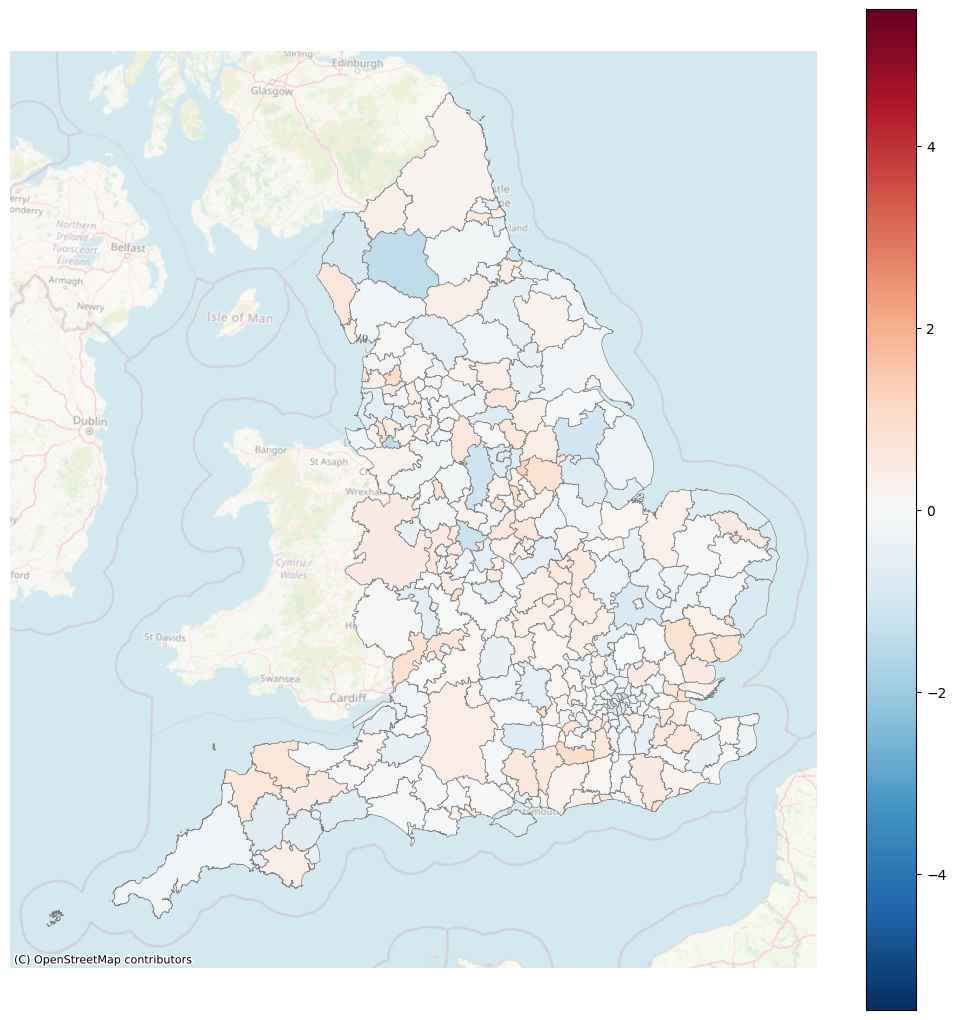

In [822]:
f,ax = plt.subplots(1, figsize=(13,13))
england_la_residuals.plot(column='residuals', 
                           cmap='RdBu_r',
                           vmin=-5.5,
                           vmax=5.5,
                           edgecolor='grey',
                           linewidth = 0.5,
                           legend=True, 
                           ax=ax)

ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik, alpha=0.5)


# remove axis
ax.set_axis_off()
plt.show();

### Groupby region

In [787]:
data_temp_london = data.copy()

In [788]:
data_temp_london['region_name'].replace('Inner London', 'London', inplace=True)
data_temp_london['region_name'].replace('Outer London', 'London', inplace=True)

In [789]:
region_residuals = data_temp_london.groupby('region_name')['residuals'].mean()

In [790]:
region_residuals = pd.DataFrame(region_residuals)
region_residuals

residuals
region_name                           
East Midlands             0.1364081945
East of England           0.0521769712
London                   -0.2747679631
North East               -0.0879426720
North West                0.0119385597
South East                0.1129100992
South West                0.0088653748
West Midlands             0.0269546393
Yorkshire and The Humber  0.0510956060

region map source: https://statistics.ukdataservice.ac.uk/dataset/2011-census-geography-boundaries-regions/resource/cf403e93-6bc8-4f63-b4f3-b9e7c47e769a 

In [791]:
map = gpd.read_file('infuse_rgn_2011.shp')

In [792]:
map

geo_code                 geo_label      label                      name  \
0  E12000006           East of England  E12000006           East of England   
1  E12000003  Yorkshire and The Humber  E12000003  Yorkshire and The Humber   
2  E12000008                South East  E12000008                South East   
3  E12000004             East Midlands  E12000004             East Midlands   
4  E12000007                    London  E12000007                    London   
5  E12000009                South West  E12000009                South West   
6  E12000005             West Midlands  E12000005             West Midlands   
7  E12000002                North West  E12000002                North West   
8  E12000001                North East  E12000001                North East   

                                            geometry  
0  POLYGON ((617106.688 343482.308, 617111.01 343...  
1  POLYGON ((510758.595 482644.305, 510766.754 48...  
2  MULTIPOLYGON (((508236.589 171797.716, 508240....  
3  POLYGON ((454996.828 276726.552, 454974.133 27...  
4  POLYGON ((534527.083 200056.467, 534528.375 20...  
5  MULTIPOLYGON (((409873.806 239325.091, 409867....  
6  POLYGON ((431443.073 299111.23, 431449.304 299...  
7  POLYGON ((380424.183 522381.432, 380424.209 52...  
8  MULTIPOLYGON (((450648.313 535677.376, 450686....

In [793]:
england_map_residuals = pd.merge(map, region_residuals, left_on='name', right_on='region_name', how='left')

In [794]:
england_map_residuals

geo_code                 geo_label      label                      name  \
0  E12000006           East of England  E12000006           East of England   
1  E12000003  Yorkshire and The Humber  E12000003  Yorkshire and The Humber   
2  E12000008                South East  E12000008                South East   
3  E12000004             East Midlands  E12000004             East Midlands   
4  E12000007                    London  E12000007                    London   
5  E12000009                South West  E12000009                South West   
6  E12000005             West Midlands  E12000005             West Midlands   
7  E12000002                North West  E12000002                North West   
8  E12000001                North East  E12000001                North East   

                                            geometry     residuals  
0  POLYGON ((617106.688 343482.308, 617111.01 343...  0.0521769712  
1  POLYGON ((510758.595 482644.305, 510766.754 48...  0.0510956060  
2  MULTIPOLYGON (((508236.589 171797.716, 508240....  0.1129100992  
3  POLYGON ((454996.828 276726.552, 454974.133 27...  0.1364081945  
4  POLYGON ((534527.083 200056.467, 534528.375 20... -0.2747679631  
5  MULTIPOLYGON (((409873.806 239325.091, 409867....  0.0088653748  
6  POLYGON ((431443.073 299111.23, 431449.304 299...  0.0269546393  
7  POLYGON ((380424.183 522381.432, 380424.209 52...  0.0119385597  
8  MULTIPOLYGON (((450648.313 535677.376, 450686.... -0.0879426720

In [795]:
england_map_residuals['residuals'].describe()

count    9.0000000000
mean     0.0041820900
std      0.1228366284
min     -0.2747679631
25%      0.0088653748
50%      0.0269546393
75%      0.0521769712
max      0.1364081945
Name: residuals, dtype: float64

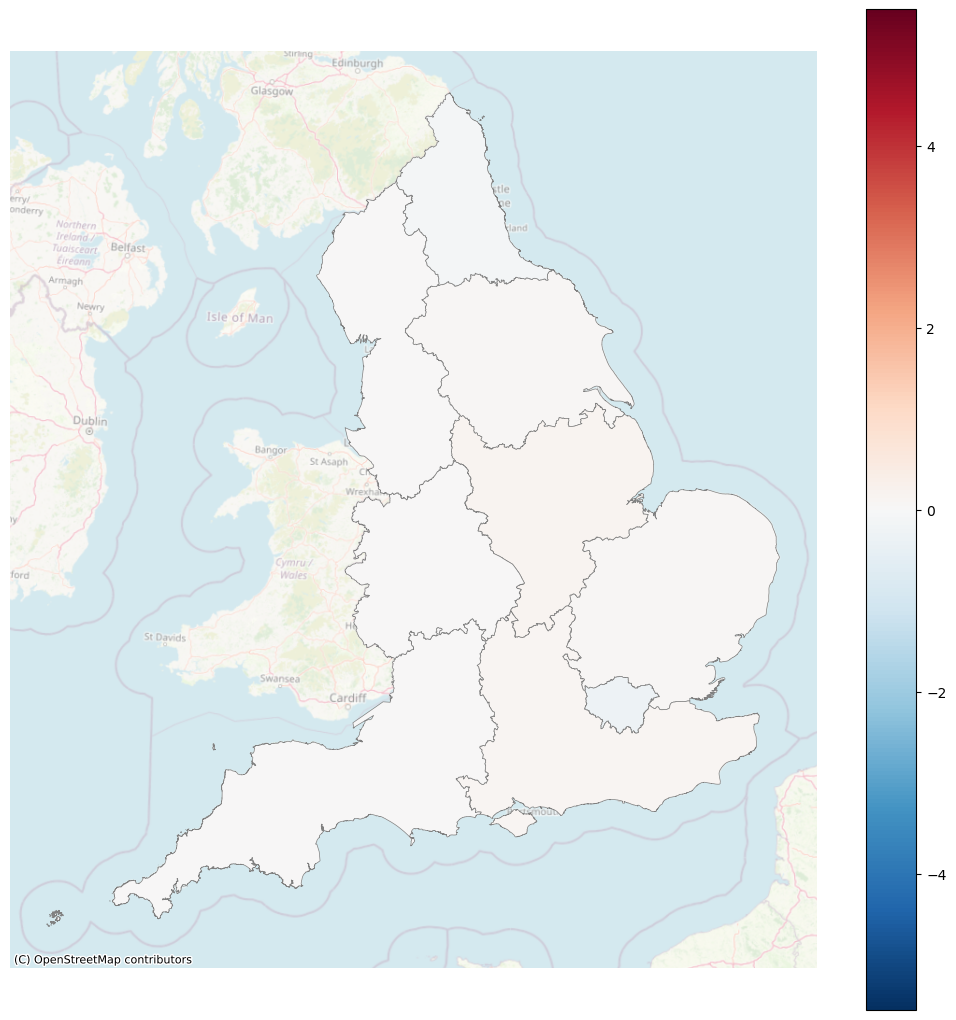

In [821]:
f,ax = plt.subplots(1, figsize=(13,13))
england_map_residuals.plot(column='residuals', 
                           cmap='RdBu_r',
                           edgecolor='grey',
                           linewidth = 0.5,
                           vmin=-5.5,
                           vmax=5.5,
                           legend=True, 
                           ax=ax)

ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik, alpha=0.5)

ax.set_axis_off()
plt.show();